In [1]:
from IPython.display import HTML
from IPython.display import Image
import pandas as pd
import seaborn as sns

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 50
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
d1 = pd.read_csv(r'E:\skill based learning\DATA SCIENCE\Learn_Projects\Rosemann Store Retail Sales Pred\Rossmann Stores Data.csv', low_memory = False)
d2 = pd.read_csv(r'E:\skill based learning\DATA SCIENCE\Learn_Projects\Rosemann Store Retail Sales Pred\store.csv', low_memory = False)

In [3]:
d1.shape, d2.shape

((1017209, 12), (1115, 10))

In [4]:
d1.sample()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
865851    169          1  06-04-2015    0.0          0     0      0   

       StateHoliday  SchoolHoliday  Date.1  Month  Year  
865851            b              1       6      4  2015

In [5]:
d2.sample()

Store StoreType Assortment  CompetitionDistance  \
566    567         c          a               1010.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
566                        9.0                    2012.0       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
566             18.0           2011.0  Feb,May,Aug,Nov

### The table d2 contains information of 1115 rossman stores and their info. The table d1 contains information on sales of each day.

In [6]:
df_backup = pd.merge(d1, d2, on = 'Store', how = 'inner')
print(df_backup.shape)
df_backup.sample()

(1017209, 21)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
281677    907          7  02-02-2014    0.0          0     0      0   

       StateHoliday  SchoolHoliday  Date.1  ...  Year  StoreType Assortment  \
281677            0              0       2  ...  2014          a          c   

       CompetitionDistance  CompetitionOpenSinceMonth  \
281677               250.0                        NaN   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
281677                       NaN       0              NaN              NaN   

        PromoInterval  
281677            NaN  

[1 rows x 21 columns]

### The merged table have same length as d1. Thus no unmatched rows and no loss on information. That is a good news.

In [7]:
# # make a dataframe to for processing keep current as backup
df = df_backup.copy(deep = True)

### Shape of the dataframe

In [8]:
print('Number of rows :', df.shape[0])
print('Number of columns :', df.shape[1])

Number of rows : 1017209
Number of columns : 21


### Rename the columns

In [9]:
df.columns = [x.lower() for x in df.columns]
df.rename(columns = {
    'stateholiday' : 'state_hd', 'schoolholiday' : 'school_hd', 'storetype':'store_type',
    'competitiondistance' : 'comp_dist', 'competitionopensincemonth' :'comp_sm', 'competitionopensinceyear' : 'comp_syr',
    'promo2sinceweek' : 'promo2_sw', 'promo2sinceyear' : 'promo2_syr', 'promointerval' : 'promo_int'
                    }, inplace = True)

In [10]:
# reuse of code, self made library
from df_info import info
info(df)

feature    promo_int promo2_syr promo2_sw   comp_syr    comp_sm comp_dist  \
%null       49.94362   49.94362  49.94362  31.787764  31.787764   0.25973   
total_null    508031     508031    508031     323348     323348      2642   
dtype         object    float64   float64    float64    float64   float64   

feature      year promo2 assortment store_type  ... dayofweek date.1  \
%null         0.0    0.0        0.0        0.0  ...       0.0    0.0   
total_null      0      0          0          0  ...         0      0   
dtype       int64  int64     object     object  ...     int64  int64   

feature    school_hd state_hd  promo   open customers    sales    date  month  
%null            0.0      0.0    0.0    0.0       0.0      0.0     0.0    0.0  
total_null         0        0      0      0         0        0       0      0  
dtype          int64   object  int64  int64     int64  float64  object  int64  

[3 rows x 21 columns]

In [11]:
df['date'] = pd.to_datetime(df["date"], format='%d-%m-%Y')

### 6 columns have null values; Fill NaNs

In [12]:
df.comp_dist.mean(), df.comp_dist.median() 

(5430.085652302903, 2330.0)

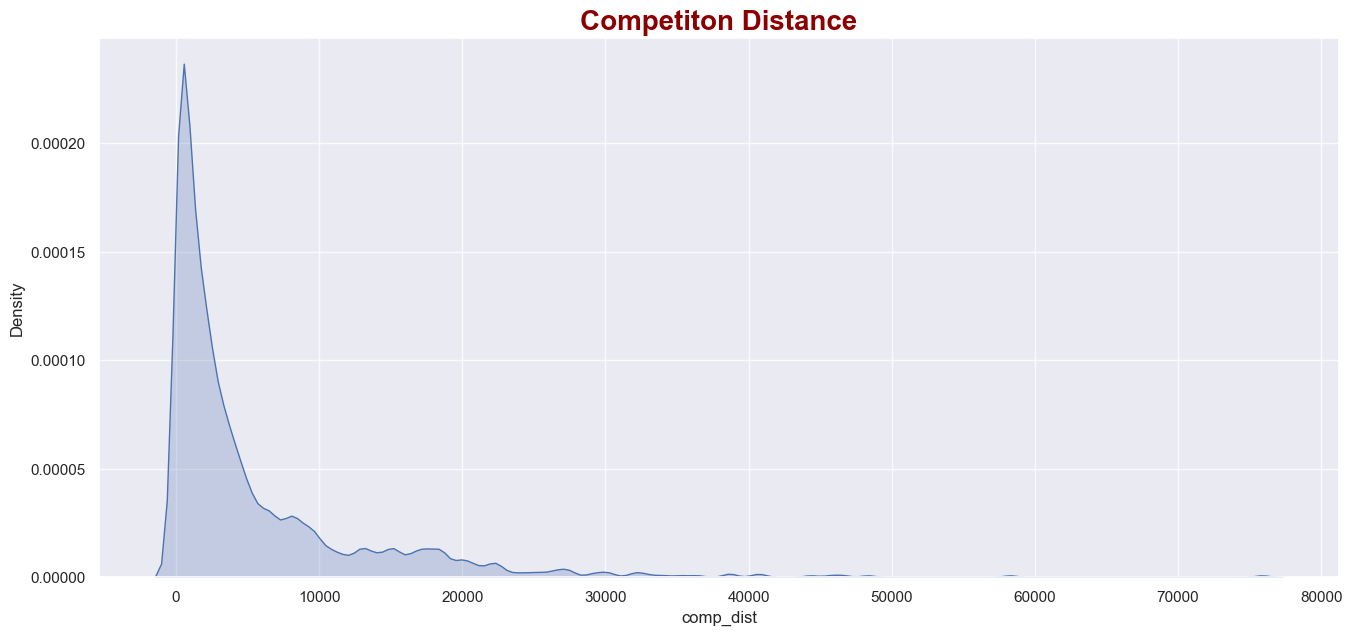

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (16, 7))
sns.kdeplot(df.comp_dist, fill = True)
plt.title('Competiton Distance', fontdict = ({'family' : 'sans', 'color' : 'darkred', 'size' : 20, 'weight' : 'bold'}))
plt.grid(alpha = 0.8)

### Competition distance is highly skewed to the right. Median value[2330] is significantly lesser than mean[5430]. I will fill mean values in null distance. They are not in significant numbers so filling mean won't affect the data anyways. 

In [13]:
df.comp_dist.fillna(5430, inplace = True)

In [17]:
# check wether the promo2 0 values match the promo2_sw and promo2_sy null indexes
(df[df.promo2==0].index != df[df.promo2_syr.isnull()].index).sum()

0

In [18]:
# check wether the promo2 0 values match the promo2_sw and promo2_sy null indexes
(df[df.promo2==0].index != df[df.promo2_sw.isnull()].index).sum()

0

### Thus from above information, if promo2 is 0 then the promotion 2 year and week values will definitely be 0.

In [14]:
df.promo2_syr.fillna(0, inplace = True)
df.promo2_sw.fillna(0, inplace = True)

### promo_int feature contains the month list in which promo re-starts. With the use of this feature I can create a new one that shows if the store is promoted or not for given instance.

In [20]:
df['promo_int'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Promotions are in span of 3 months

In [15]:
# before I create a feature I need to create a column that short form of current instance's month so I can use it in apply function.
months = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}

# fill nans as 0
df["promo_int"].fillna(0, inplace=True)

# apply the logic for current active promo
df['promo_active'] = df[['date', 'promo_int']].apply(lambda x : int(months[x['date'].month] in x['promo_int'].split(',')) if x['promo_int'] != 0 else 0, axis = 1)

### The 31.7% of the competition months and years are missing. Since this are important features I will consider 3 methods for imputation.
### <b>1.) frequency imputation</b>

In [22]:
df.comp_sm.value_counts()

9.0000     114254
4.0000      87076
11.0000     84455
3.0000      63548
7.0000      59434
12.0000     57896
10.0000     55622
6.0000      45444
5.0000      39608
2.0000      37886
8.0000      36186
1.0000      12452
Name: comp_sm, dtype: int64

In [23]:
df.comp_syr.value_counts()

2013.0000    75426
2012.0000    74299
2014.0000    63732
2005.0000    56564
2010.0000    51258
2011.0000    49396
2009.0000    49396
2008.0000    48476
2007.0000    43744
2006.0000    42802
2015.0000    35060
2002.0000    24882
2004.0000    19804
2003.0000    16794
2001.0000    14704
2000.0000     9236
1999.0000     7352
1990.0000     4710
1994.0000     1884
1995.0000     1700
1998.0000      942
1961.0000      942
1900.0000      758
Name: comp_syr, dtype: int64

### Most frequent month is 9th(Sept) and most frequent competition start year is 2013.

### <b>2.) neighbourhood imputation</b>

In [16]:
# Check wether the in same stores this features are only null or there are some values non null values.
# for year
no_comp_Stores = df[df.comp_syr.isnull()]['store'].unique()
comp_Stores = df[~df.comp_syr.isnull()]['store'].unique()

for x in comp_Stores:
    if x in no_comp_Stores:
        print(x)

In [17]:
# Check wether the in same stores this features are only null or there are some values non null values.
# for months
no_comp_Stores = df[df.comp_sm.isnull()]['store'].unique()
comp_Stores = df[~df.comp_sm.isnull()]['store'].unique()

for x in comp_Stores:
    if x in no_comp_Stores:
        print(x)

### Both of above cells didnt give any output. Thus meaning that all the stores who have atleast 1 null value in comp_syr or comp_sm; for those stores all other instances are null for these features. Thus I cant use neighbourhood imputation.

### <b>3.) regression imputation</b>
### I dont think regression imputation will work because to catch the pattern we still need some non null values in those unique stores which have null values.

### <b>Using probability imputation might be best case here. It will not create a bias in dataset and fill values based on their probabilities.</b>
### <b>But also the individiual stores have same competition since year and competiton since month over the dataset. Thus I have to impute the values considering the individual stores.</b>

In [18]:
# find out probabilities for months
prob_months = df.comp_sm.value_counts()/693861
prob_months = prob_months.reset_index(name = 'prob')
prob_months.rename(columns = {'index' : 'month'}, inplace = True)
display(prob_months.T)

# find out probabilities for years
prob_yr = df.comp_syr.value_counts()/693861
prob_yr = prob_yr.reset_index(name = 'prob')
prob_yr.rename(columns = {'index' : 'year'}, inplace = True)
display(prob_yr.T)

0         1          2         3         4         5          6   \
month  9.000000  4.000000  11.000000  3.000000  7.000000  12.00000  10.000000   
prob   0.164664  0.125495   0.121717  0.091586  0.085657   0.08344   0.080163   

             7         8         9         10        11  
month  6.000000  5.000000  2.000000  8.000000  1.000000  
prob   0.065494  0.057083  0.054602  0.052152  0.017946

0            1            2            3            4   \
year  2013.000000  2012.000000  2014.000000  2005.000000  2010.000000   
prob     0.108705     0.107081     0.091851     0.081521     0.073874   

              5           6            7            8            9   ...  \
year  2011.00000  2009.00000  2008.000000  2007.000000  2006.000000  ...   
prob     0.07119     0.07119     0.069864     0.063044     0.061687  ...   

               13           14           15           16           17  \
year  2003.000000  2001.000000  2000.000000  1999.000000  1990.000000   
prob     0.024204     0.021192     0.013311     0.010596     0.006788   

               18          19           20           21           22  
year  1994.000000  1995.00000  1998.000000  1961.000000  1900.000000  
prob     0.002715     0.00245     0.001358     0.001358     0.001092  

[2 rows x 23 columns]

In [19]:
import random
# iterates through all the stores that are in no_comp_Stores

for x in no_comp_Stores:
    # extract this individual store's null instance indexes and fill value for
    df.loc[df[df.store == x].index, 'comp_sm'] = random.choices(prob_months['month'], weights = prob_months['month'])[0]
    df.loc[df[df.store == x].index, 'comp_syr'] = random.choices(prob_yr['year'], weights = prob_yr['year'])[0]

### seperate numerical and categorical features

In [20]:
# convert date part to int so that I can put those values in datetime module if required
df['comp_sm'] = df.comp_sm.astype(int)
df['comp_syr'] = df.comp_syr.astype(int)
df['promo2_sw'] = df.promo2_sw.astype(int)
df['promo2_syr'] = df.promo2_syr.astype(int)

In [21]:
# save current df
df_backup2 = df.copy(deep = True)

In [22]:
df_num = df.select_dtypes(include = ['int64', 'float64', 'int32', 'float32'])
df_cat = df.select_dtypes(include = ['object'])

In [23]:
df['state_hd'] = df_cat.state_hd.apply(lambda x : 'Normal' if x == '0' else 'public' if x == 'a' else 'easter' if x == 'b' else 'christmas')
df['assortment'] = df_cat.assortment.apply(lambda x : 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

In [32]:
df_num.describe().T

count      mean       std       min       25%       50%       75%        max
store        1017209.0000  558.4297  321.9087    1.0000  280.0000  558.0000  838.0000  1115.0000
dayofweek    1017209.0000    3.9983    1.9974    1.0000    2.0000    4.0000    6.0000     7.0000
sales        1017209.0000 5773.8190 3849.9262    0.0000 3727.0000 5744.0000 7856.0000 41551.0000
customers    1017209.0000  633.1459  464.4117    0.0000  405.0000  609.0000  837.0000  7388.0000
open         1017209.0000    0.8301    0.3755    0.0000    1.0000    1.0000    1.0000     1.0000
promo        1017209.0000    0.3815    0.4858    0.0000    0.0000    0.0000    1.0000     1.0000
school_hd    1017209.0000    0.1786    0.3831    0.0000    0.0000    0.0000    0.0000     1.0000
date.1       1017209.0000   15.7028    8.7876    1.0000    8.0000   16.0000   23.0000    31.0000
month        1017209.0000    5.8468    3.3261    1.0000    3.0000    6.0000    8.0000    12.0000
year         1017209.0000 2013.8323    0.7774 2013.0000 2013.0000 2014.0000 2014.0000  2015.0000
comp_dist    1017209.0000 5430.0854 7705.2977   20.0000  710.0000 2330.0000 6880.0000 75860.0000
comp_sm      1017209.0000    7.5770    3.1141    1.0000    5.0000    8.0000   10.0000    12.0000
comp_syr     1017209.0000 2005.1070   15.3857 1900.0000 2004.0000 2008.0000 2012.0000  2015.0000
promo2       1017209.0000    0.5006    0.5000    0.0000    0.0000    1.0000    1.0000     1.0000
promo2_sw    1017209.0000   11.6477   15.3239    0.0000    0.0000    1.0000   22.0000    50.0000
promo2_syr   1017209.0000 1007.0106 1005.8769    0.0000    0.0000 2009.0000 2012.0000  2015.0000
promo_active 1017209.0000    0.1718    0.3772    0.0000    0.0000    0.0000    0.0000     1.0000

### Feature Extraction

In [33]:
df.head()

store  dayofweek       date      sales  customers  open  promo state_hd  school_hd  date.1  month  year store_type assortment  comp_dist  comp_sm  comp_syr  promo2  promo2_sw  promo2_syr promo_int  promo_active
0    817          2 2013-01-22 27190.0000       7388     1      1   Normal          0      22      1  2013          a      basic   140.0000        3      2006       0          0           0         0             0
1    817          1 2013-06-17 34001.0000       4589     1      1   Normal          0      17      6  2013          a      basic   140.0000        3      2006       0          0           0         0             0
2    817          2 2013-06-18 30331.0000       4547     1      1   Normal          0      18      6  2013          a      basic   140.0000        3      2006       0          0           0         0             0
3    817          1 2013-06-03 31778.0000       4469     1      1   Normal          0       3      6  2013          a      basic   140.0000        3      2006       0          0           0         0             0
4    817          1 2013-07-01 32671.0000       4448     1      1   Normal          1       1      7  2013          a      basic   140.0000        3      2006       0          0           0         0             0

In [24]:
# make a date feature that shows the competition start date
df['comp_since'] = df.apply(lambda x : datetime.datetime(year = x['comp_syr'], month = x['comp_sm'], day = 1), axis = 1)

In [25]:
# now from that time findout total competition months for each date
df['comp_time_months'] = ((df['date'] - df['comp_since'])/30).apply(lambda x : x.days)

In [26]:
# above feature give negative values of months, thus creating a feature in which negative months are 0
df['comp_time_months_real'] = df['comp_time_months'].apply(lambda x : 0 if x < 0 else x)

In [27]:
# find the promotion2 date and its duration
df["promo2_since_yrwk"] = df["promo2_syr"].astype(str) + "-" + df["promo2_sw"].astype(str)

In [28]:
# convert into date time format
df["promo2_since"] = df["promo2_since_yrwk"].apply(lambda x: (datetime.datetime.strptime(x + "-1", "%Y-%W-%w") - datetime.timedelta(days=0)) if x != '0-0' else 0)

In [39]:
df[df.promo2_since != 0].head()

store  dayofweek       date      sales  customers  open  promo state_hd  school_hd  date.1  month  year store_type assortment  comp_dist  comp_sm  comp_syr  promo2  promo2_sw  promo2_syr        promo_int  promo_active comp_since  comp_time_months  comp_time_months_real promo2_since_yrwk         promo2_since
5652    769          4 2015-07-02 14635.0000       4582     1      1   Normal          1       2      7  2015          b      extra   840.0000       11      2002       1         48        2012  Jan,Apr,Jul,Oct             1 2002-11-01               154                    154           2012-48  2012-11-26 00:00:00
5653    769          5 2014-12-05 17200.0000       4536     1      1   Normal          0       5     12  2014          b      extra   840.0000       11      2002       1         48        2012  Jan,Apr,Jul,Oct             0 2002-11-01               147                    147           2012-48  2012-11-26 00:00:00
5654    769          4 2015-04-30 18177.0000       4510     1      1   Normal          0      30      4  2015          b      extra   840.0000       11      2002       1         48        2012  Jan,Apr,Jul,Oct             1 2002-11-01               152                    152           2012-48  2012-11-26 00:00:00
5655    769          3 2015-07-01 14985.0000       4424     1      1   Normal          1       1      7  2015          b      extra   840.0000       11      2002       1         48        2012  Jan,Apr,Jul,Oct             1 2002-11-01               154                    154           2012-48  2012-11-26 00:00:00
5656    769          5 2015-06-05 14128.0000       4382     1      1   Normal          0       5      6  2015          b      extra   840.0000       11      2002       1         48        2012  Jan,Apr,Jul,Oct             0 2002-11-01               153                    153           2012-48  2012-11-26 00:00:00

In [29]:
# now we can find promotion time in months.
df['promo2_time_months'] = df.apply(lambda x : (x['date'] - x['promo2_since'])/30 if x['promo2_since'] != 0 else 0, axis = 1)
df['promo2_time_months'] = df['promo2_time_months'].apply(lambda x: x.days if x != 0 else 0)

In [30]:
df['promo2_time_months_real'] = df['promo2_time_months'].apply(lambda x : 0 if x < 0 else x)

# <b>EDA</b>

#### <b>Hypothesis </b>
##### <li>1.) Promoted stores should perform better.</li>
##### <li>2.) Normal working days will have more average sales then weekends(sat, sun).</li>
##### <li>3.) Number of customers should have a positive correlation (close to 1) with Sales.</li>
##### <li>4.) Store-type strategy indicates there are stores built on customer type and their purchase power. Some stores will be high in number and high sales and some will be low in number but with high sales.</li>
##### <li>5.) Basic assortment should be highest in number and most sells. Extended assortments should be lesser in number but high average sells.</li>
##### <li>6.) On school/state holidays sells will be much higher.</li>
##### <li>7.) There should be rise in sells, 3 or 4 days before the state holidays [only easter and christams]</li>
##### <li>8.) Higher the Competiton distance higher the sales.</li>
##### <li>9.) Stores should have more average sells after 10th of each month.[Because of salary credition day]</li>
##### <li>10.) Sale trend should be periodic</li>

In [31]:
title = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 20}
label = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16}

In [32]:
df_backup3 = df.copy(deep = True)

In [33]:
df_num = df.select_dtypes(include = ['int64', 'float64', 'int32', 'float32'])
df_cat = df.select_dtypes(include = ['object'])

## <b>Uni Variate Analysis</b>

### <b>1). Numerical Features</b>

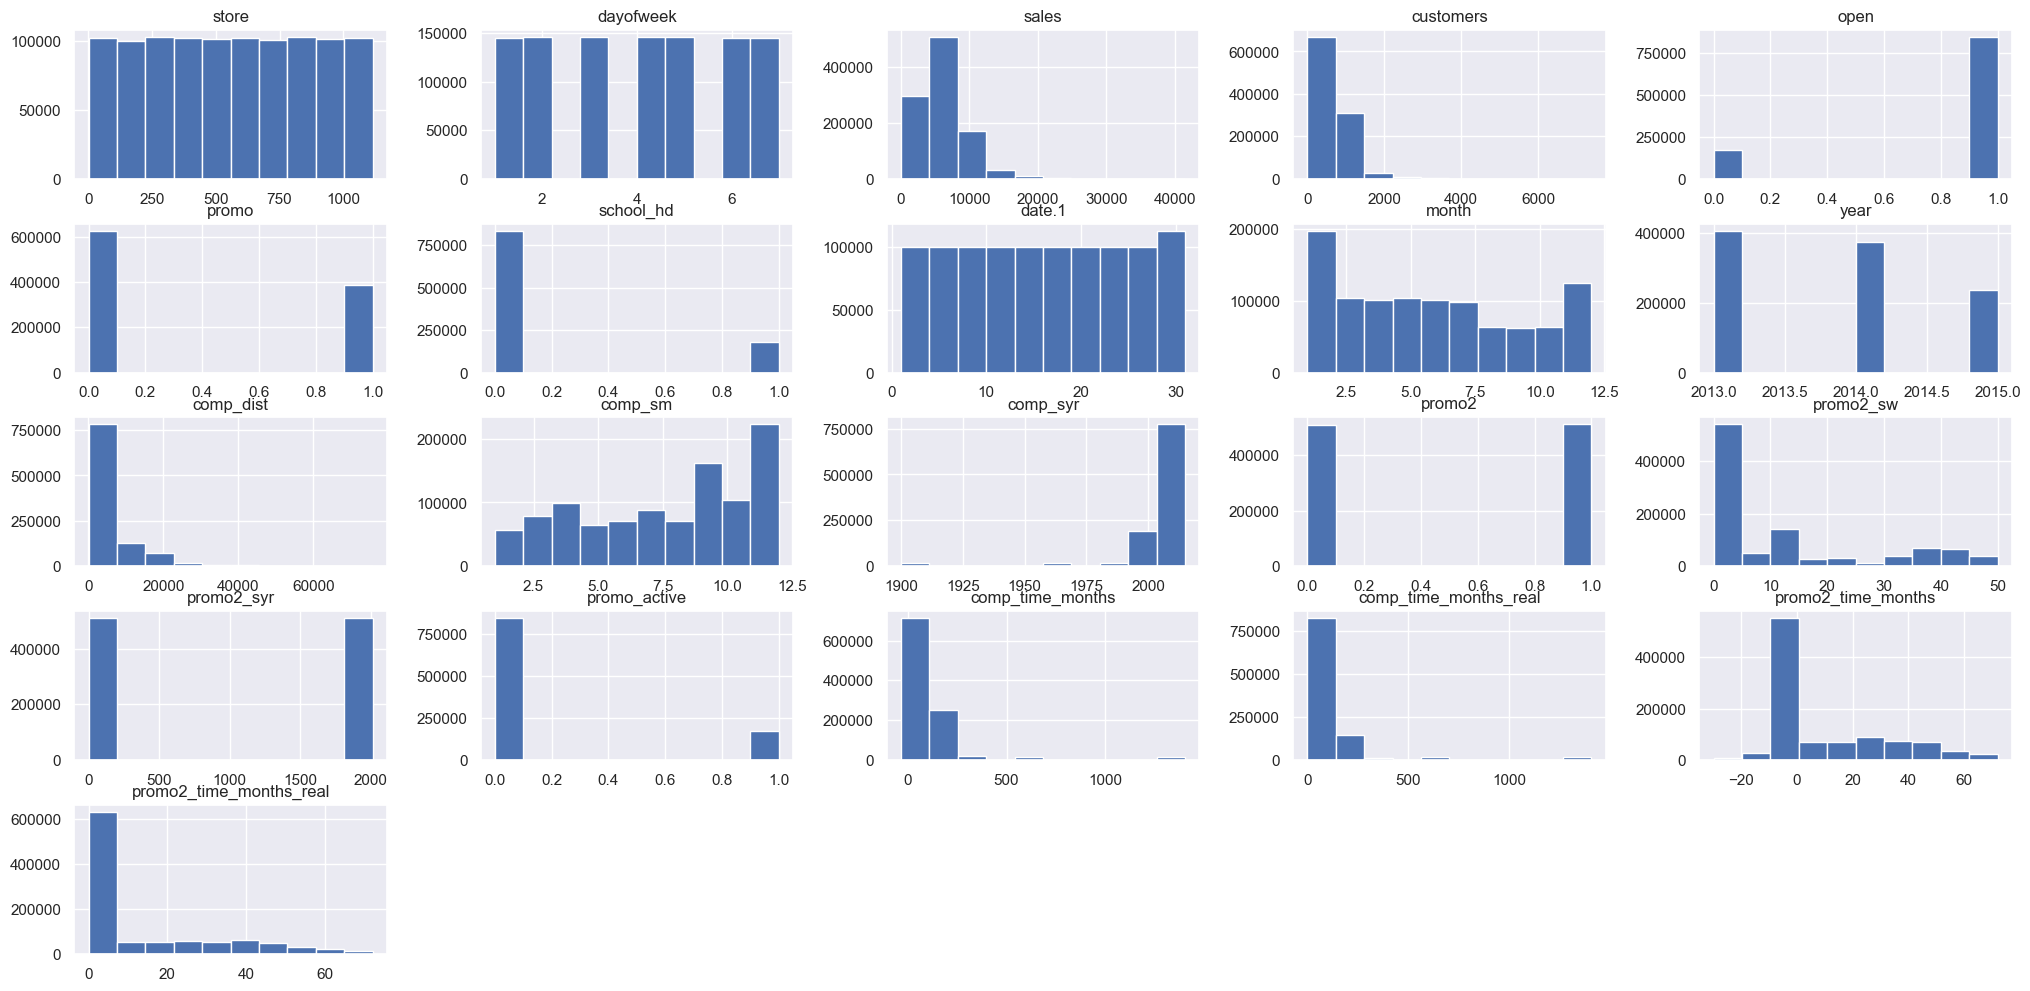

In [45]:
df_num.hist()
plt.show()

<b>
    <li>Each store have almost same number of instances, Thus the data is balanced.</li>
    <li>Sales, competiton distance and customers are right skewed feature</li>
    <li>For most of the instances the store is open</li>
    <li>50% of stores are promoted [promo1]</li>
    <li>Very less amount of stores have active promo 2.</li>
    <li>For most of the instances we have 0 months of competiton time.</li>
    <li>For most of the instances we have 0 months of promo2.</li>
</b>

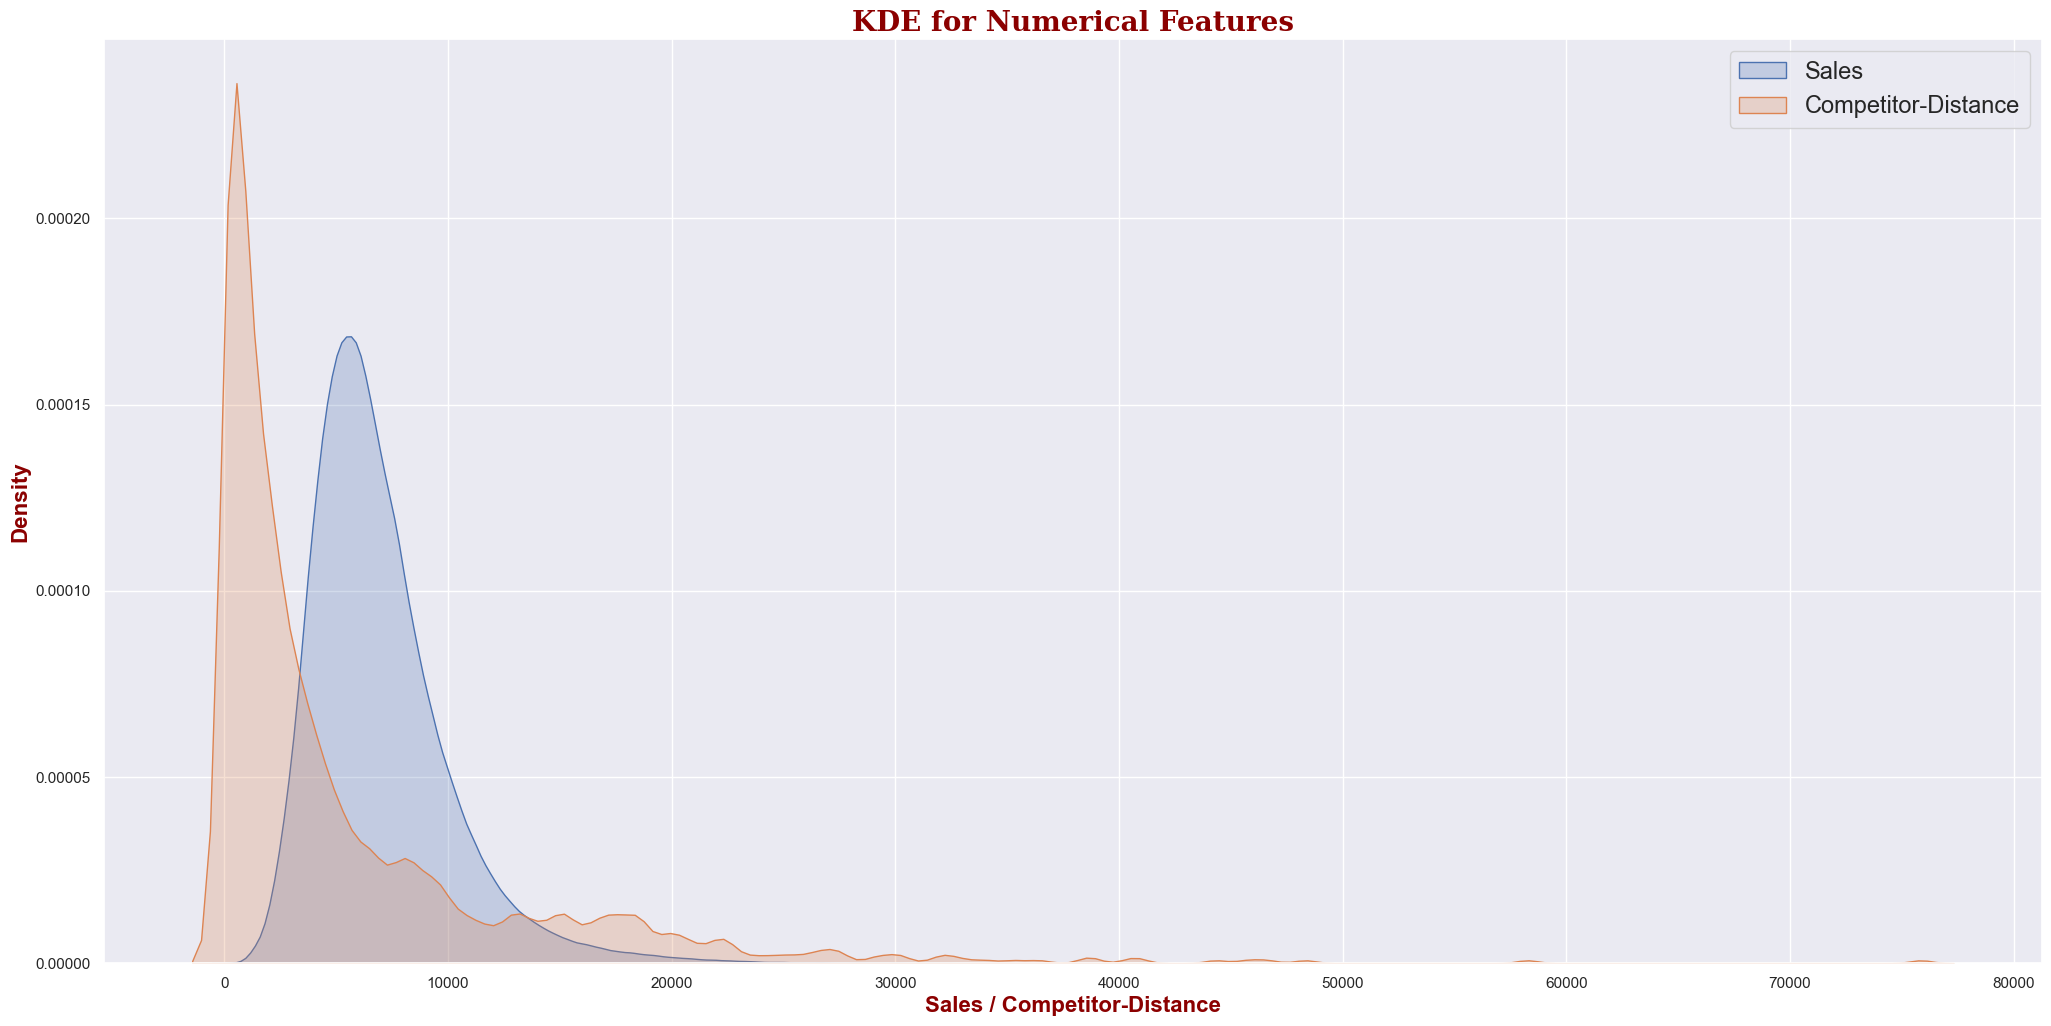

In [46]:
sns.kdeplot(df_num[df_num.sales > 0].sales, fill = True)
sns.kdeplot(df_num[df_num.comp_dist > 0].comp_dist, fill = True)
plt.legend(['Sales', 'Competitor-Distance'], fontsize = 17)
plt.title('KDE for Numerical Features', fontdict = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 20})
plt.ylabel('Density', fontdict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
plt.xlabel('Sales / Competitor-Distance', fontdict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
plt.show()

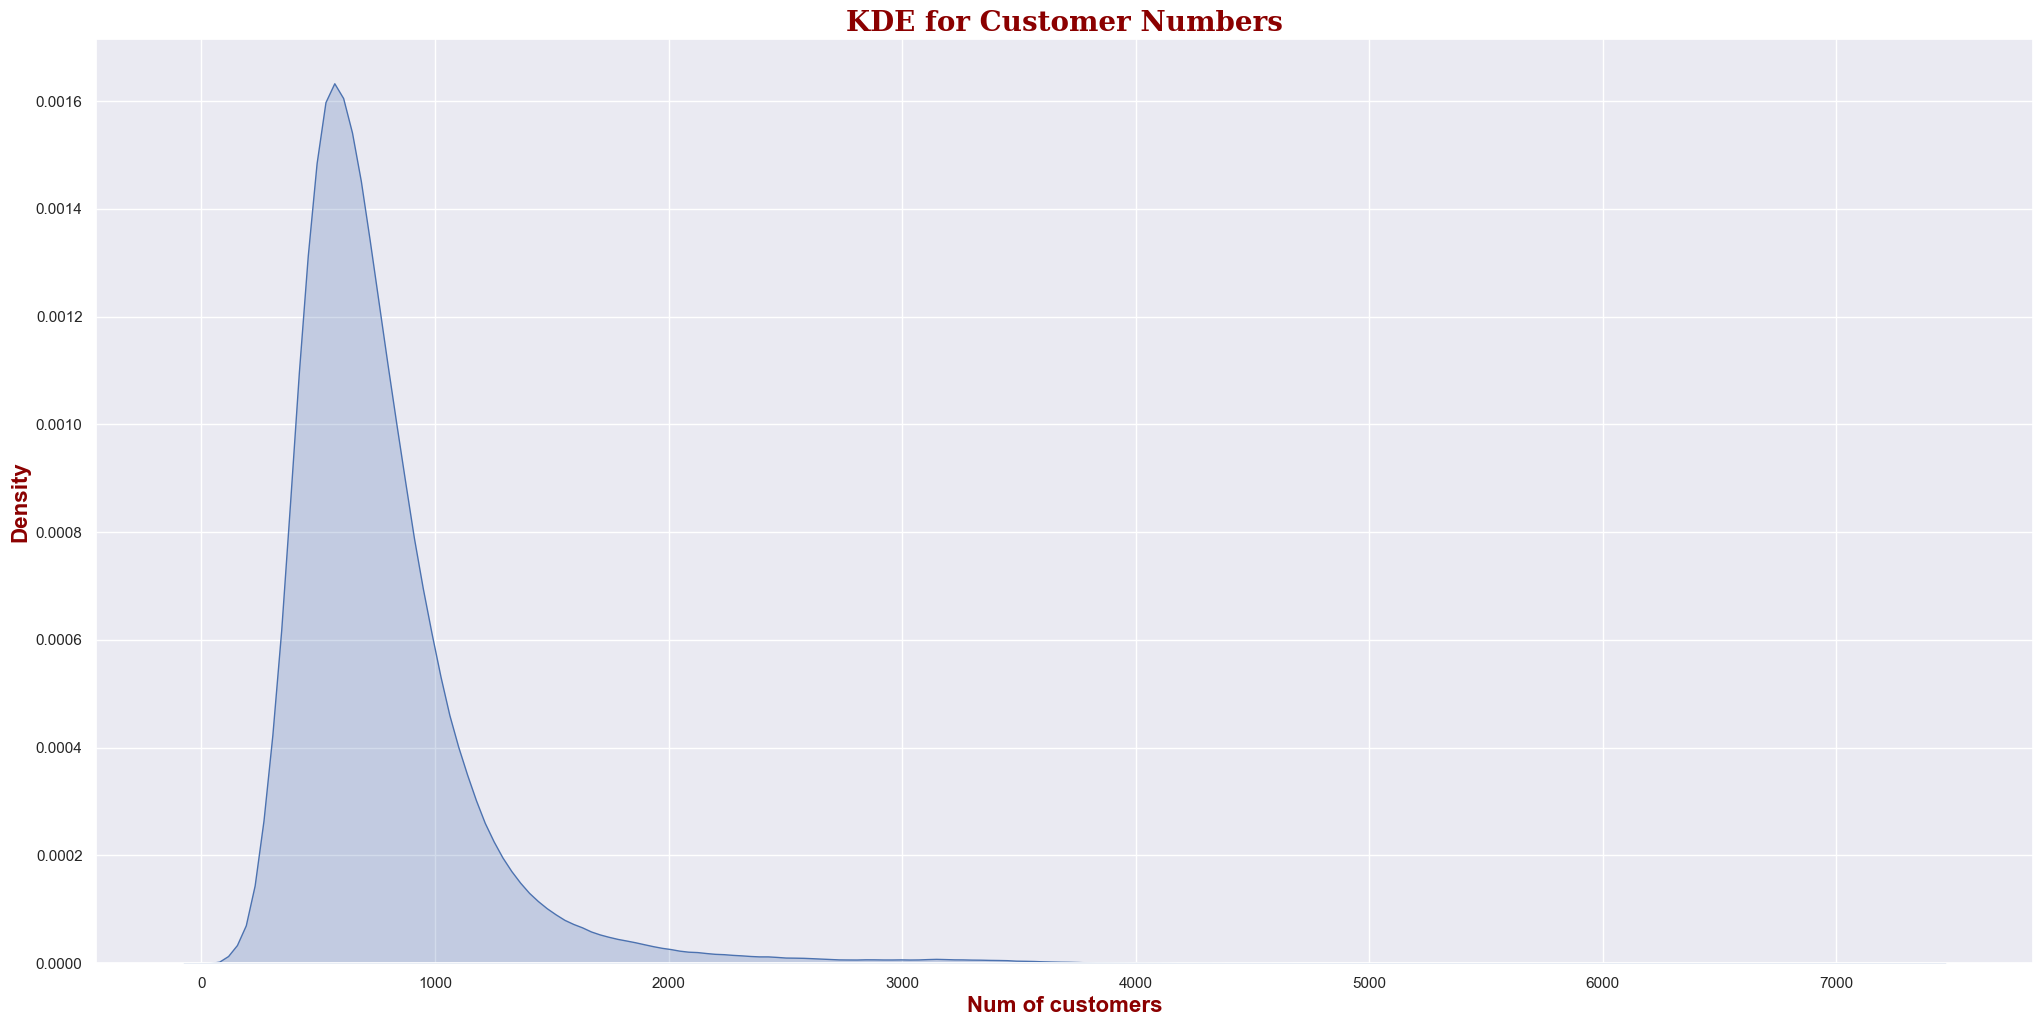

In [47]:
# customer number was squeezed in above chart so presenting it here
sns.kdeplot(df[df_num.customers > 0].customers, fill = True)
plt.title('KDE for Customer Numbers', fontdict = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 20})
plt.xlabel('Num of customers', fontdict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
plt.ylabel('Density', fontdict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16})
plt.show()

### <b>2). Categorical Features</b>

Text(0.5, 0.98, 'Categorical Univariate charts')

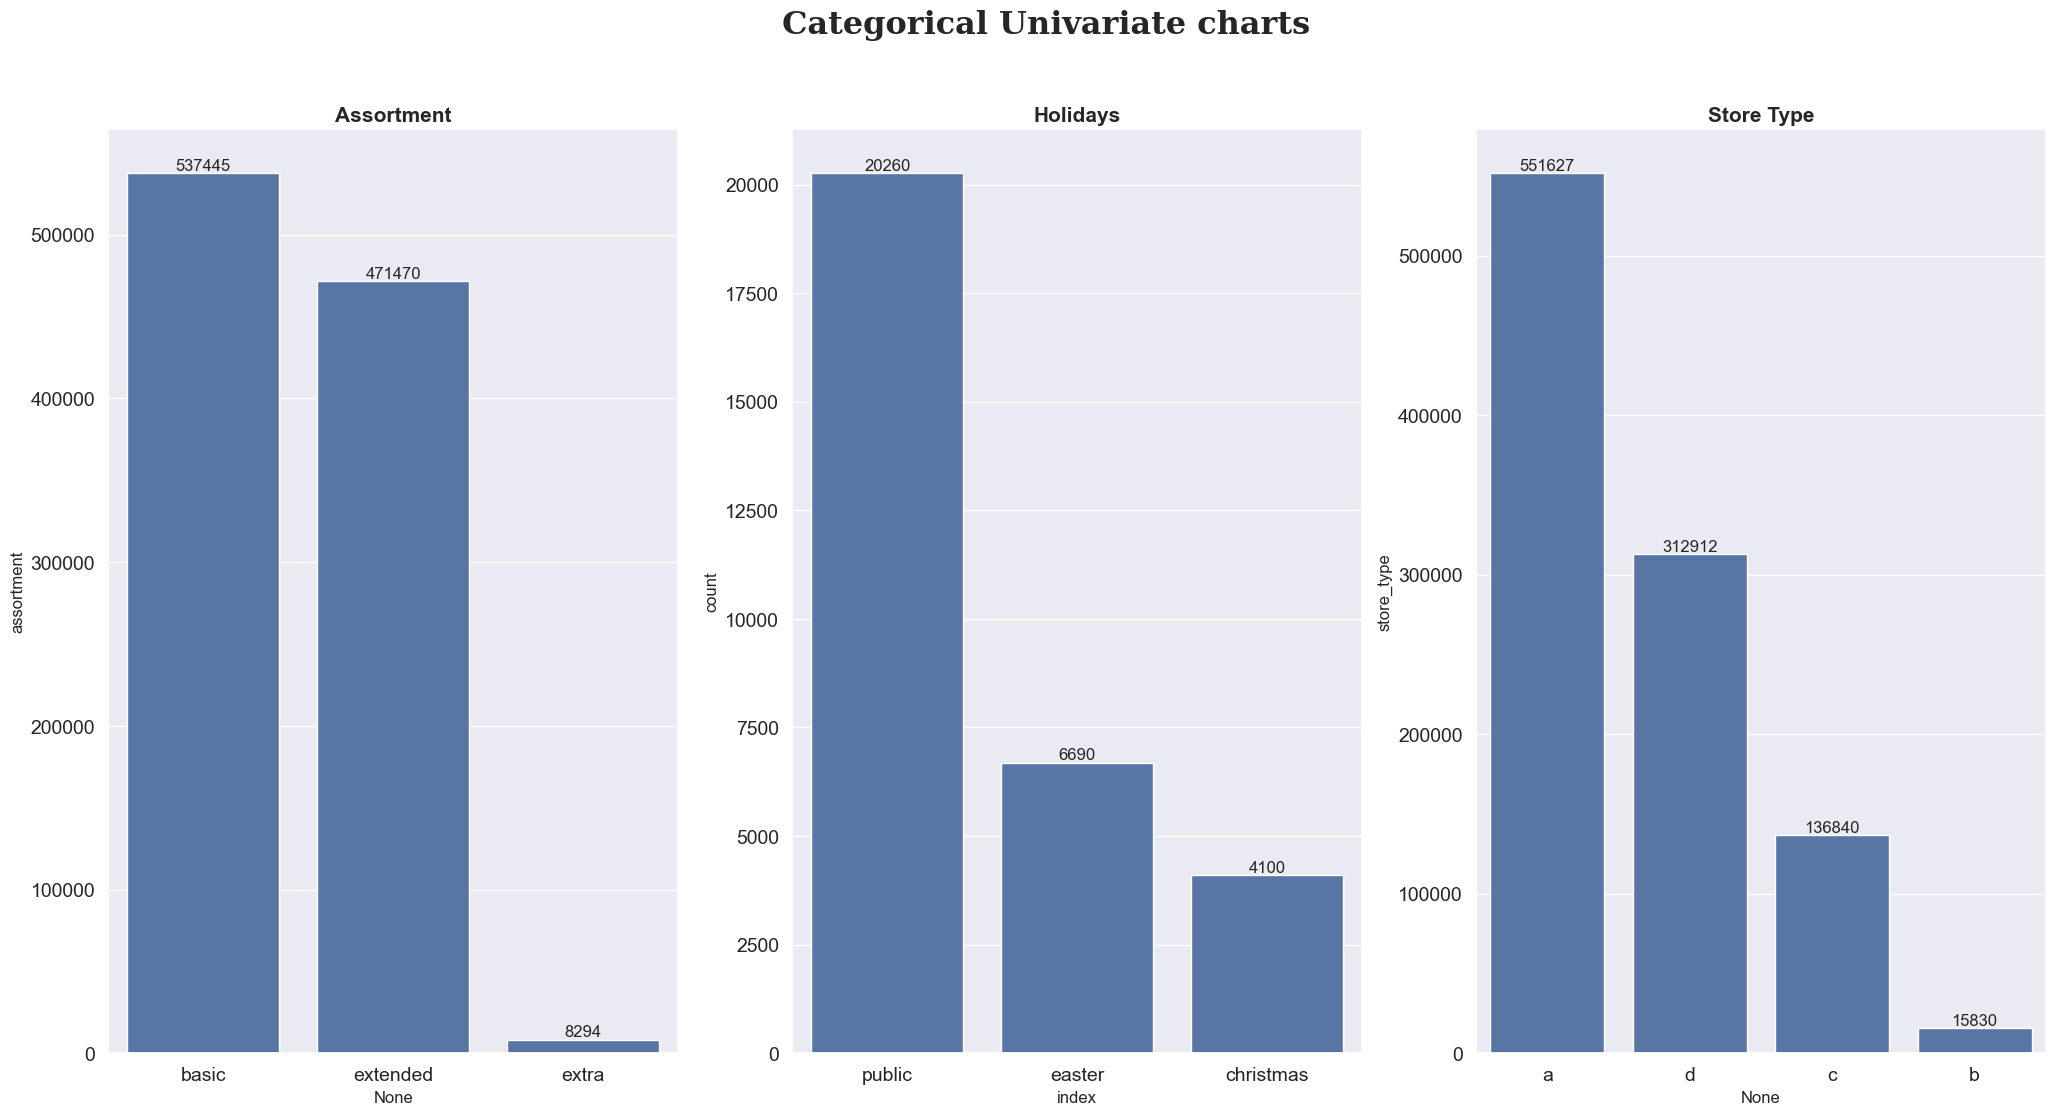

In [48]:
plt.subplot(131)
bar = sns.barplot(y = df.assortment.value_counts(), x = df.assortment.value_counts().index)
plt.title('Assortment', fontsize = 15, fontfamily = 'sans serif', weight = 'bold')
for label in bar.containers:
        bar.bar_label(label)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(132)
# to ignore normal days
hodidays = df.state_hd.value_counts().reset_index(name = 'count')
bar = sns.barplot(y = hodidays['count'][1:], x = hodidays['index'][1:])
plt.title('Holidays', fontsize = 15, fontfamily = 'sans serif', weight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for label in bar.containers:
        bar.bar_label(label)

plt.subplot(133)
bar = sns.barplot(y = df.store_type.value_counts(), x = df.store_type.value_counts().index)
plt.title('Store Type', fontsize = 15, fontfamily = 'sans serif', weight = 'bold')
for label in bar.containers:
        bar.bar_label(label)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.suptitle('Categorical Univariate charts', fontsize = 23, fontfamily = 'serif', weight = 'bold')

## <b>Bivariate Analysis</b>

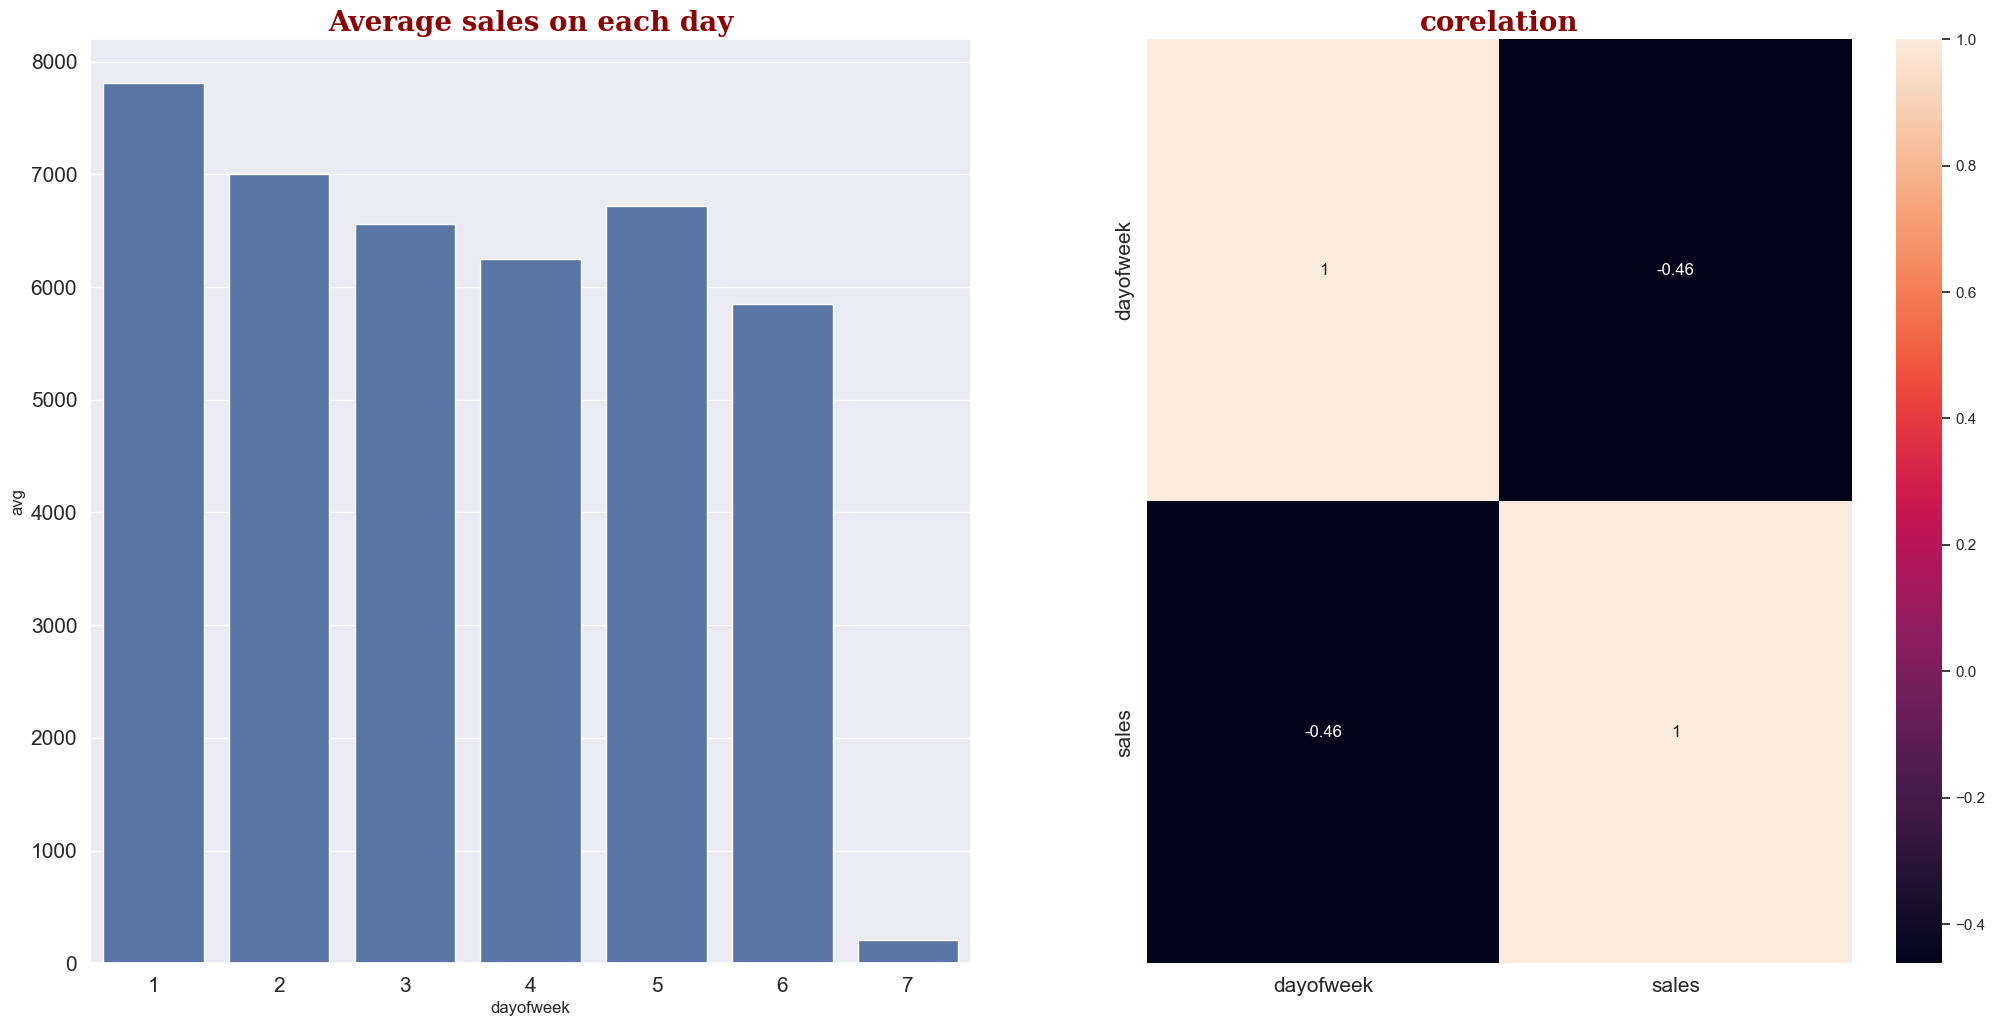

In [49]:
aux1 = df.groupby('dayofweek').sales.mean().reset_index(name = 'avg')

plt.subplot(121)
sns.barplot(aux1, x = 'dayofweek', y = 'avg')
plt.title('Average sales on each day', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(122)
sns.heatmap(df[['dayofweek', 'sales']].corr(), annot = True)
plt.title('corelation', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#¶
plt.show()

> <b>H2 : Normal working days will have more average sales then weekends(sat, sun).</b> ==> <b>True</b>

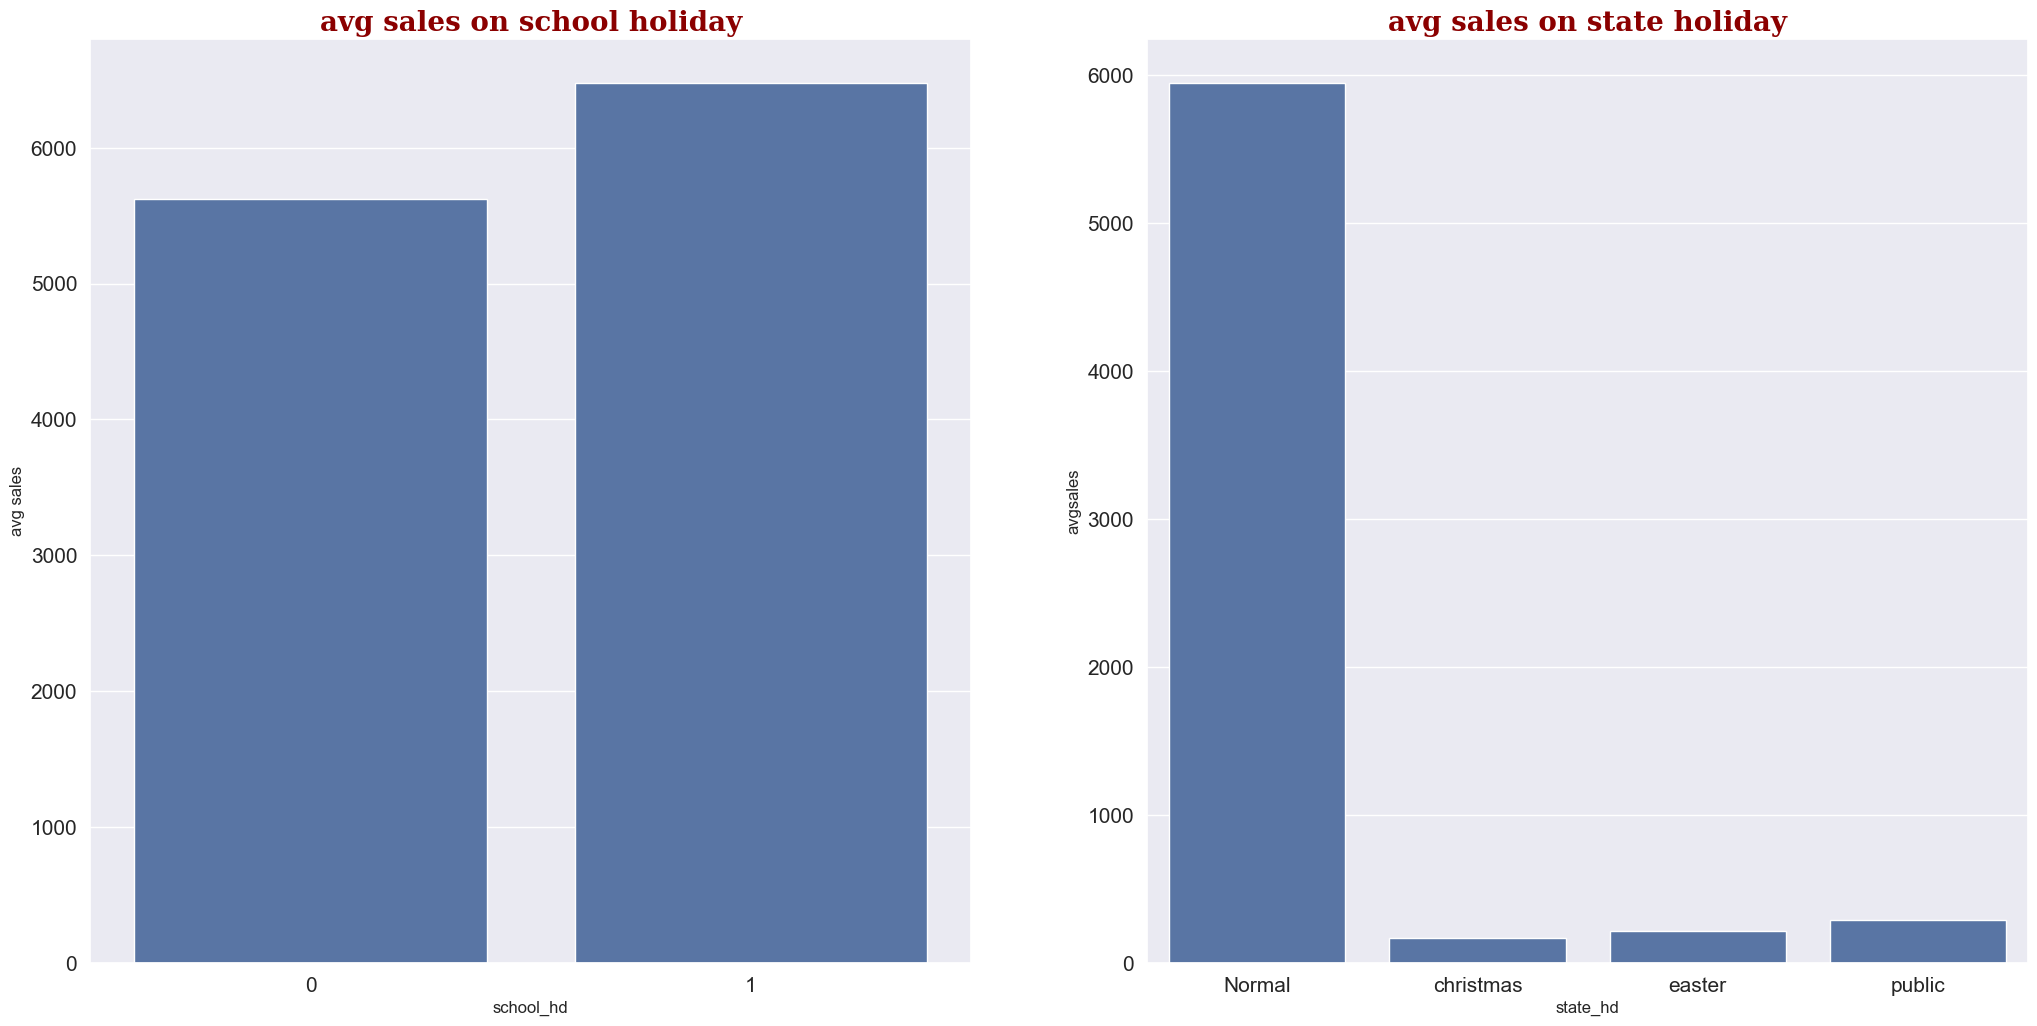

In [50]:
aux2 = df.groupby('school_hd').sales.mean().reset_index(name = 'avg sales')
plt.subplot(121)
sns.barplot(aux2, x = 'school_hd', y = 'avg sales')
plt.title('avg sales on school holiday', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

aux3 = df.groupby('state_hd').sales.mean().reset_index(name = 'avgsales')
plt.subplot(122)
sns.barplot(aux3, x = 'state_hd', y = 'avgsales')
plt.title('avg sales on state holiday', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

> <b>H6 : On school/state holidays sells will be much higher.</b> ==> <b>True (Partial)</b>
#### Above hypothesis is partially true because in state holidays we have very low sales.

In [51]:
aux = df.sort_values(by = 'date')
hd_week = []
for i,x in enumerate(aux.state_hd):
    if x != 'Normal' and x != 'public':
        hd_week.append(0)
        if 0 not in hd_week[-7:-1]:
            hd_week[-7:-1] = [1, 1, 1, 1, 1, 1]
        else:
            i = -7
            for x in hd_week[-7:-1]:
                if x == 0: 
                    i+=1
                    continue
                hd_week[i] = 1
                i+=1
            
            
    else:
        hd_week.append(-1)
aux['hd_week'] = hd_week[:1017209]

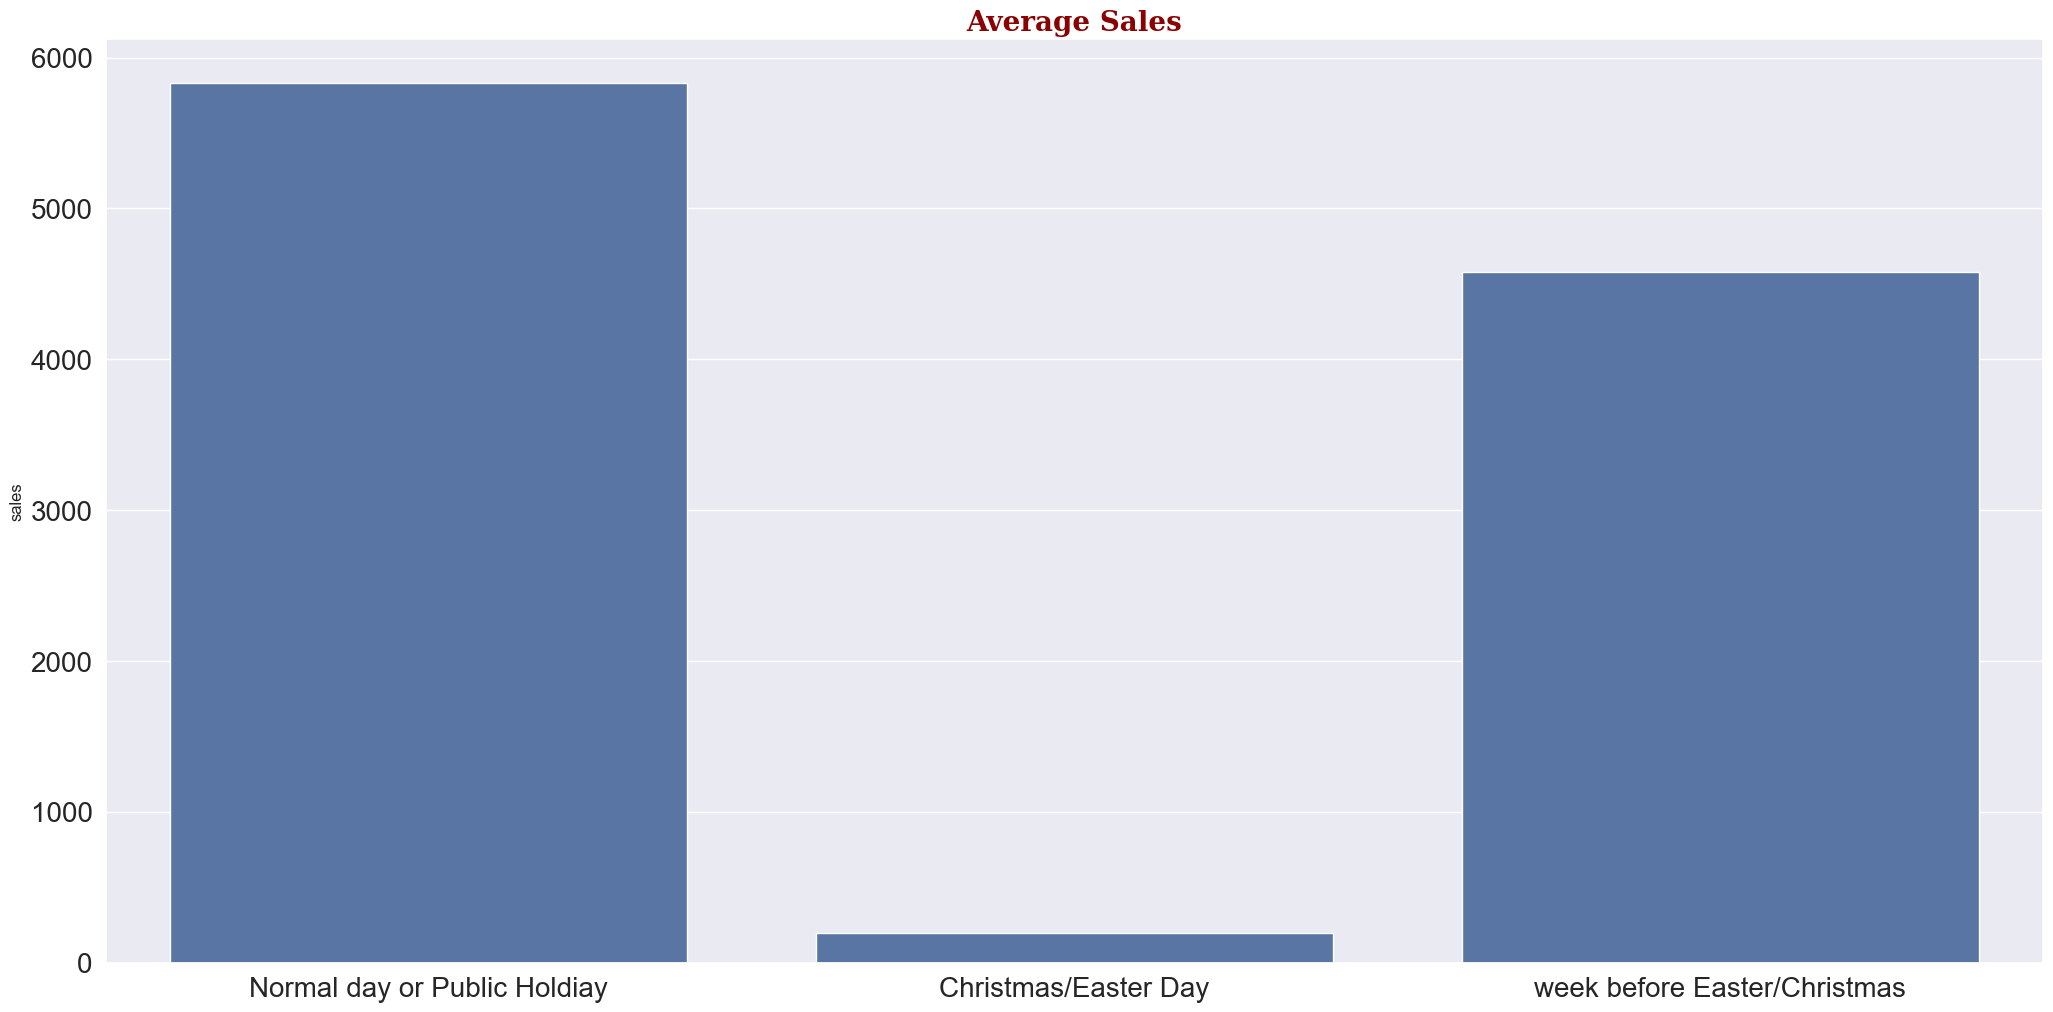

In [52]:
sns.barplot(y = aux.groupby('hd_week').sales.mean(), x = ['Normal day or Public Holdiay', 'Christmas/Easter Day', 'week before Easter/Christmas'])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Average Sales', fontdict = title)
plt.show()

> <b>H7 : There should be rise in sells, 3 or 4 days before the state holidays [only easter and christams]
</b> ==><b> FALSE</b>
#### Even after considering a whole pre Easter/Christmas week sale average is low. Sales decrease instead of increase.

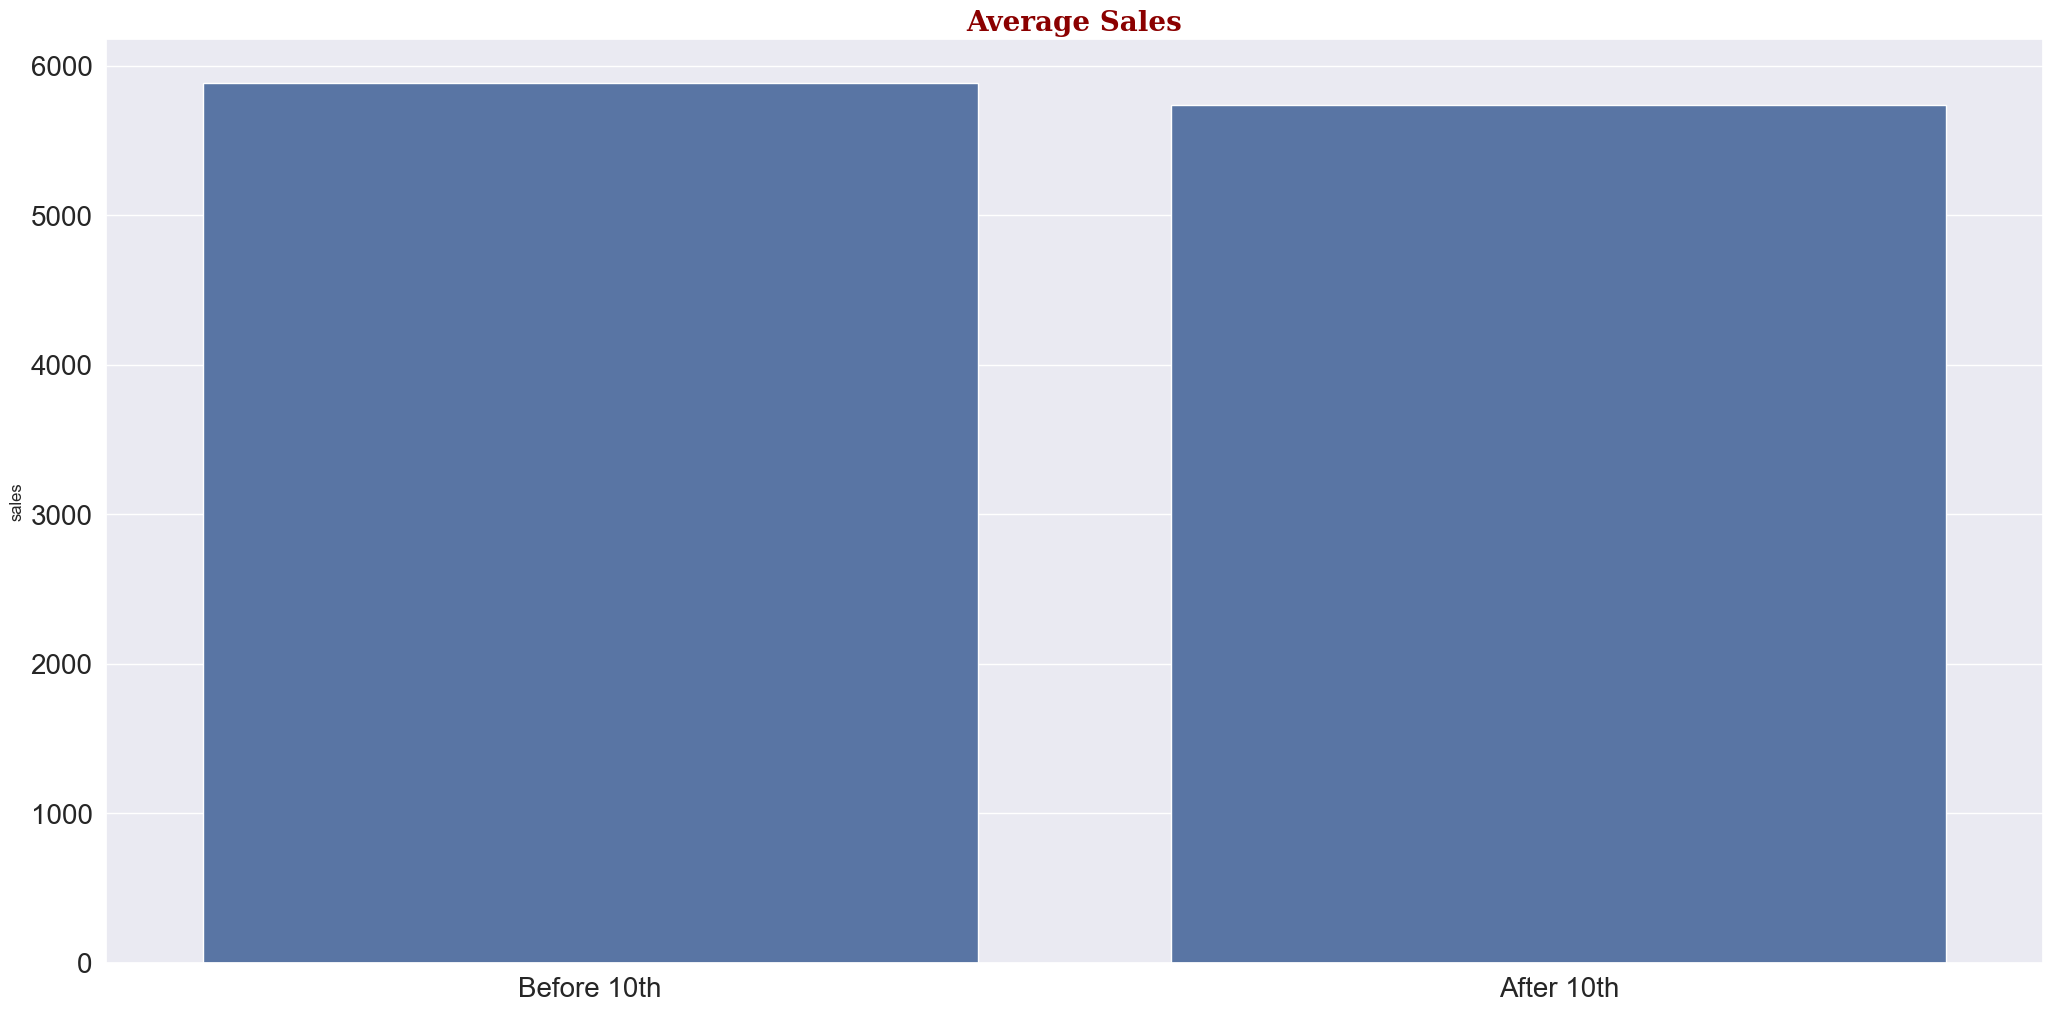

In [53]:
k = aux.groupby('date.1').sales.mean().reset_index(name = 'sales')
k['sales_b4'] = k['date.1'].apply(lambda x : 1 if x > 10 else 0)
sns.barplot(y = k.groupby('sales_b4').sales.mean(), x = ['Before 10th', 'After 10th'])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Average Sales', fontdict = title)
plt.show()

> <b>H9 : Stores should have more average sells after 10th of each month.[Because of salary credition day]
</b> ==><b> FALSE</b>
#### Sales before 10th are higher
#### People buy more at starting of new month

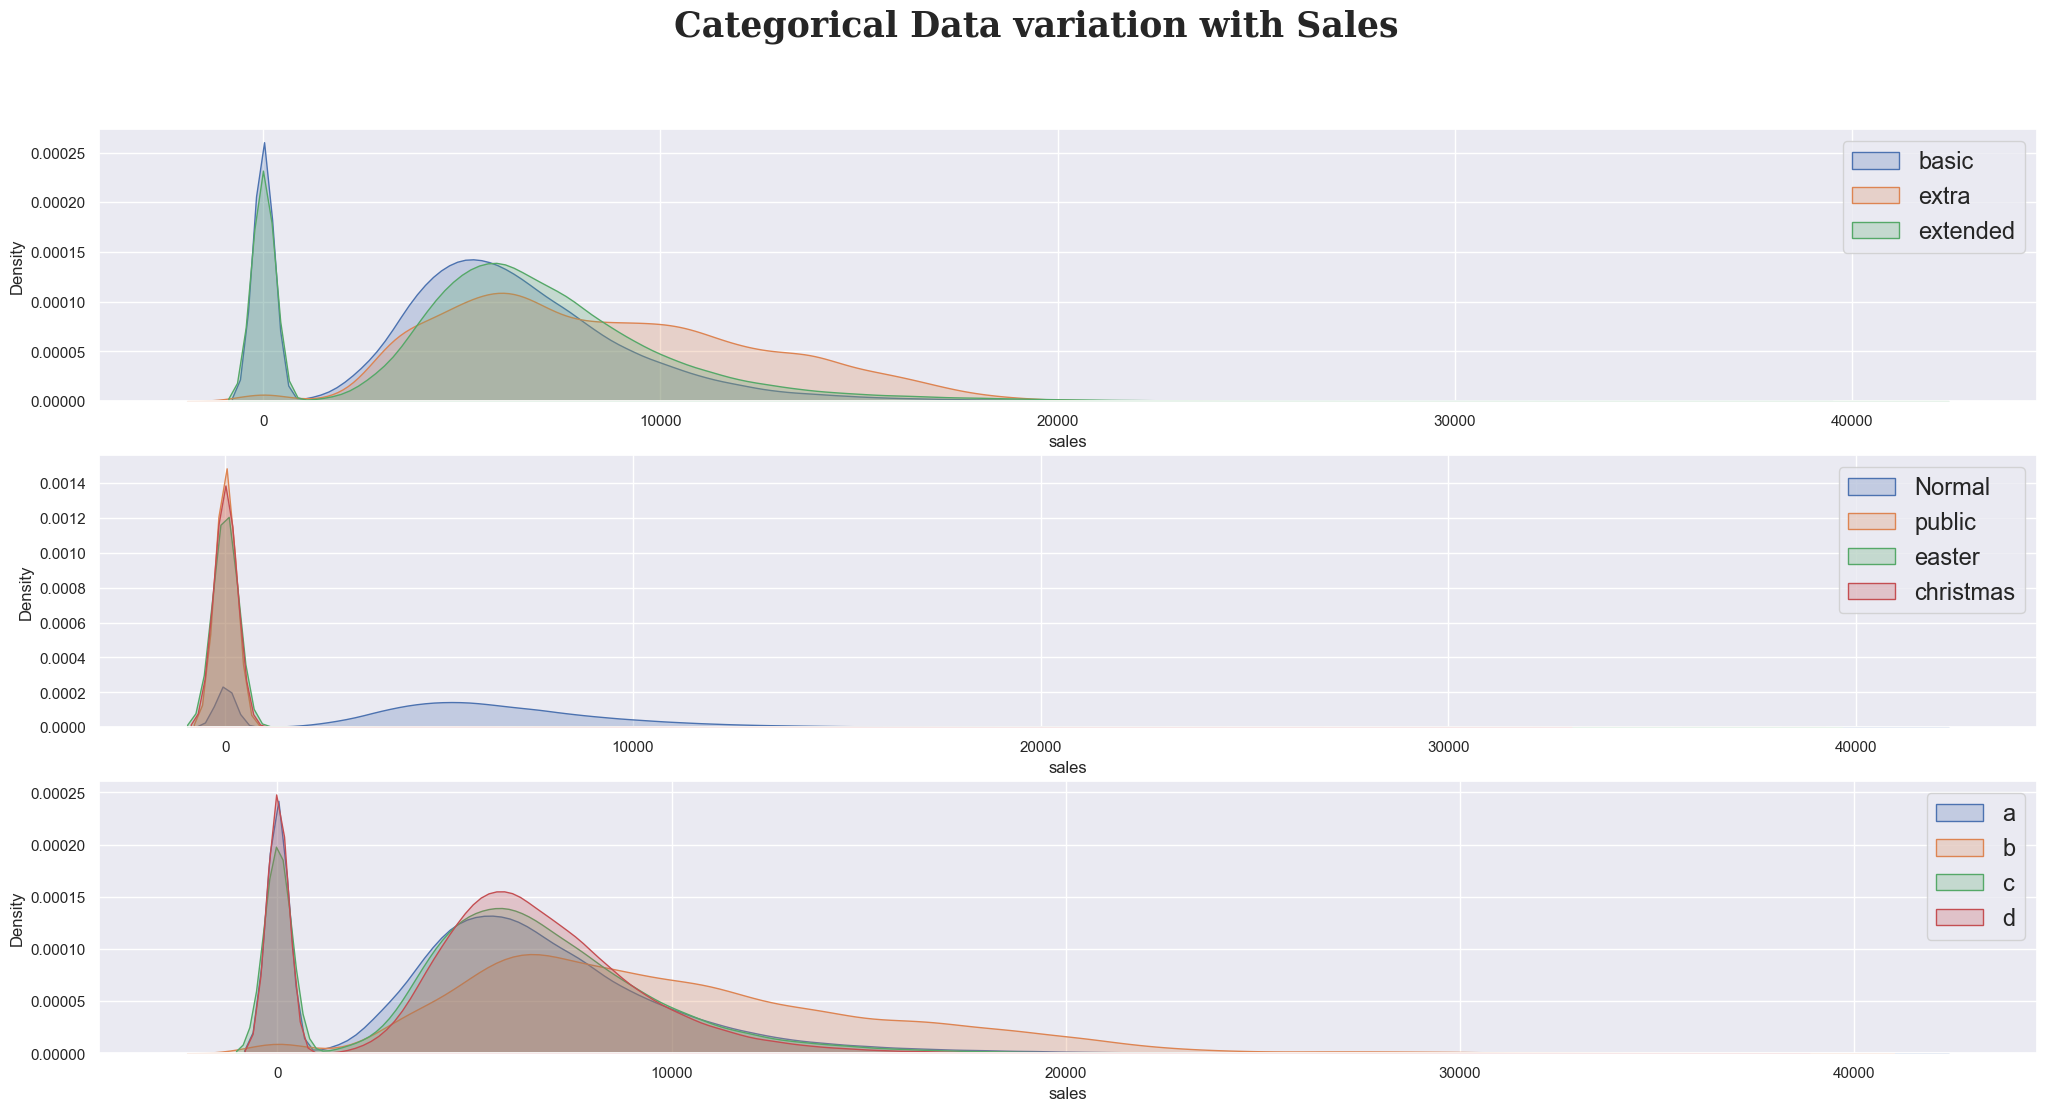

In [54]:
plt.subplot(311)
sns.kdeplot(df[df['assortment'] == 'basic']['sales'], label="basic", fill=True)
sns.kdeplot(df[df['assortment'] == 'extra']['sales'], label="extra", fill=True)
sns.kdeplot(df[df['assortment'] == 'extended']['sales'], label="extended", fill=True)
plt.legend(['basic', 'extra', 'extended'], fontsize = 17)

plt.subplot(312)
sns.kdeplot(df[df['state_hd'] == 'Normal']['sales'], label="Normal", fill=True)
sns.kdeplot(df[df['state_hd'] == 'public']['sales'], label="public", fill=True)
sns.kdeplot(df[df['state_hd'] == 'easter']['sales'], label="easter", fill=True)
sns.kdeplot(df[df['state_hd'] == 'christmas']['sales'], label="christmas", fill=True)
plt.legend(['Normal', 'public', 'easter', 'christmas'], fontsize = 17)

plt.subplot(313)
sns.kdeplot(df[df['store_type'] == 'a']['sales'], label="a", fill=True)
sns.kdeplot(df[df['store_type'] == 'b']['sales'], label="b", fill=True)
sns.kdeplot(df[df['store_type'] == 'c']['sales'], label="c", fill=True)
sns.kdeplot(df[df['store_type'] == 'd']['sales'], label="d", fill=True)
plt.legend(['a', 'b', 'c', 'd'], fontsize = 17)

plt.suptitle('Categorical Data variation with Sales', fontsize = 25, fontfamily = 'serif', weight = 'bold')
plt.show()

#### <li><b>Basic and Extra assortment sales follow a log normal distribution</b></li>
#### <li><b>A, C and D stores follow log normal distribution</b></li>

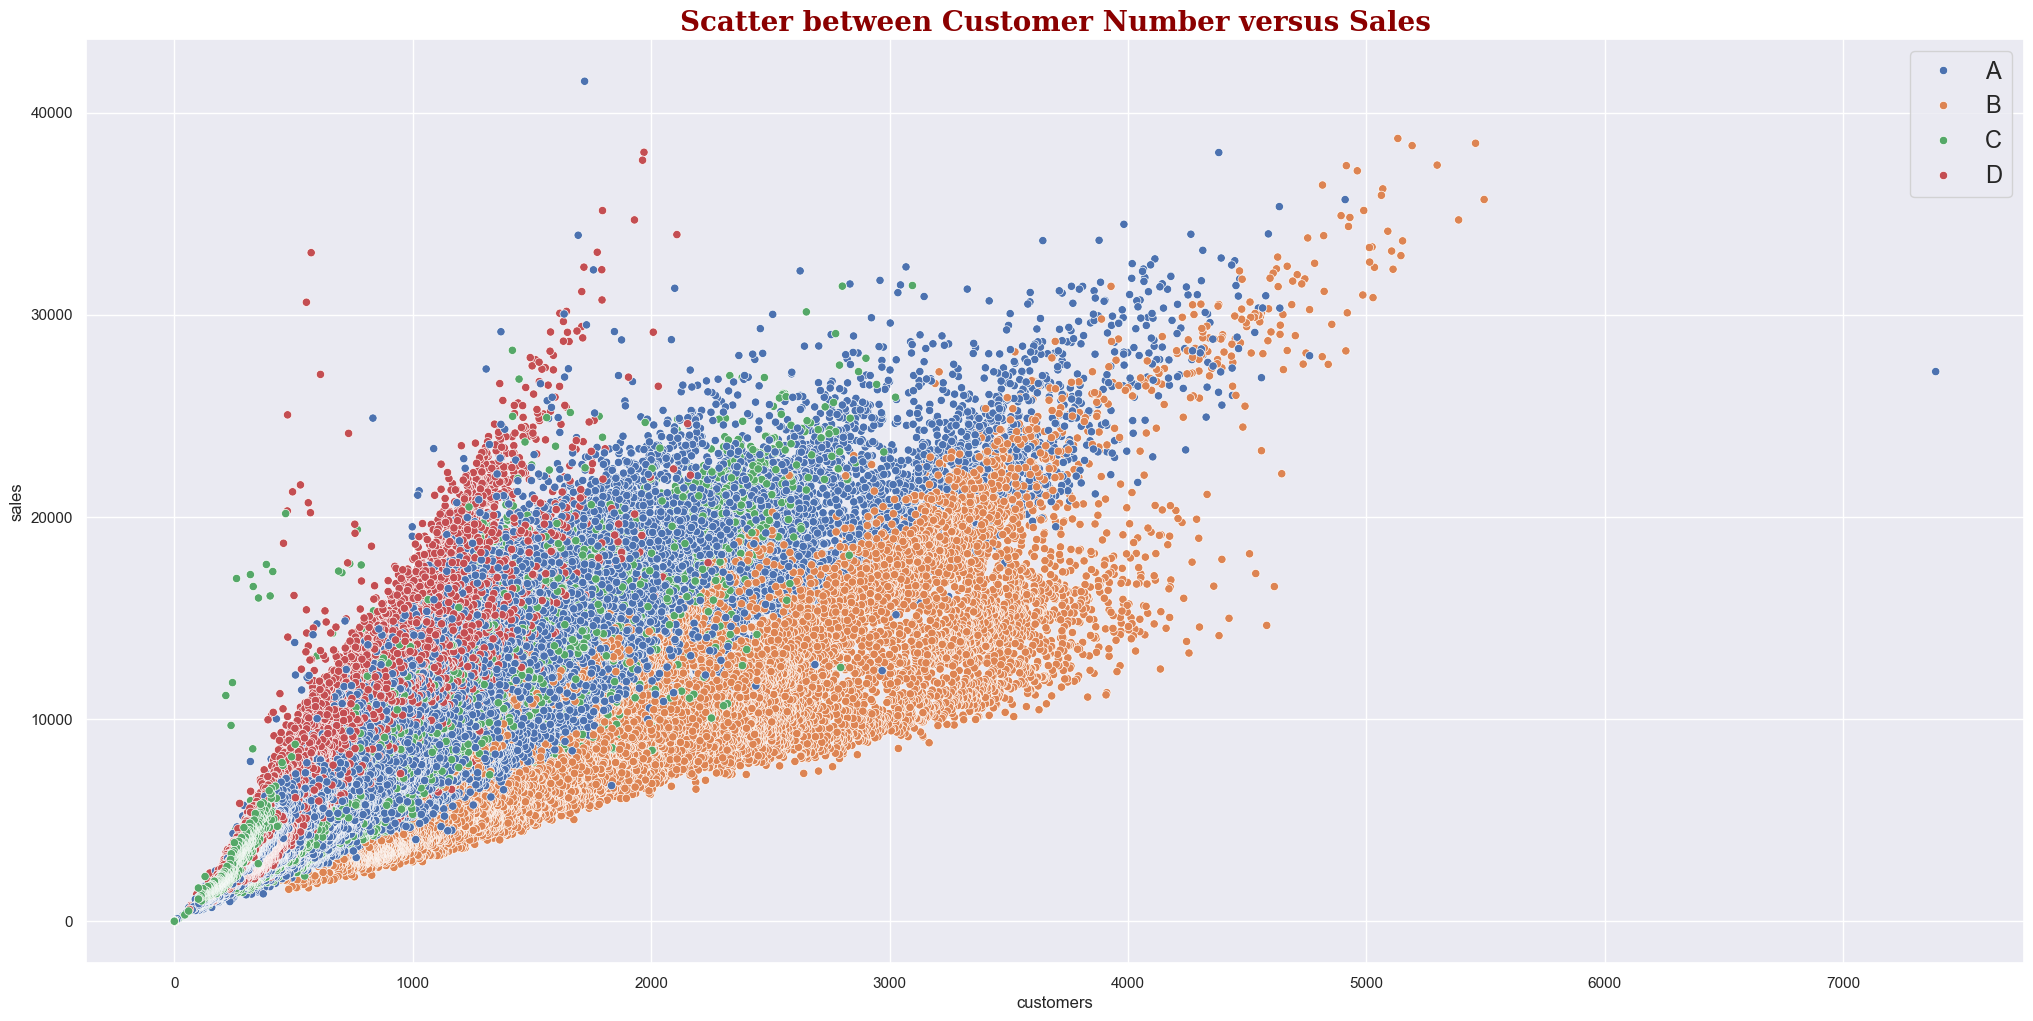

In [55]:
sns.scatterplot(df, x = 'customers', y = 'sales', hue = 'store_type')
plt.legend(['A', 'B', 'C', 'D'], fontsize = 17)
plt.title('Scatter between Customer Number versus Sales', fontdict = title)
plt.show()

#### <li><b>B store customers are high in number and are scatter between 45 degree and 30 degree line. Which shows they are high in number and a decent amount of sales.</b></li>
#### <li><b>D store customers are less in number but their purchases are high compared to any other customers.</b></li>
#### <li><b>A store customers high in number and they are spread between B and D type stores' customers. Their purhcases are also very high. They are most important customers for store</b></li>
#### <li><b>C store customers are less in number and they are sparse in the plot. They show high density close to (0, 0). They are less in number their purhases are low.</b></li>

Text(0.5, 1.0, 'Corelation')

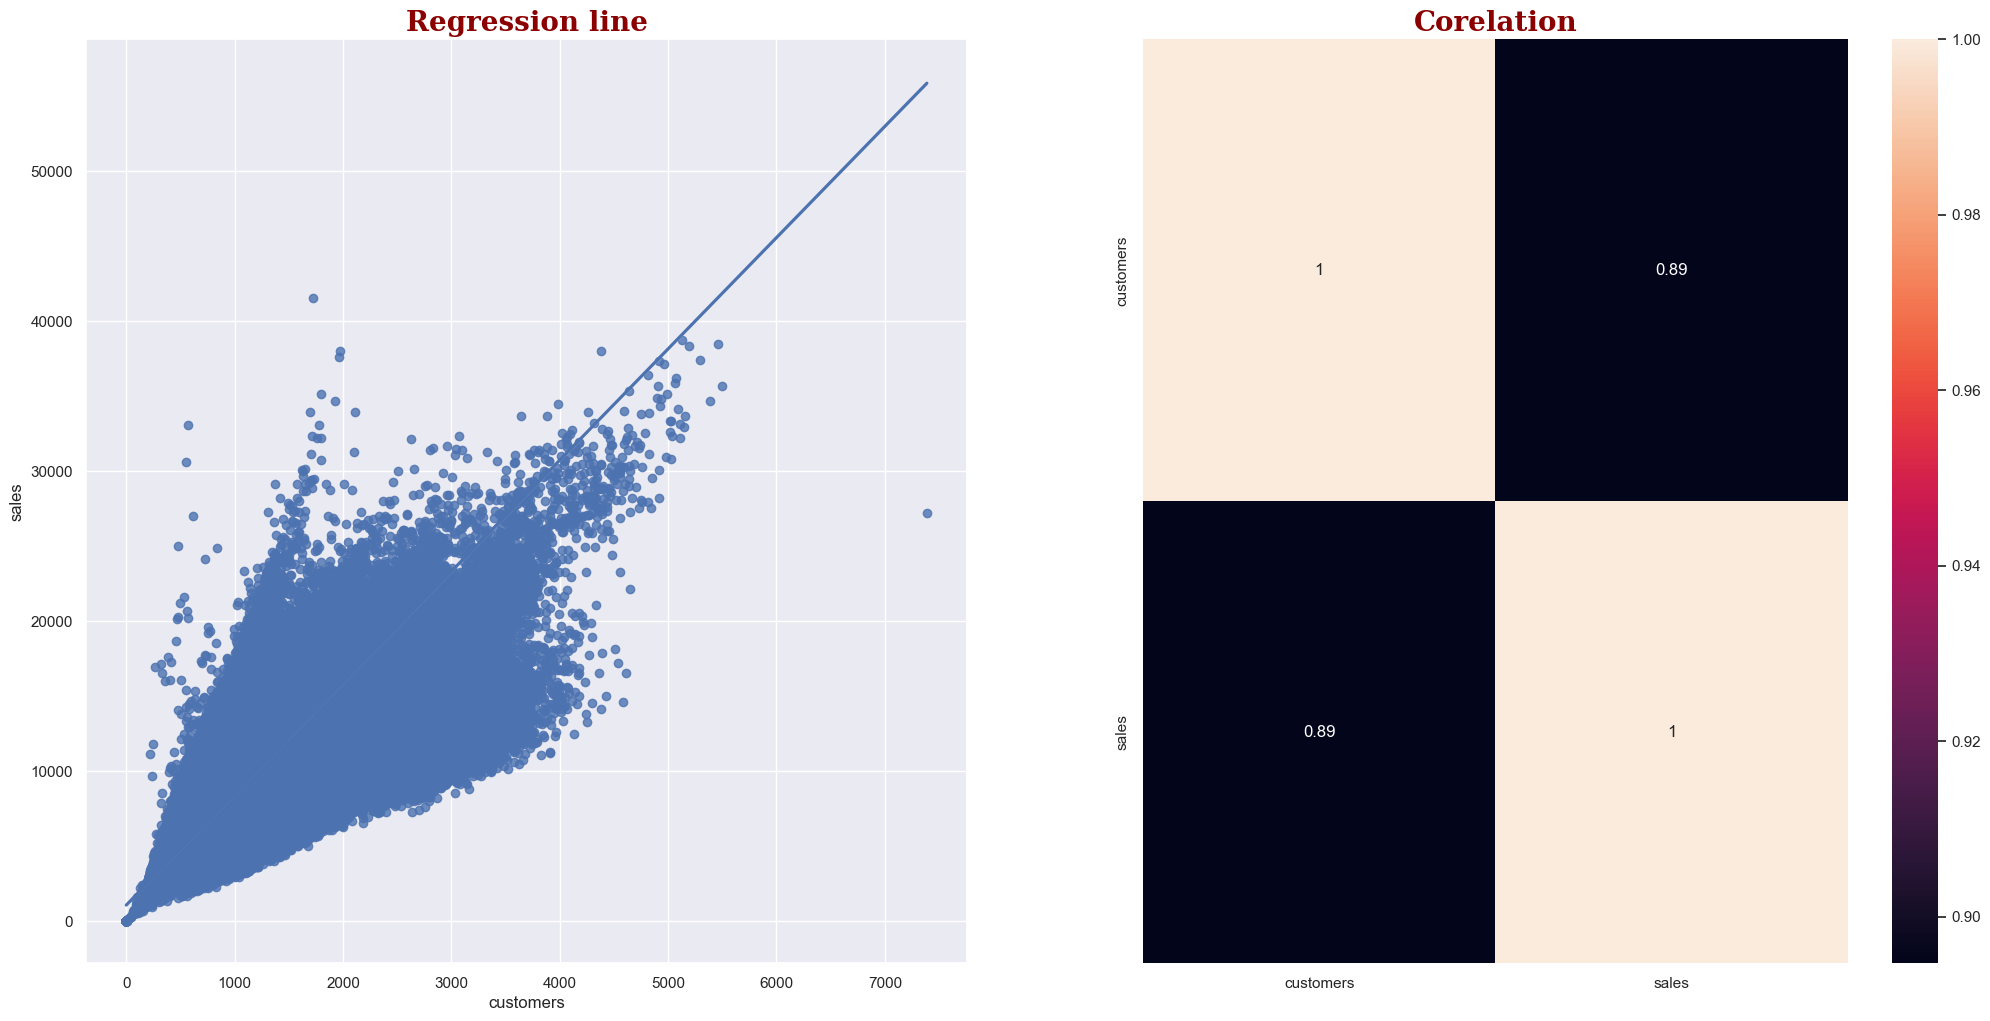

In [56]:
plt.subplot(121)
sns.regplot(df, x = 'customers', y = 'sales')
plt.title('Regression line', fontdict = title)

plt.subplot(122)
sns.heatmap(df[['customers', 'sales']].corr(), annot = True)
plt.title('Corelation', fontdict = title)

#### <b>H3 : Number of customers should have a positive correlation (close to 1) with Sales.</b>
#### <b>Result = True. </b>

Text(0.5, 1.0, 'Corelation')

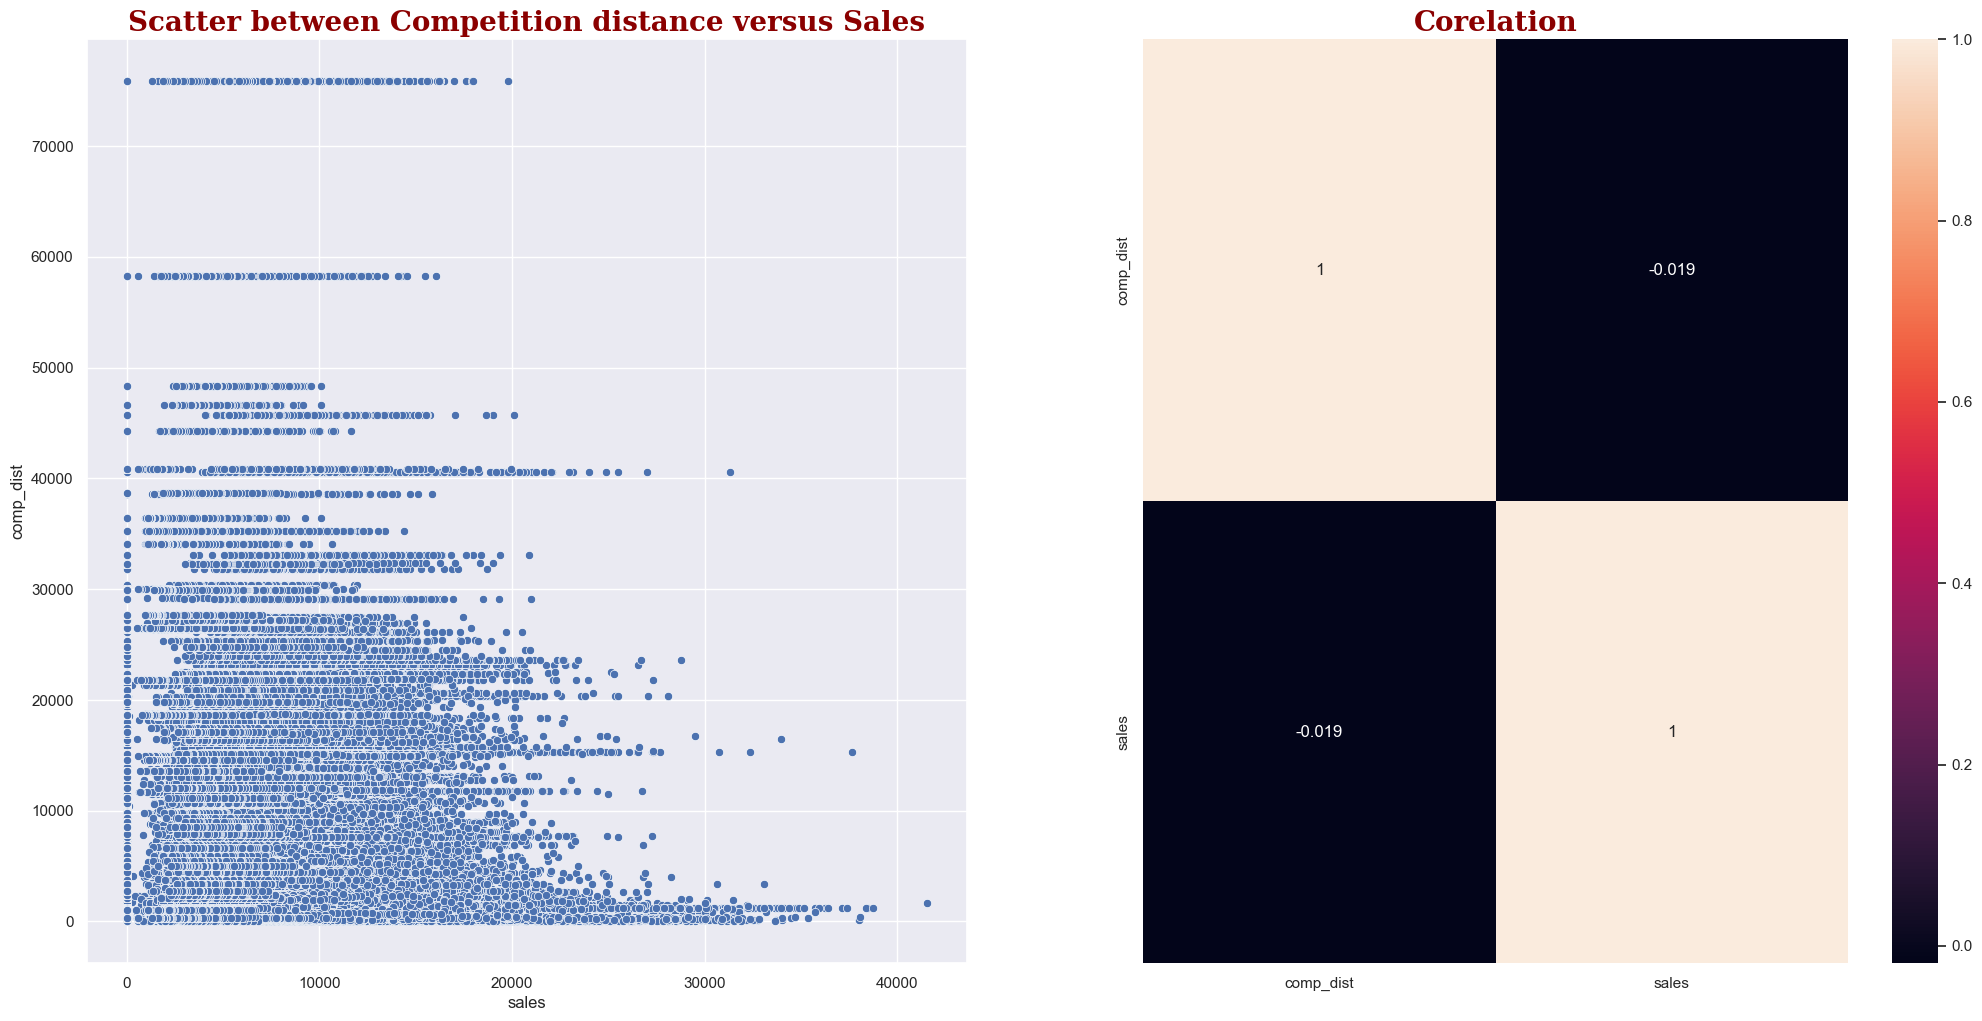

In [57]:
plt.subplot(121)
sns.scatterplot(df, y = 'comp_dist', x = 'sales')
plt.title('Scatter between Competition distance versus Sales', fontdict = title)

plt.subplot(122)
sns.heatmap(df[['comp_dist', 'sales']].corr(), annot = True)
plt.title('Corelation', fontdict = title)

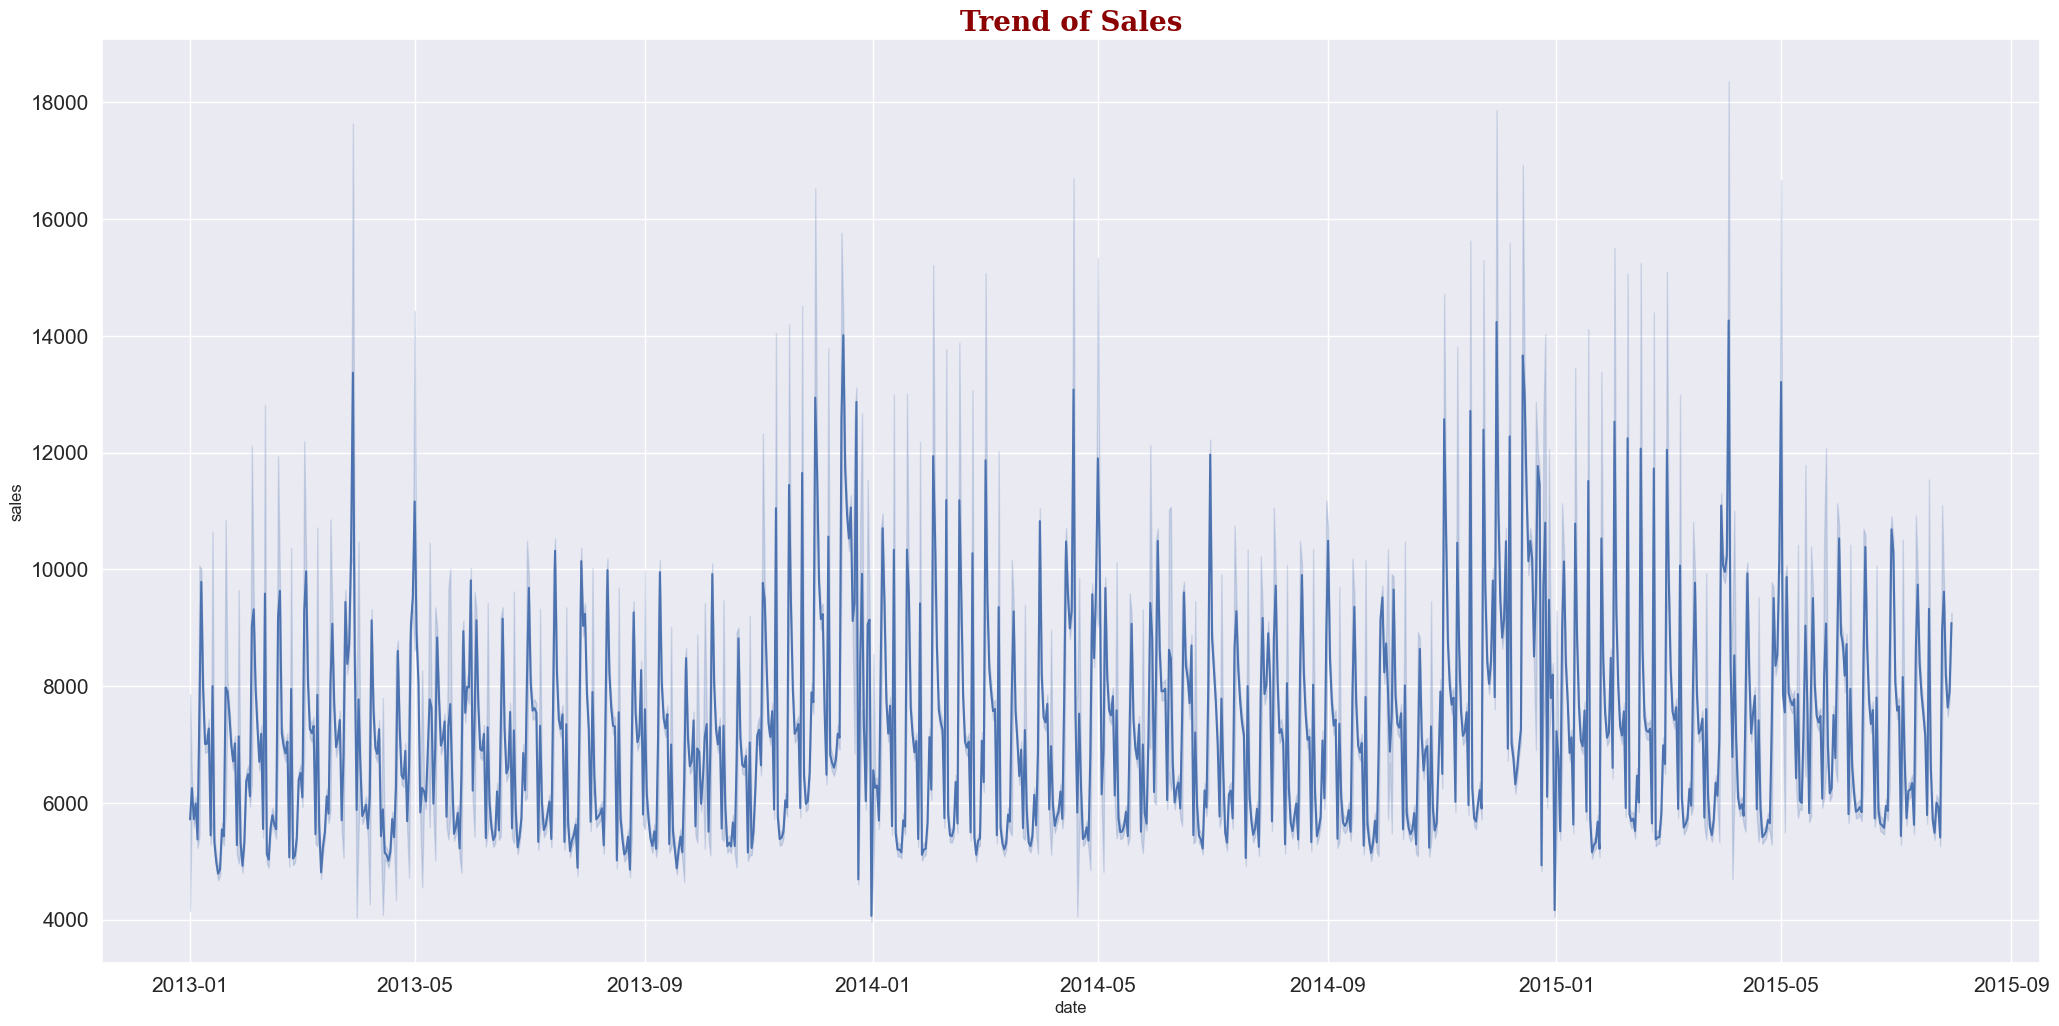

In [58]:
time_Data = df[['sales', 'date', 'open']].copy()
time_Data.sort_values(by = 'date', ascending = True, inplace = True)
time_Data = time_Data[time_Data.open != 0]

sns.lineplot(time_Data, x = 'date', y = 'sales')
plt.title('Trend of Sales', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### <b>I can clearly see pattern repetation at some constant innterval. Time series analysis should be done here. And this frequent falls are because of days when shop is closed. Likely because of sundays. Lets ignore the case when shop was closed.</b>

Text(0.5, 0.98, 'Time Series Analysis of sales')

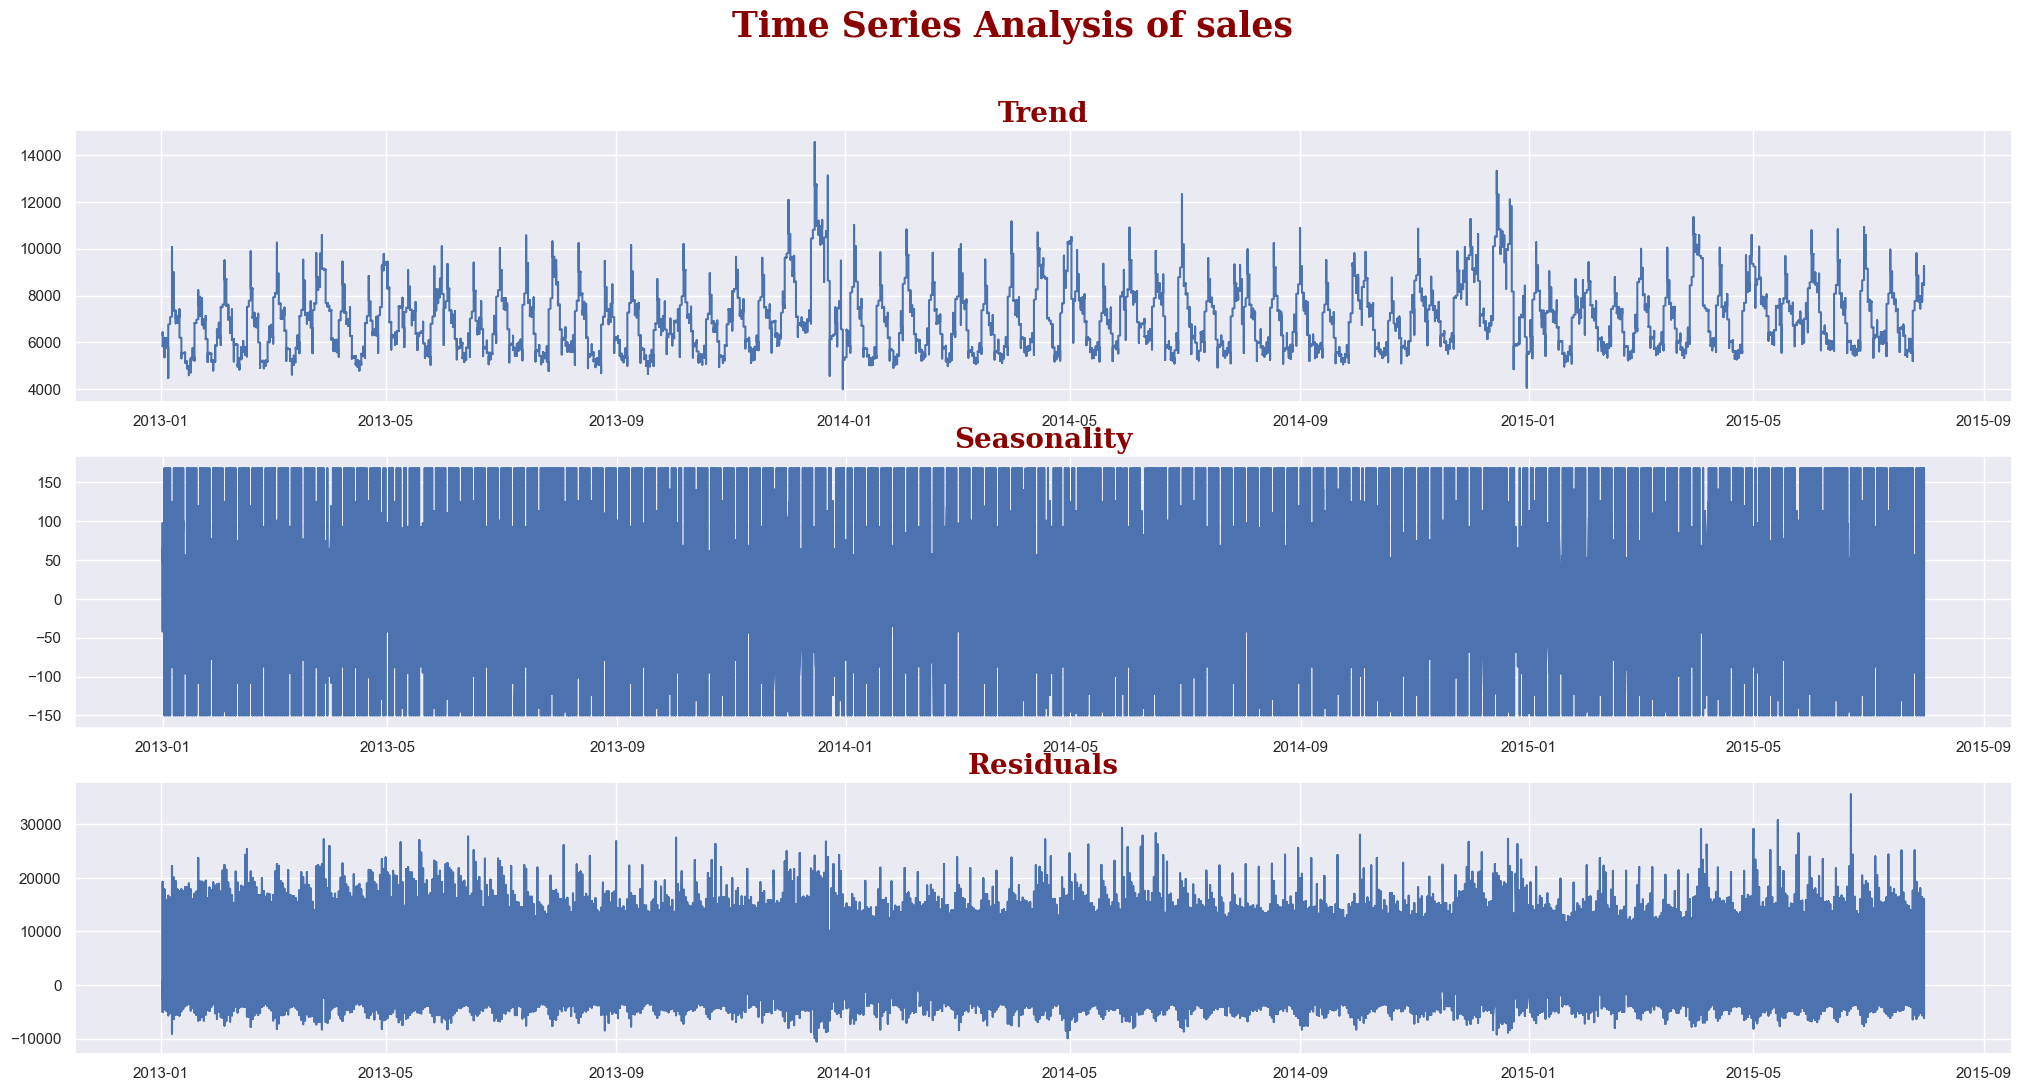

In [59]:
time_Data = df[['sales', 'date', 'open']].copy()
time_Data.sort_values(by = 'date', ascending = True, inplace = True)
time_Data = time_Data[time_Data.open != 0]
time_Data.drop('open', axis = 1, inplace = True)
time_Data = time_Data.set_index('date')

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_Data, model='additive', period = 365)

plt.subplot(311)
plt.plot(result.trend)
plt.title('Trend', fontdict = title)

plt.subplot(312)
plt.plot(result.seasonal)
plt.title('Seasonality', fontdict = title)

plt.subplot(313)
plt.plot(result.resid)
plt.title('Residuals', fontdict = title)

plt.suptitle('Time Series Analysis of sales', fontsize = 25, fontfamily = 'serif', weight = 'bold', color = 'darkred' )

In [60]:
time_Data = df[['sales', 'date', 'open', 'assortment', 'store_type', 'state_hd']].copy()
time_Data.sort_values(by = 'date', ascending = True, inplace = True)
time_Data = time_Data[time_Data.open != 0]

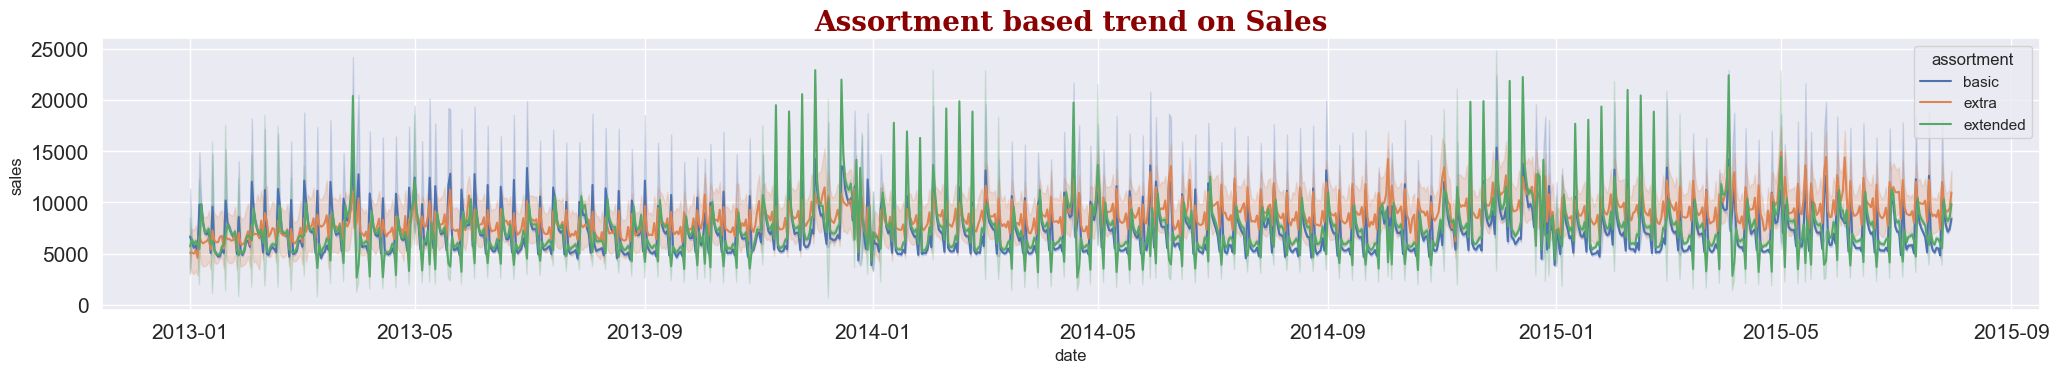

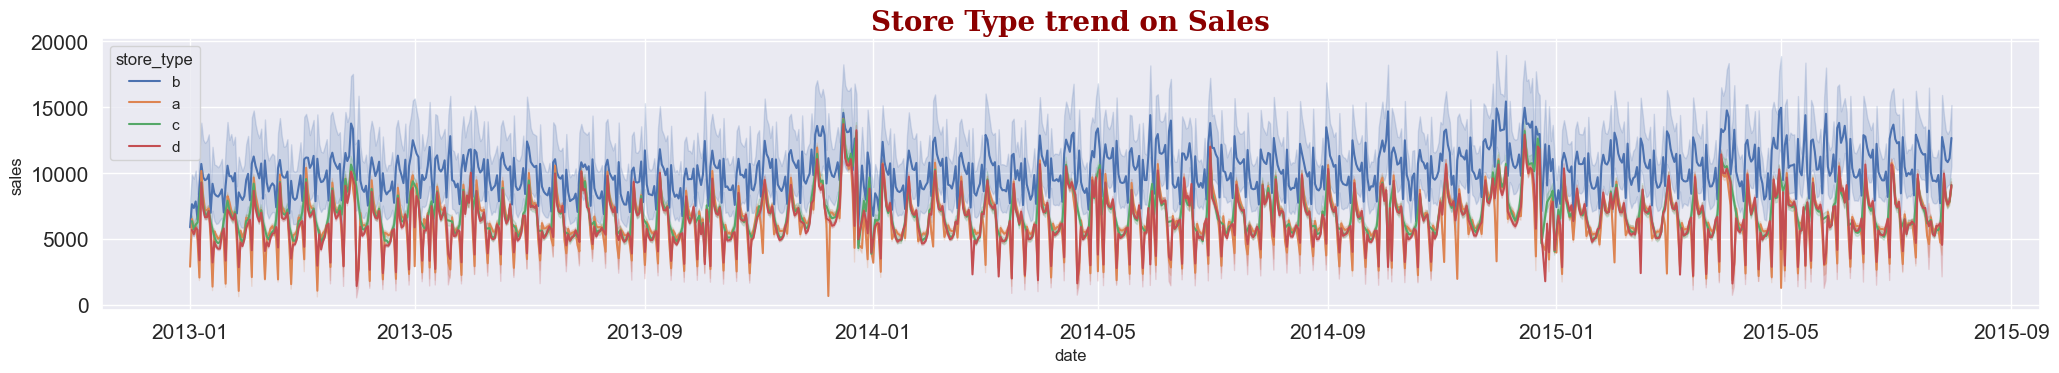

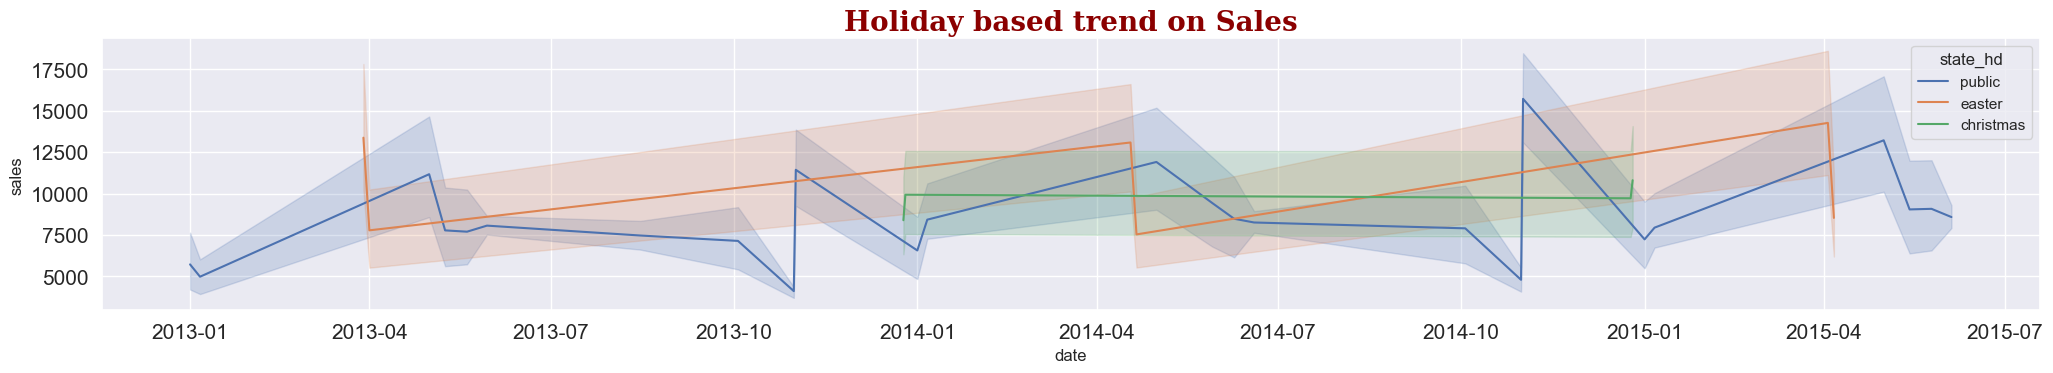

In [61]:
plt.subplot(311)
sns.lineplot(time_Data, x = 'date', y = 'sales', hue = 'assortment')
plt.title('Assortment based trend on Sales', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

plt.subplot(312)
sns.lineplot(time_Data, x = 'date', y = 'sales', hue = 'store_type')
plt.title('Store Type trend on Sales', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

plt.subplot(313)
sns.lineplot(time_Data[time_Data.state_hd != 'Normal'], x = 'date', y = 'sales', hue = 'state_hd')
plt.title('Holiday based trend on Sales', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

> <b>H10 : Sale trend should be periodic</b>
==> <b>True</b>
#### Sales follow a certain pattern in every store type
<span></span>
#### <b>Observations</b>
#### <li><b>Clearly in first subplot the the extra assortemnt seems to have a high trend of sales but extended sales have more spikes. The basic assortemnt follows with extended and have spikes but lesser than extended</b></li>
#### <li><b>Store type b have better sale trend than any other type. Other stores follow almost same trend but d and a have some downward spikes.</b></li>


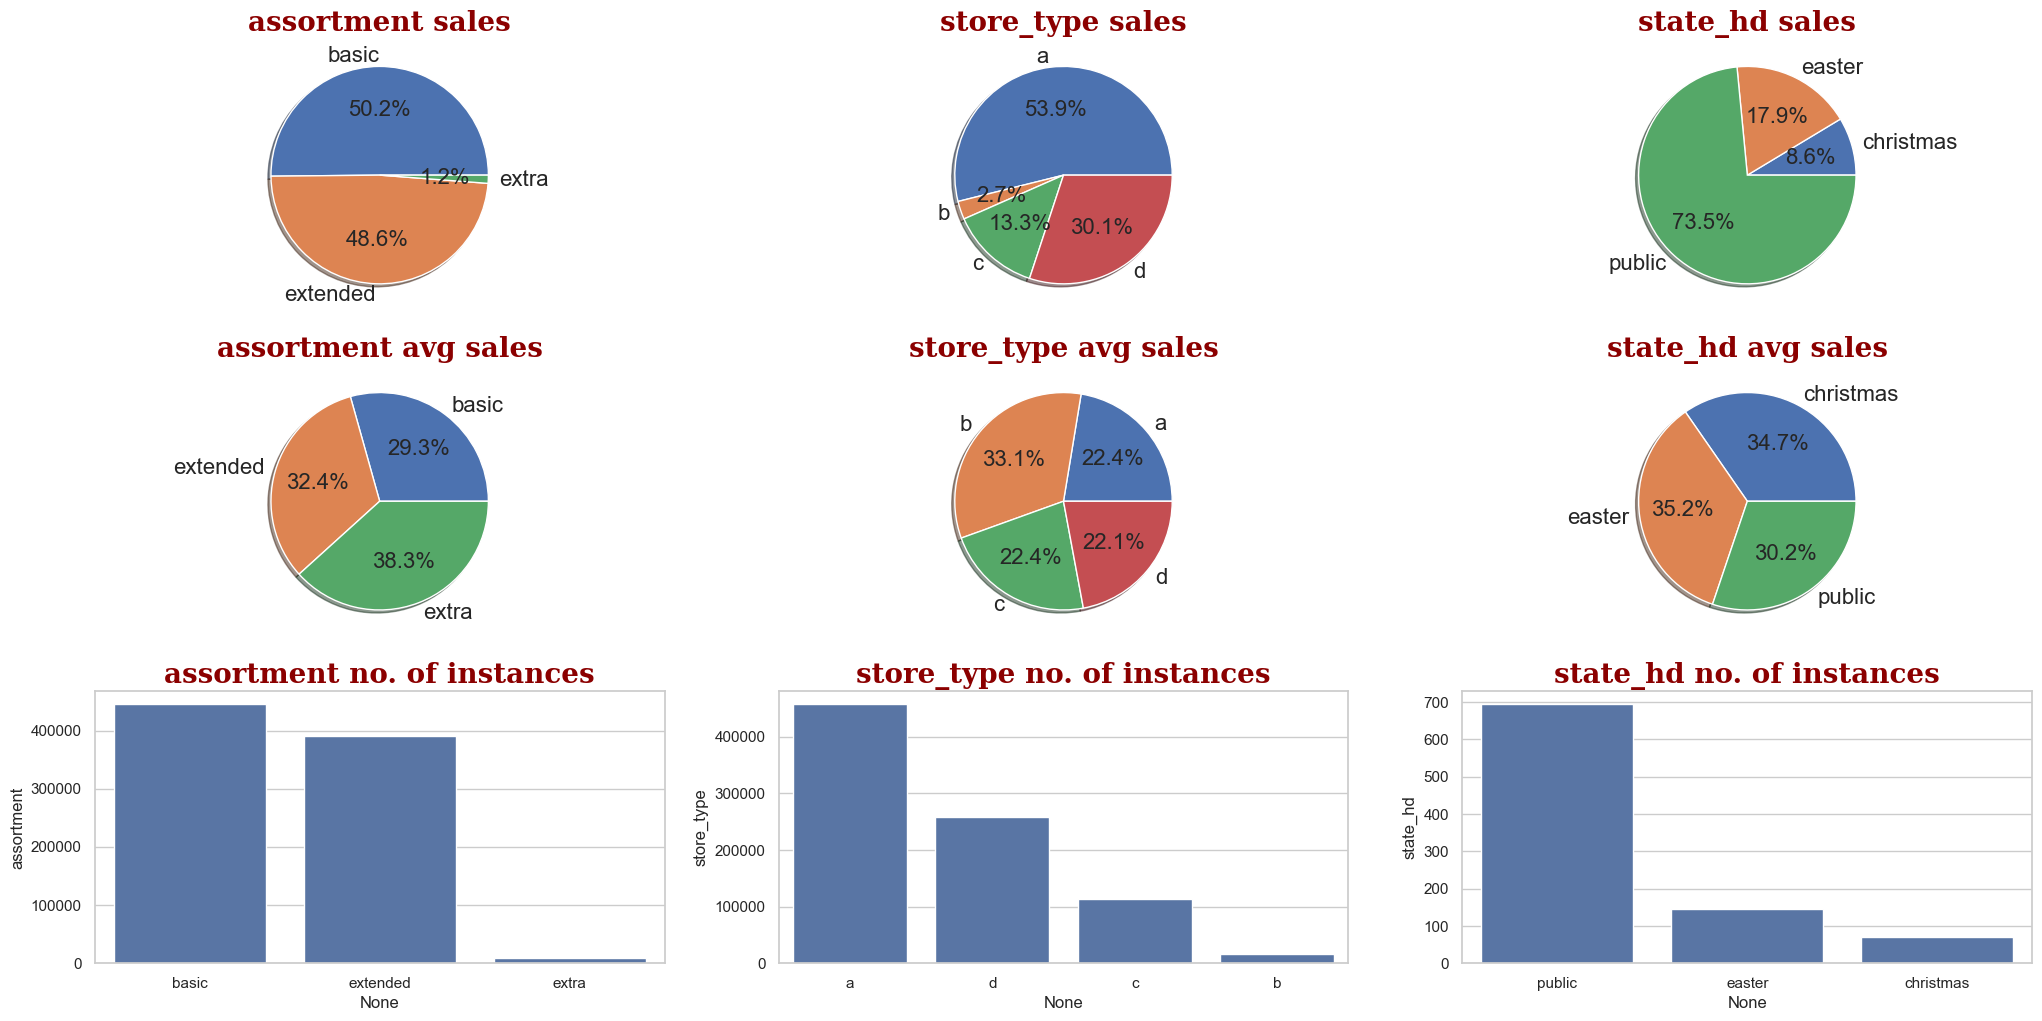

In [62]:
aux = df[df.open == 1]
sub = 330
sns.set(style = 'whitegrid')
for x in ['assortment', 'store_type', 'state_hd']:
    plt.subplot(sub+1)
    if x == 'state_hd':
        aux2 = aux[aux[x] != 'Normal'].groupby(x).sales.sum()
        plt.pie(aux2, labels = aux2.index, autopct = "%1.1f%%", shadow = True, textprops={'fontsize': 16})
        plt.title(x+ " sales", fontdict = title) 
        
        aux2 = aux[aux[x] != 'Normal']
        plt.subplot(sub+4)
        plt.pie(aux2.groupby(x).sales.mean(), labels = aux2.groupby(x).sales.mean().index, autopct = "%1.1f%%", shadow = True, textprops={'fontsize': 16})
        plt.title(f"{x} avg sales", fontdict = title)
        
        plt.subplot(sub+7)
        sns.barplot(y = aux2[x].value_counts(), x = aux2[x].value_counts().index)
        plt.title(x + " no. of instances", fontdict = title) 
    else:
        plt.pie(aux.groupby(x).sales.sum(), labels = aux.groupby(x).sales.sum().index, autopct = "%1.1f%%", shadow = True, textprops={'fontsize': 16})
        plt.title(x + " sales", fontdict = title)
        
        plt.subplot(sub+4)
        plt.pie(aux.groupby(x).sales.mean(), labels = aux.groupby(x).sales.mean().index, autopct = "%1.1f%%", shadow = True, textprops={'fontsize': 16})
        plt.title(f"{x} avg sales", fontdict = title)
        
        plt.subplot(sub+7)
        sns.barplot(y = aux[x].value_counts(), x = aux[x].value_counts().index)
        plt.title(x + " no. of instances", fontdict = title) 
        
    sub +=1

#### <li><b>Clearly Basic assortement have highest sales[50.2%], extended have 48%. It is worth noting that even though we saw extra assortemnt trend line was almost same as basic and extended it has only 1.2% share of sales. Maybe thats because of less number of extra assortment instances in dataset.</b></li>
#### <li><b>'A' type stores have highest sales[53.9%], 'D' type have second highest wuth 30.1%. 'B' type have lowest sale 2.3% share.</b></li>
#### <li><b>clearly best sales happen on public holiday, followed by easter and christmas</b></li>
#### <li><b>Its surprising that in scatter plot we have seen so many customers for B store. But actual total is least of all stores.</b></li>
#### <li><b>Looking at the average sales extra assortment have highest of all per day average which have least stores.</b></li>
#### <li><b>Looking at the average sales type B store have highest of all per day average which have least stores.</b></li>
> <b>H4 : Some stores will be high in number and high sales and some will be low in number but with high sales.</b>
> Result : <b>True</b><br>
> <b>H5 : Basic assortment should be highest in number and most sells. Extended assortments should be lesser in number but high average sells.</b>
> Result : <b>True</b>
#### Here extra assortment have more avg sales and less number of stores instead of extended, but it proves tha point

Text(0.5, 1.0, 'Corelation of active promo with sales')

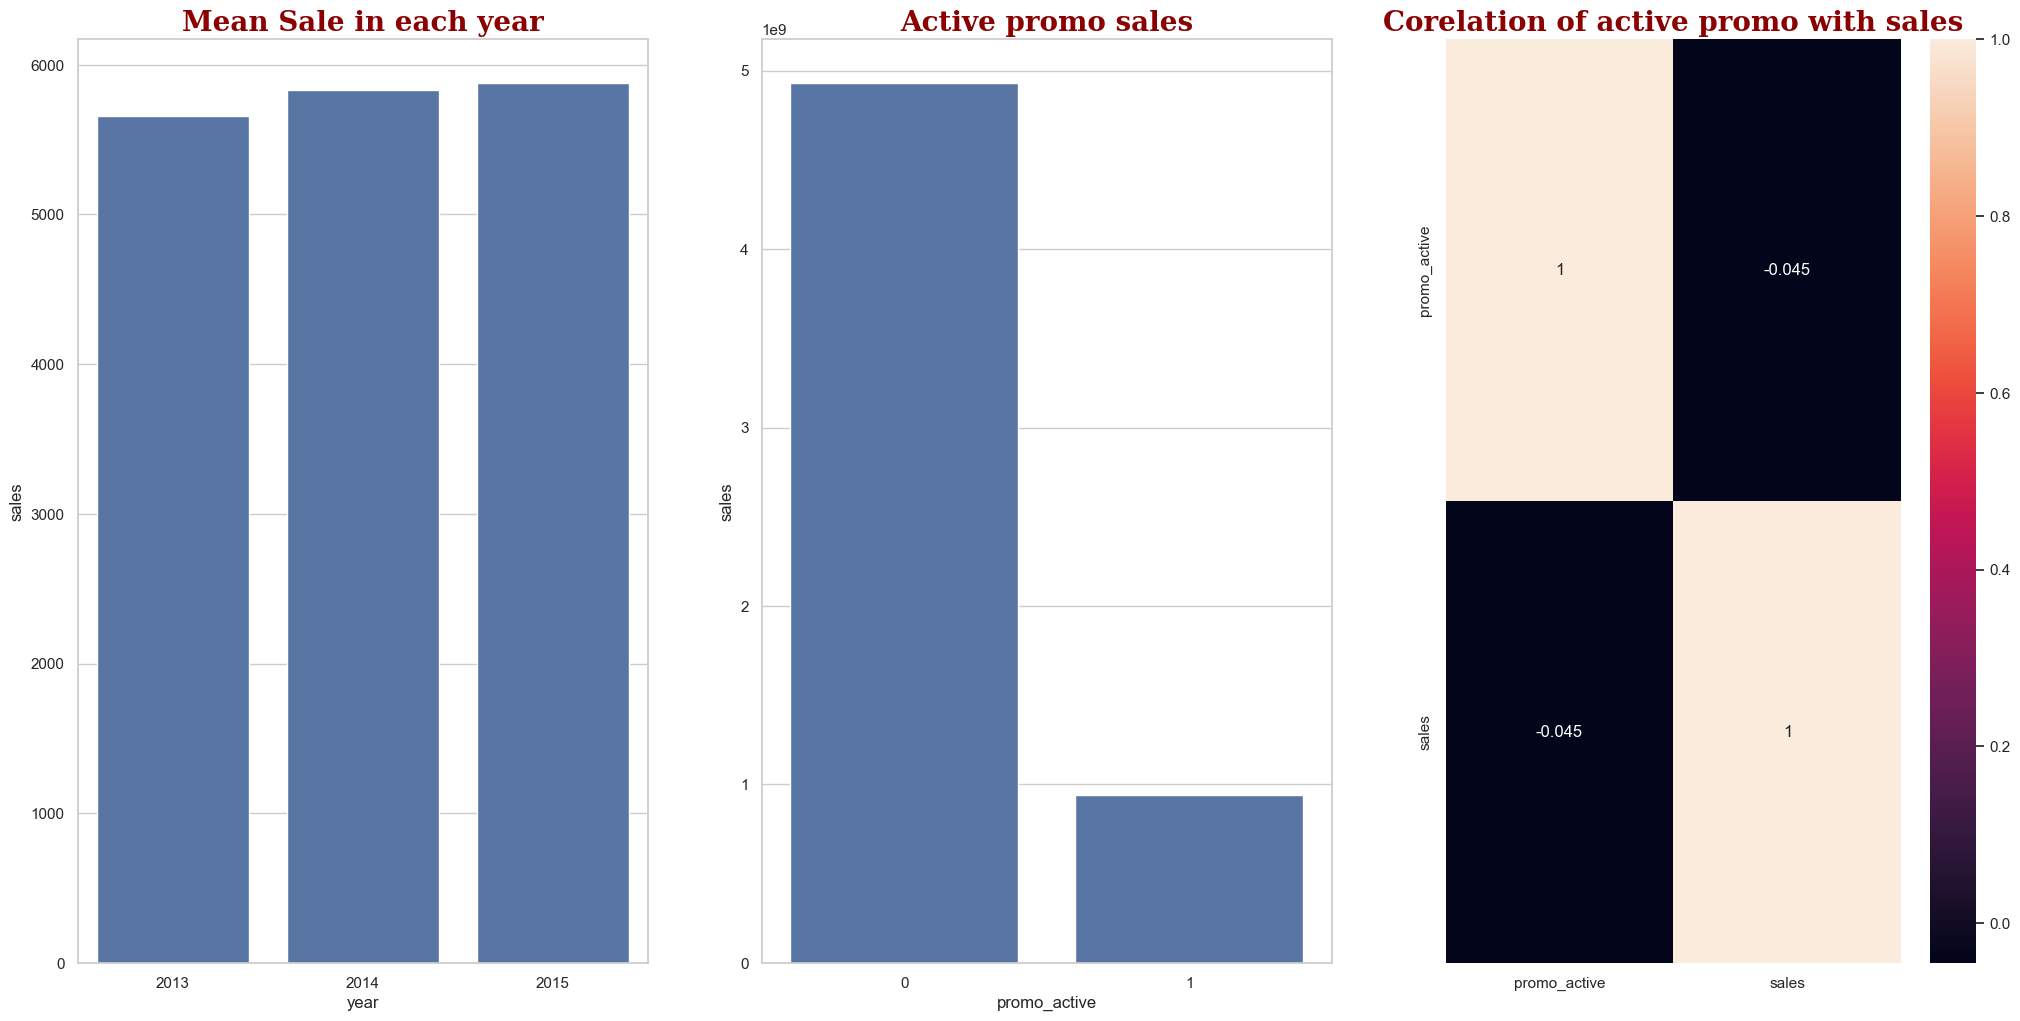

In [63]:
plt.subplot(131)
sns.barplot(df.groupby('year').sales.mean().reset_index(name = 'sales'), y = 'sales', x = 'year')
plt.title('Mean Sale in each year', fontdict = title)

plt.subplot(132)
sns.barplot(df.groupby('promo_active').sales.sum().reset_index(name = 'sales'), y = 'sales', x = 'promo_active')
plt.title('Active promo sales', fontdict = title)

plt.subplot(133)
sns.heatmap(df[['promo_active', 'sales']].corr(), annot = True)
plt.title('Corelation of active promo with sales', fontdict = title)

#### <li><b>2015 have higher mean sale.</b></li>
#### <li><b>Active promotion isnt resulting in better results. 0 corelation with sales</b></li>

Text(0.5, 1.0, 'Corelation')

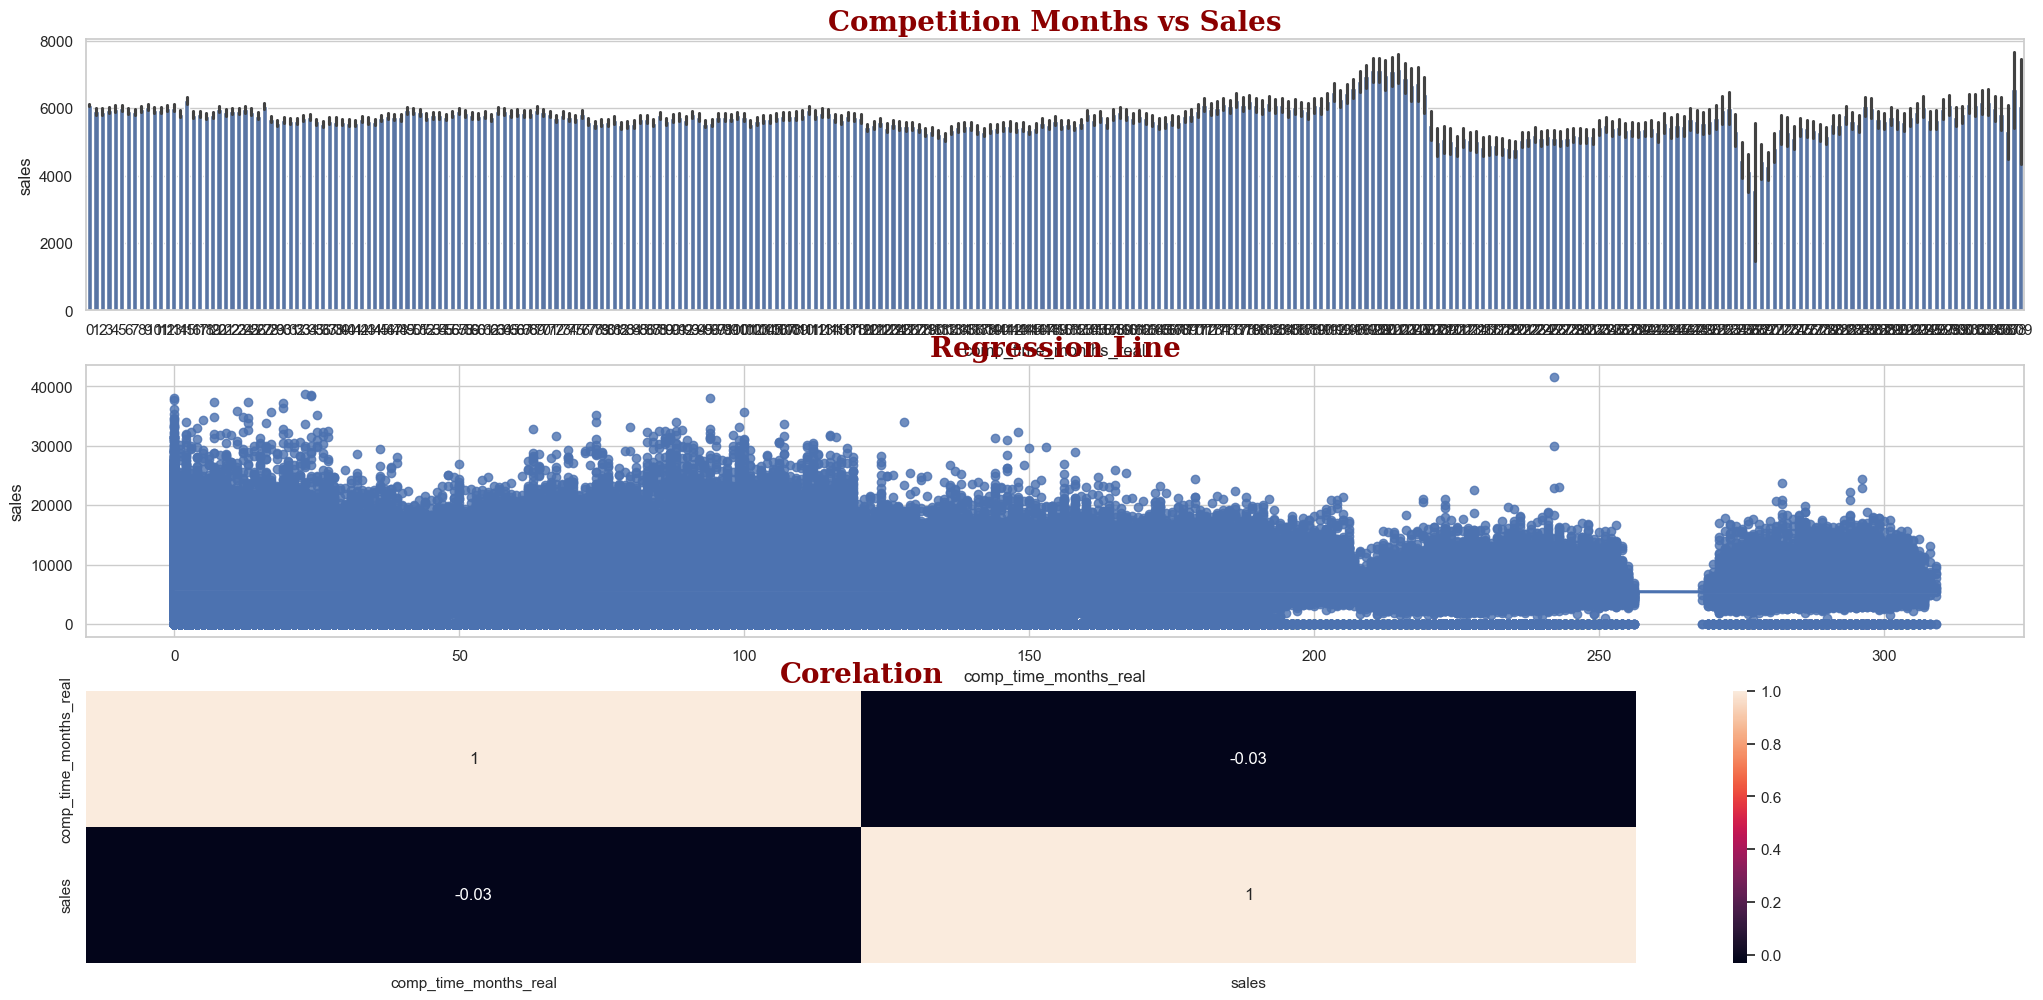

In [82]:
plt.subplot(311)
df_months = df[df.comp_time_months_real < 400]
sns.barplot(x = df_months.comp_time_months_real, y = df_months.sales)
plt.title('Competition Months vs Sales', fontdict = title)

plt.subplot(312)
sns.regplot(x = df_months.comp_time_months_real, y = df_months.sales)
plt.title('Regression Line', fontdict = title)

plt.subplot(313)
sns.heatmap(df_months[['comp_time_months_real', 'sales']].corr(), annot = True)
plt.title('Corelation', fontdict = title)

#### <li><b>1.) We are seeing average of 6000 sales in each month without much of deflection.</b></li>
#### <li><b>2.) Straight regression line shows there is no linear relation between competition months and sales.</b></li>
#### <li><b>3.) Heatmap shows 0 corealation between this 2 features.</b></li>

Text(0.5, 1.0, 'Corelation')

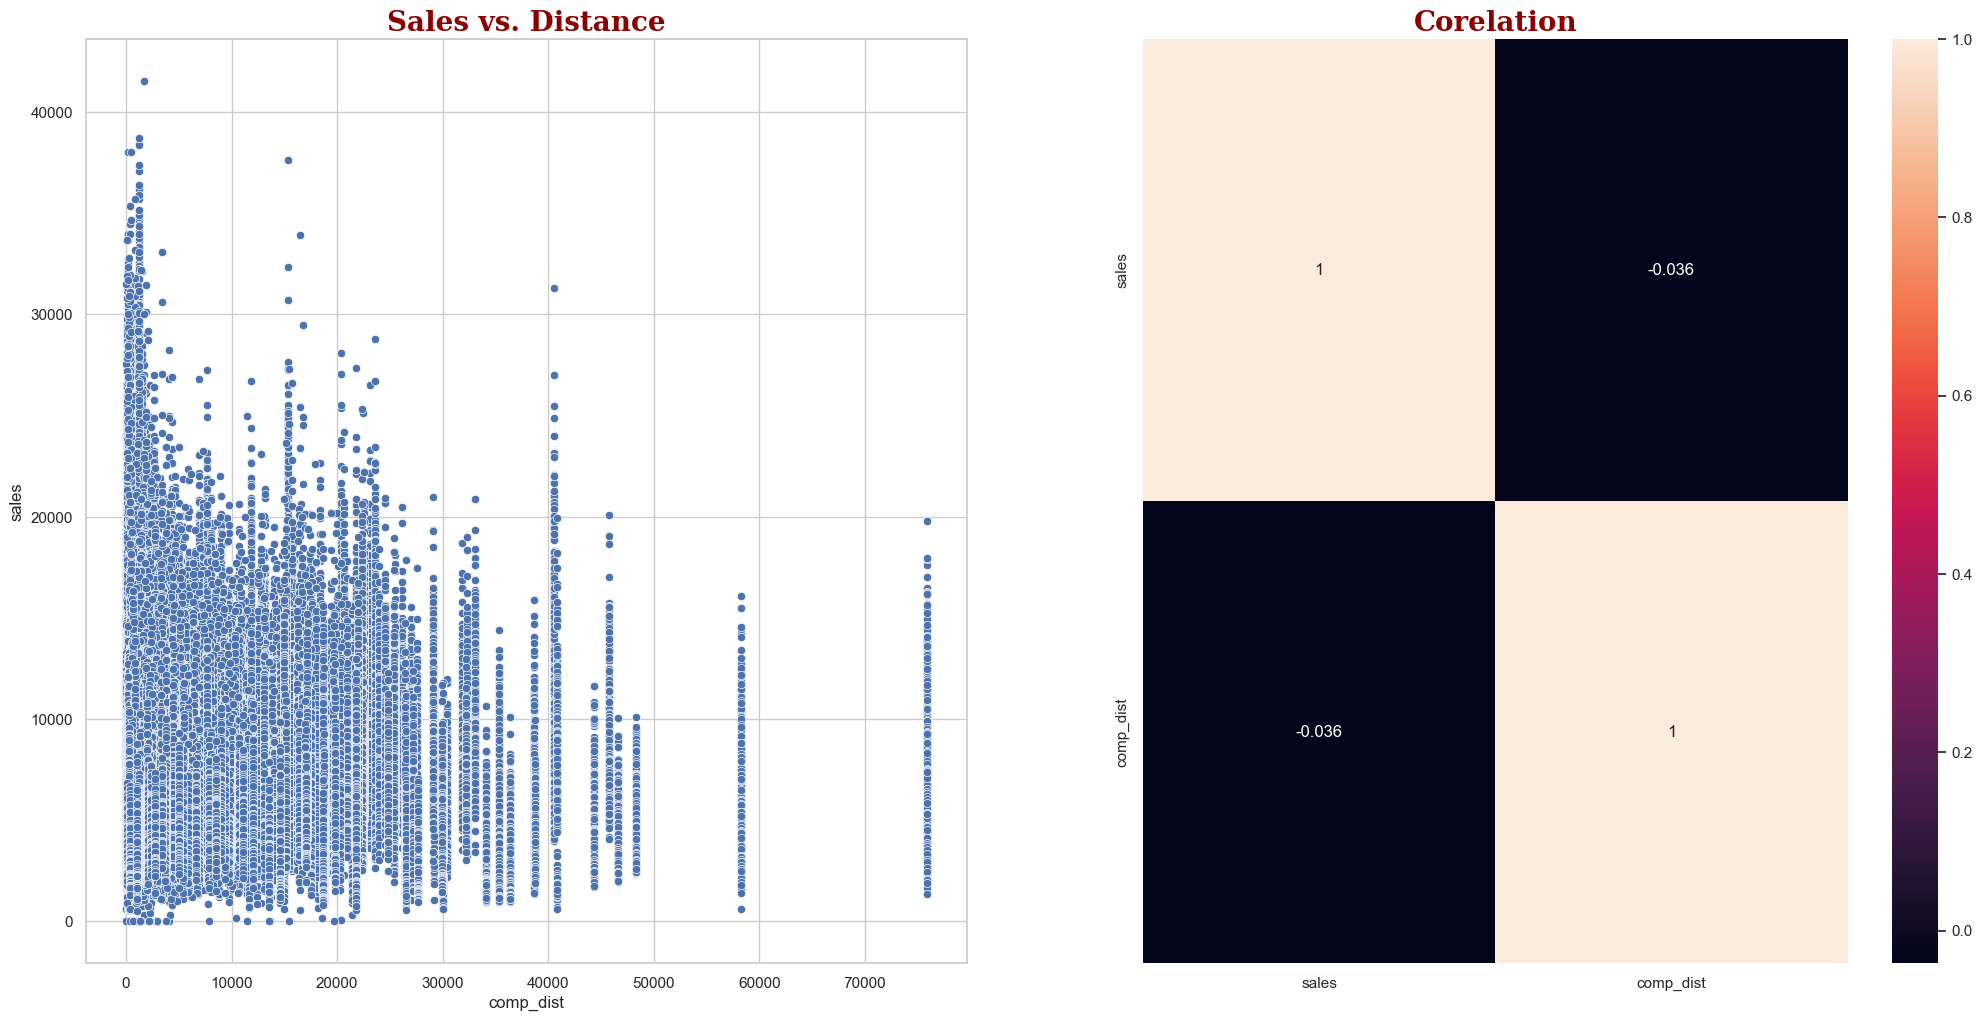

In [65]:
plt.subplot(121)
df5 = df[df.open == 1]
sns.scatterplot(y = df5.sales, x = df5.comp_dist)
plt.title('Sales vs. Distance', fontdict = title)

plt.subplot(122)
sns.heatmap(df5[['sales', 'comp_dist']].corr(), annot = True)
plt.title('Corelation', fontdict = title)

#### <li><b>1.) Closer the competitor the highest amount of sale will be high but heatmap shows no corelation between them.</b></li>
> <b>H8 : Higher the competition distance higher the sales.</b> ==> <b>False</b>

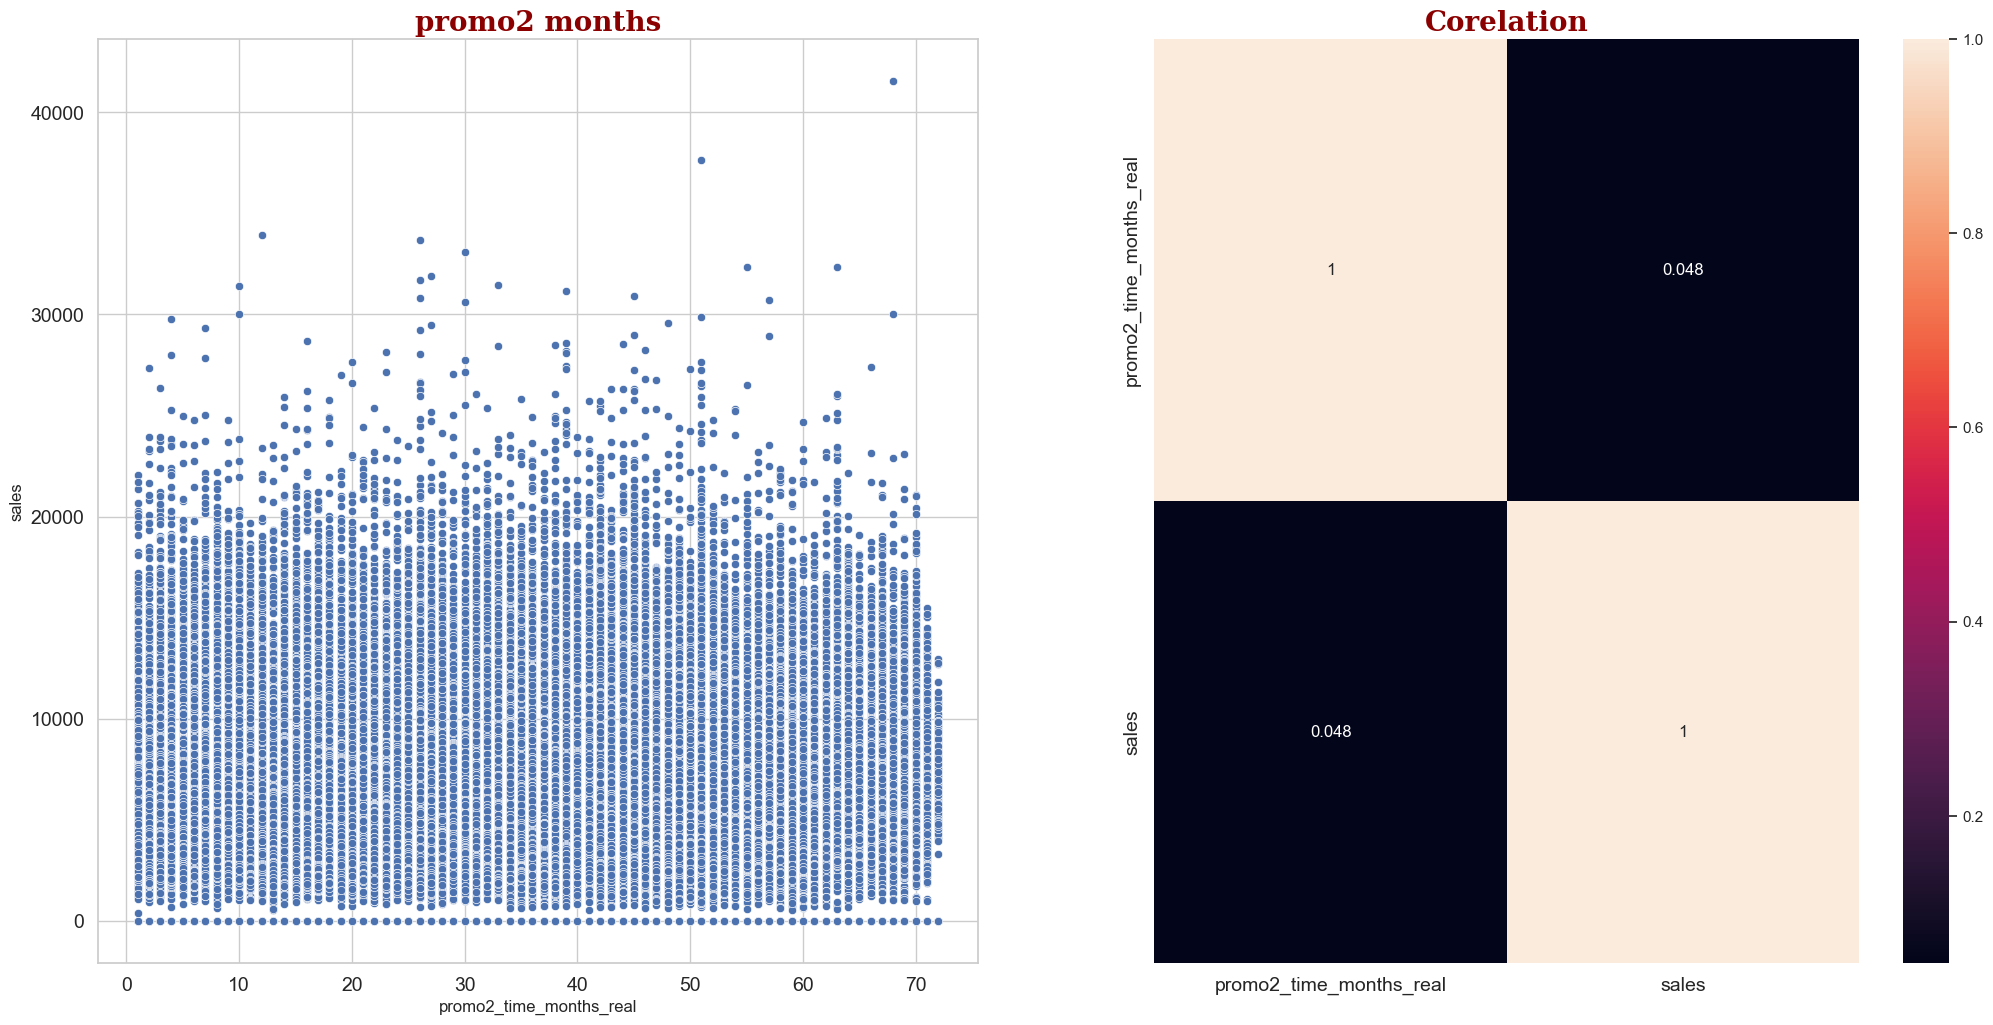

In [66]:
df7 = df[df.promo2_time_months_real != 0]
plt.subplot(121)
sns.scatterplot(df7, x = 'promo2_time_months_real', y = 'sales')
plt.title('promo2 months', fontdict = title)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(122)
sns.heatmap(df7[['promo2_time_months_real', 'sales']].corr(), annot = True)
plt.title('Corelation', fontdict = title)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#### <li><b>Promo2 time have no relation with sales</b></li>

### <b>Multi-variate analysis</b>


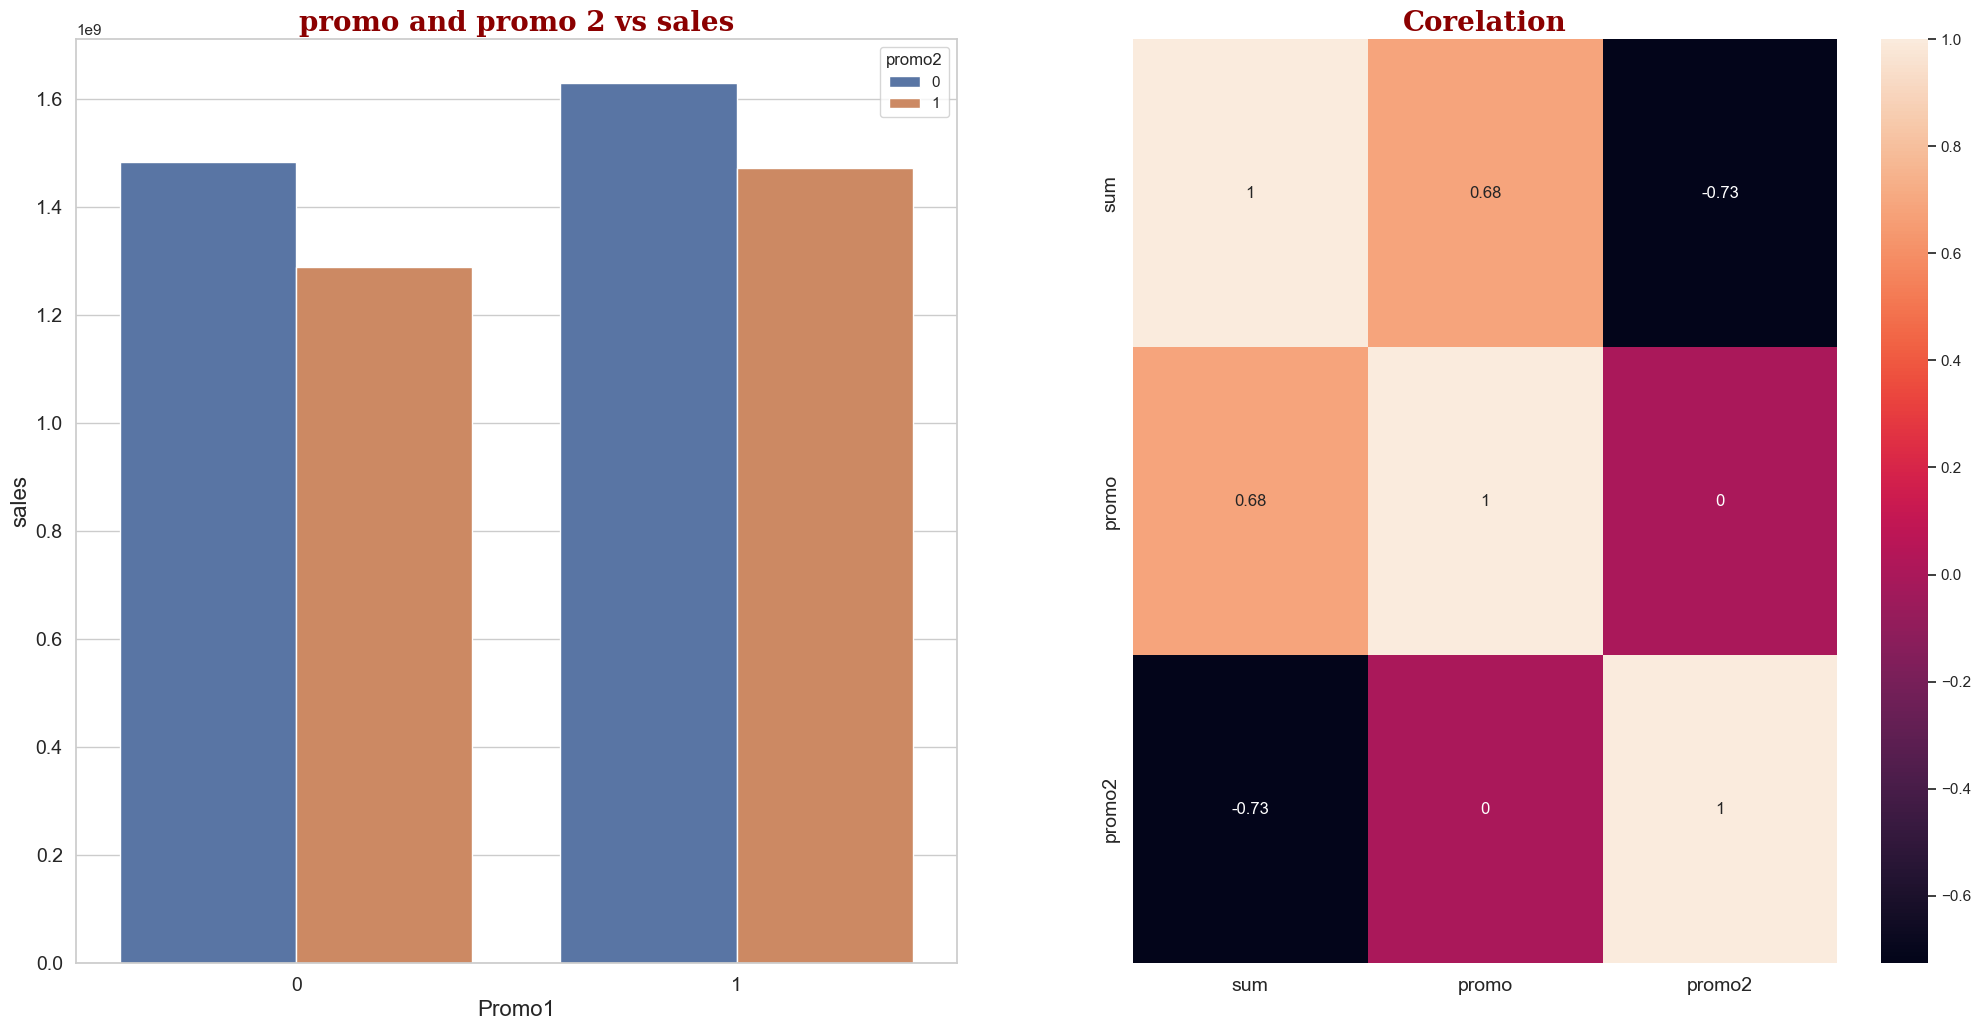

In [67]:
df6 = df5.groupby(['promo', 'promo2']).sales.sum().reset_index(name = 'sum')
df6.columns = ['promo', 'promo2', 'sum']
plt.subplot(121)
sns.barplot(df6, x = 'promo', y = 'sum', hue = 'promo2')
plt.title('promo and promo 2 vs sales', fontdict = title)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Promo1', fontsize = 16)
plt.ylabel('sales', fontsize = 16)

plt.subplot(122)
sns.heatmap(df6[['sum','promo', 'promo2']].corr(), annot = True)
plt.title('Corelation', fontdict = title)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#### <li><b>1.) promo1 0 and promo2 1 have least sales.</b></li>
#### <li><b>2.) promo1 1 and promo2 0 have highest sales.</b></li>
#### <li><b>3.) From heat map promo1 is positively and with fine magnitude (0.68) are corelated; where as promo2 is negatively corelated(-0.73) with sales</b></li>
> <b>H1 : Promoted stores should perform better.</b>
 <b>Result : False.</b> 
#### Infact second promotion stores have -ve relation with sales. But it has +ve relation with promo1. Thus this hypothesis is <b>partially false.</b>



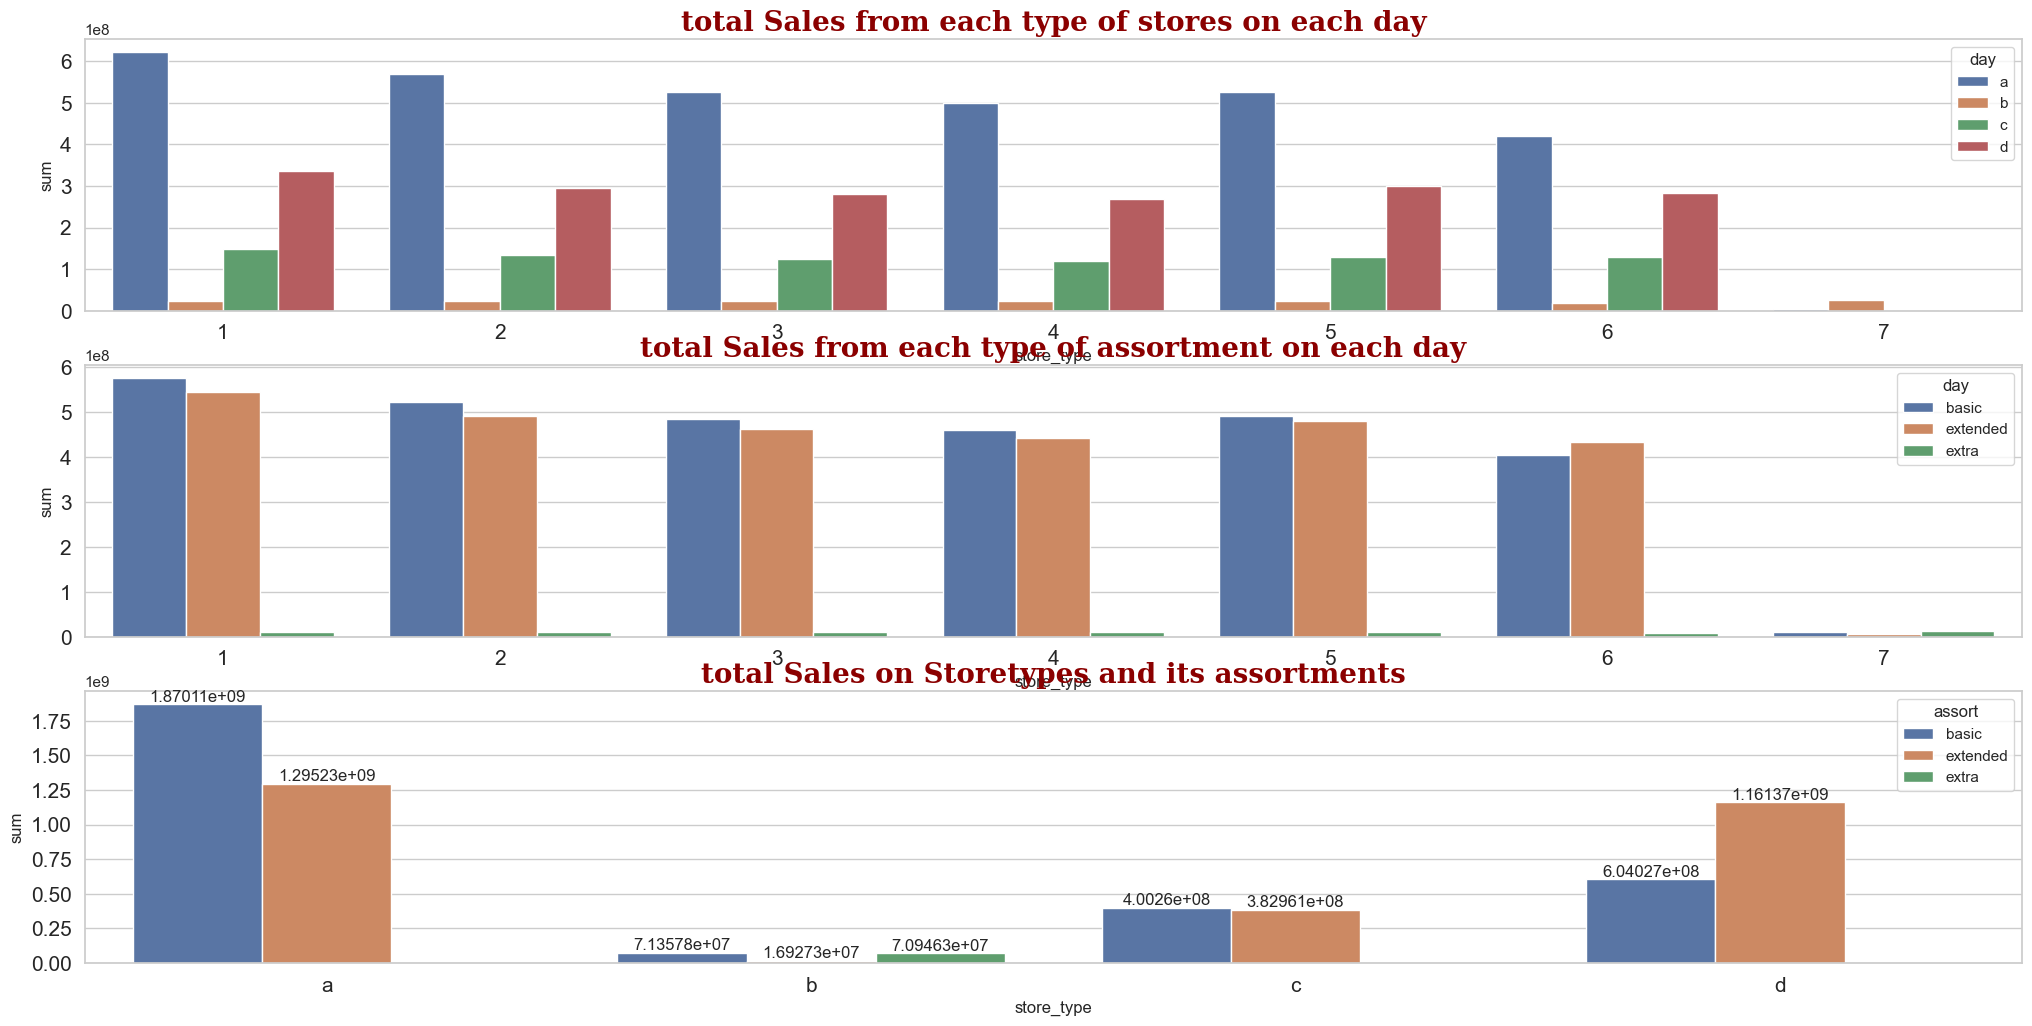

In [68]:
aux = df[['dayofweek', 'store_type', 'assortment', 'sales']]

plt.subplot(311)
aux1 = aux.groupby(['dayofweek', 'store_type']).sales.sum().reset_index(name = 'sum')
aux1.columns = ['store_type', 'day', 'sum']
sns.barplot(aux1, x = 'store_type', y = 'sum', hue = 'day')
plt.title('total Sales from each type of stores on each day', fontdict = title)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.subplot(312)
aux1 = aux.groupby(['dayofweek', 'assortment']).sales.sum().reset_index(name = 'sum')
aux1.columns = ['store_type', 'day', 'sum']
sns.barplot(aux1, x = 'store_type', y = 'sum', hue = 'day')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('total Sales from each type of assortment on each day', fontdict = title)

plt.subplot(313)
aux1 = aux.groupby(['store_type', 'assortment']).sales.sum().reset_index(name = 'sum')
aux1.columns = ['store_type', 'assort', 'sum']
bar = sns.barplot(aux1, x = 'store_type', y = 'sum', hue = 'assort')
for label in bar.containers:
        bar.bar_label(label)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('total Sales on Storetypes and its assortments', fontdict = title)

plt.show()

#### <li><b>1.) Only B type of store have sales on sundays.</b></li>
#### <li><b>2.) Only B type of store have 'extra' assortemnt[Thus B is only store type in which all assortments are available]. Other store types A, C and D have 'Basic' and 'Extended' assortment.</b></li>

### Lets check whether stores are opened on sundays.

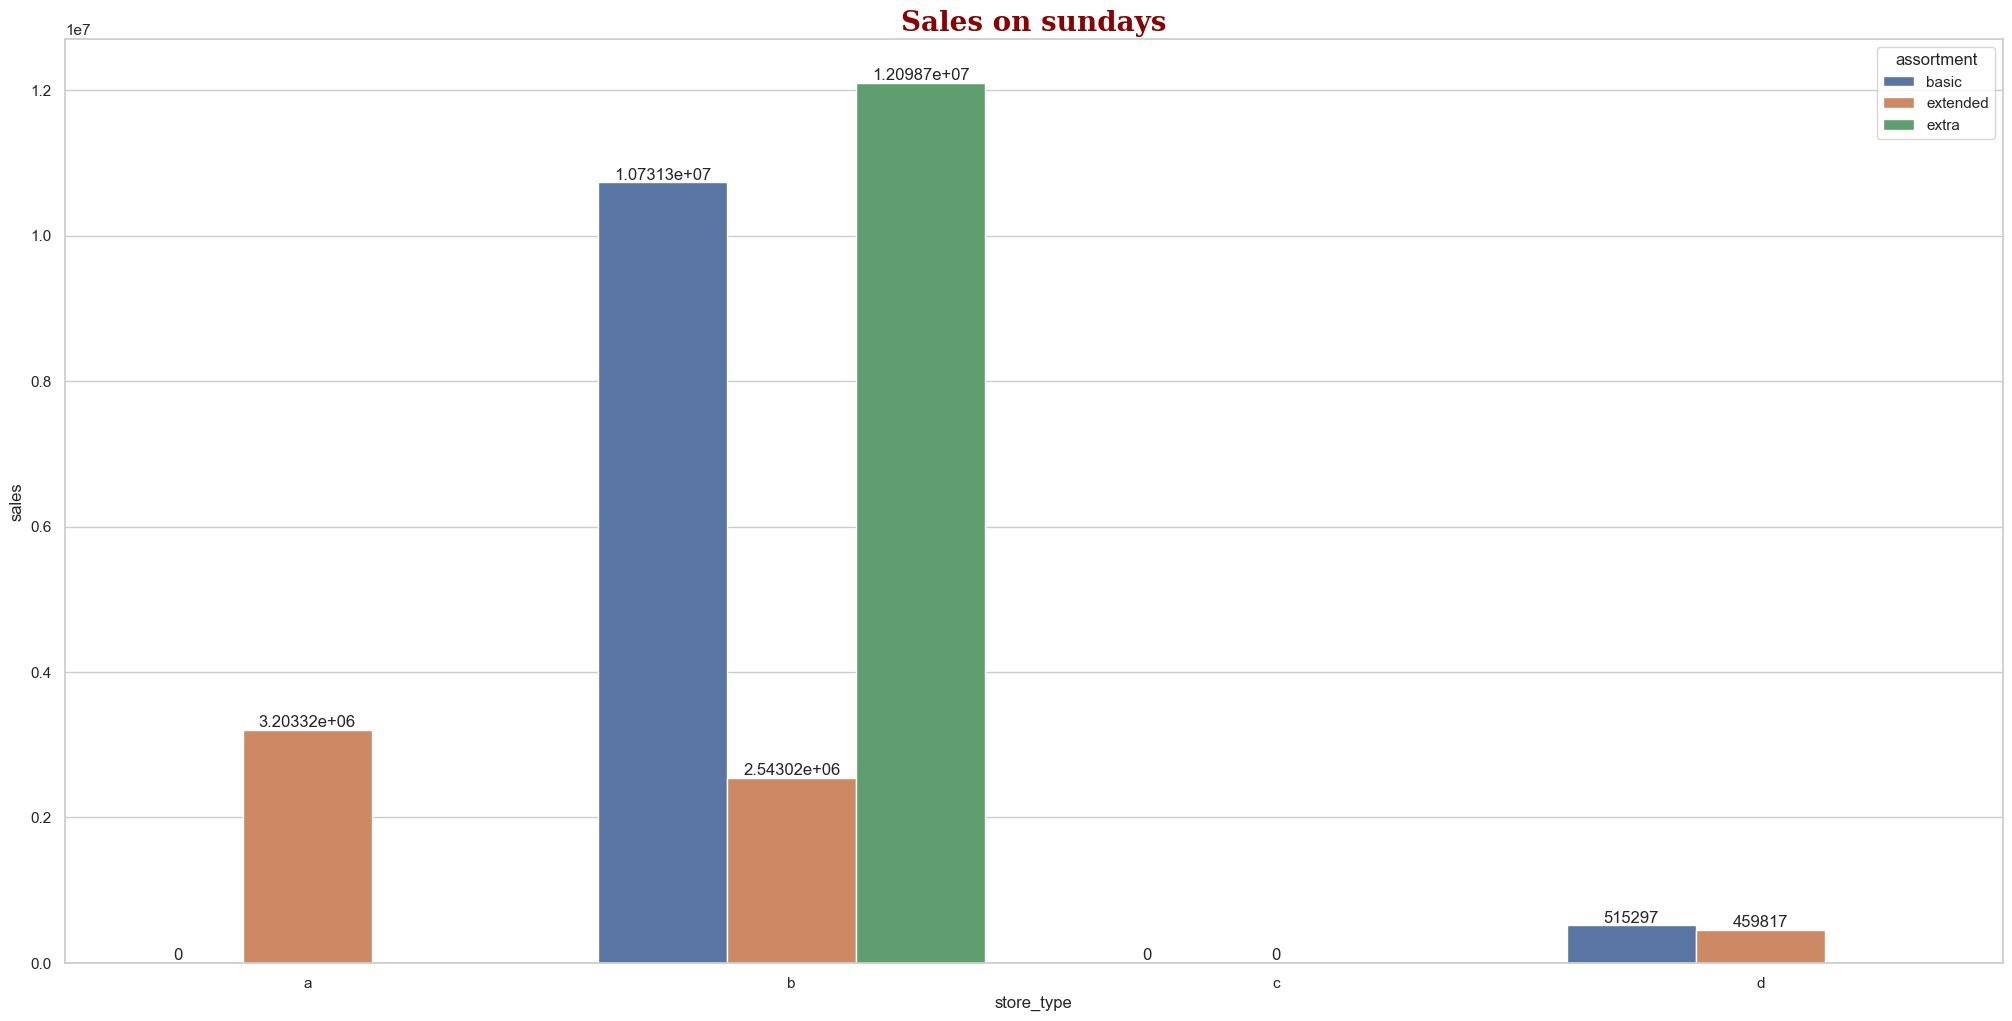

In [69]:
aux = df[['dayofweek', 'store_type', 'assortment', 'sales']]
aux3 = aux[aux.dayofweek == 7].groupby(['store_type', 'assortment']).sales.sum().reset_index()
aux3.columns = ['store_type', 'assortment', 'sales']
bar = sns.barplot(x = aux3.store_type, y = aux3.sales, hue = aux3.assortment)
for x in bar.containers:
    bar.bar_label(x)
plt.title('Sales on sundays', fontdict = title)
plt.show()

#### <li><b>1.) C store type is closed on sundays.</b></li>
#### <li><b>2.) In 'A' store type only extended assortment is being sold.</b></li>
#### <li><b>3.) In 'D' store sales are very low for both assortments.</b></li>
#### <li><b>4.) B stores have comparatively better sales on sunday but very low compared other stores' weekdays.</b></li>

C:\Users\Varshil\AppData\Local\Temp\ipykernel_28980\2911760132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


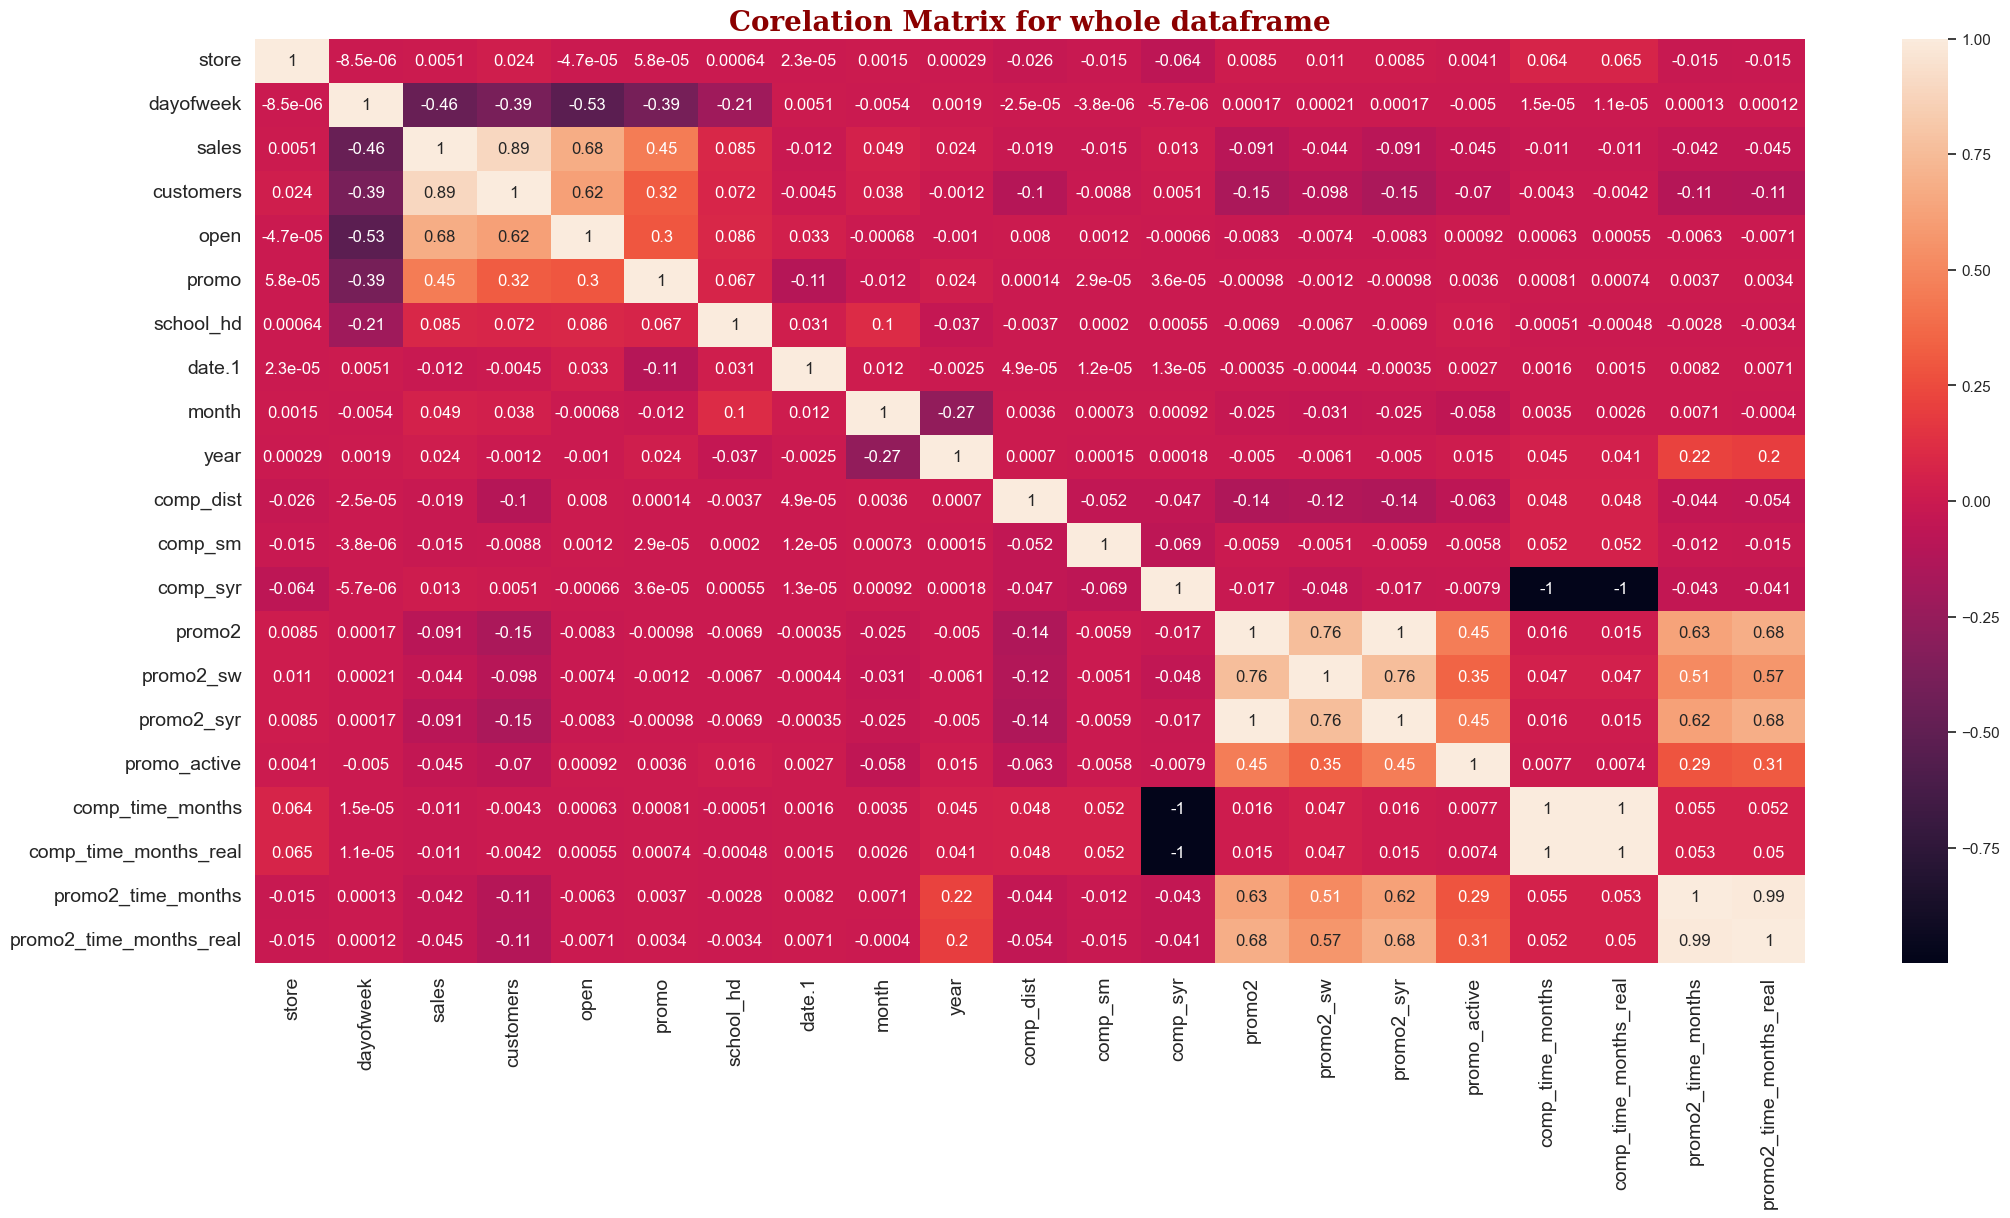

In [70]:
sns.heatmap(df.corr(), annot = True)
plt.title('Corelation Matrix for whole dataframe', fontdict = title)
plt.xticks(fontsize = '14')
plt.yticks(fontsize = '14')
plt.show()

#### <li><b>Features with high +ve corelation with sales are customers(0.89), open(0.68), promo(0.45)</b></li>
#### <li><b>Features with high -ve corelation with dayofweek are sales(-0.46), customers(-0.39), open(-0.53), promo(-0.39), school_hd(-0.21)</b></li>

### <b>Encoding</b>

In [34]:
# normal days have more sales I will put more weight on normal days
# And according to pie chart that shows average sales on holidays, public holidays have least average sales where as easter have more than christmas and public holiday
df['state_hd'] = df.state_hd.apply(lambda x : 4 if x == 'Normal' else 3 if x == 'easter' else 2 if x == 'christmas' else 1)

# considering the per day sales in store types B have most of that.  A and C have same avg sales. D also is very close to A and C 
df['store_type'].replace({'a' : 1, 'b' : 3, 'c' : 1, 'd' : 1}, inplace = True)

# folowwing the average sale logic again
df['assortment'].replace({'basic' : 1, 'extra' : 3, 'extended' : 2}, inplace = True)

In [35]:
# save data frame
df_backup7 = df.copy(deep = True)

# take only cases when shops are open
df = df[df.open == 1]

### <b>Outlier detection</b>

Text(0.5, 1.0, 'Promotion Months')

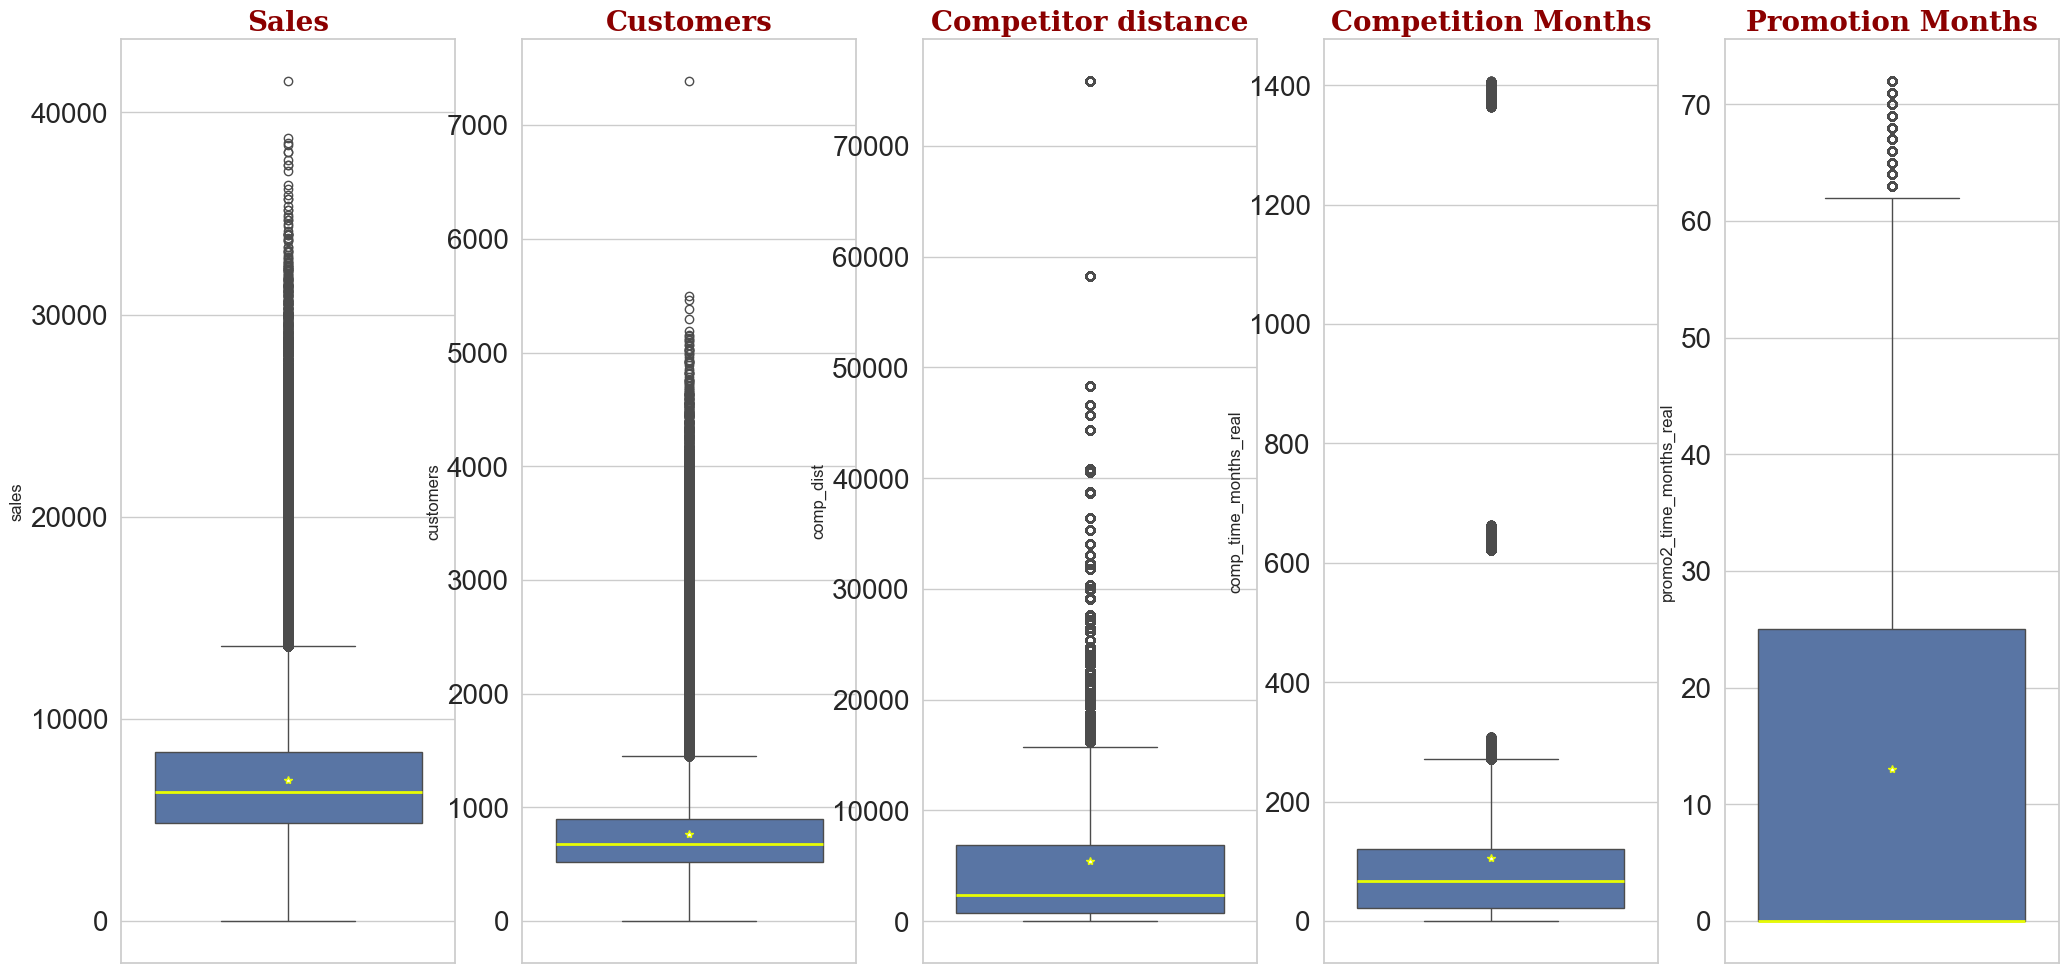

In [88]:
# Only customer number, comp_dist and sales should have outliers because other features are categorical or in limited range.

plt.subplot(151)
sns.boxplot(df.sales, showmeans=True, meanprops={"marker":"*", "markerfacecolor":"white", "markeredgecolor":"#e8fc03"},
               medianprops={"color":"#e8fc03", "linewidth":2})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Sales', fontdict = title)
            
plt.subplot(152)
sns.boxplot(df.customers, showmeans=True, meanprops={"marker":"*", "markerfacecolor":"white", "markeredgecolor":"#e8fc03"},
               medianprops={"color":"#e8fc03", "linewidth":2})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Customers', fontdict = title)

plt.subplot(153)
sns.boxplot(df.comp_dist, showmeans=True, meanprops={"marker":"*", "markerfacecolor":"white", "markeredgecolor":"#e8fc03"},
               medianprops={"color":"#e8fc03", "linewidth":2})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Competitor distance', fontdict = title)

plt.subplot(154)
sns.boxplot(df.comp_time_months_real, showmeans=True, meanprops={"marker":"*", "markerfacecolor":"white", "markeredgecolor":"#e8fc03"},
               medianprops={"color":"#e8fc03", "linewidth":2})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Competition Months', fontdict = title)

plt.subplot(155)
sns.boxplot(df.promo2_time_months_real, showmeans=True, meanprops={"marker":"*", "markerfacecolor":"white", "markeredgecolor":"#e8fc03"},
               medianprops={"color":"#e8fc03", "linewidth":2})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Promotion Months', fontdict = title)

#### <b>We have a lot of outliers in these features. If we keep them as it is or apply standard scaler they will affect the predictions and increase variance but also we should not remove them because removing them might create bias in prediction.</b>
#### <b>We have seen distribution of these 4 features when EDA started, the sales and customers follow log normal distibution and Competition distance doesnt follow any known distribution so its complex.</b>
#### <b>Thus log transformation for sales and customers; robust scaling for competition distance, competition months.</b>
#### <b>We can ignore the outliers in promotion years.</b>

### <b>Transformation</b>

In [36]:
df['sales'] = np.log1p(df['sales'])
df['customers'] = np.log1p(df['customers'])

In [37]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['comp_dist'] = scaler.fit_transform(df[['comp_dist']])
df['comp_time_months_real'] = scaler.fit_transform(df[['comp_time_months_real']])

In [38]:
df_pre_ml_backup = df.copy()
df_pre_ml_backup.to_csv(r'E:\skill based learning\DATA SCIENCE\Learn_Projects\Rosemann Store Retail Sales Pred\pre_ml.csv', index = False)

### **To forecast I will decompose sales into trend, seasonal and resdiual components.**

1.  **After decomposing I will use SARIMA (seasonal ARIMA) to get all forecasts separately and add components to get final result. In this only date will be taken as index.**
2.   **I will also use regression with and without ensemble methods, to get most accurate forecasting.In this date along with store id will be taken as index**



## **1.) SARIMA**

In [82]:
# the conversion to log wouldnot be useful here. Because at the time of inverse conversion the np.expm1 will give infinity
df_x = df.copy(deep = True)
df_x['sales'] = np.expm1(df.sales)
df_x = df.groupby('date').sales.sum().reset_index(name = 'sales')

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_x['sales'], model='additive', period = 12)
df_x['sale_trend'] = result.trend
df_x['sale_seasonal'] = result.seasonal
df_x['sale_residual'] = result.resid

In [98]:
df_x.sale_trend.isnull().sum()

12

In [99]:
# SARIMA requires frequency which identifies the time flow. We have multiple same date instances. So I will aggregate the sales for each date
# deomposition creates nan values in trend and resiudals ; get rid of those values

df_sarima = df_x.iloc[6 : df_x.shape[0]-6, :].copy()
df_sarima.set_index('date', inplace = True)
df_sarima.sort_values(by = 'date', inplace = True)

In [100]:
df_sarima

sales   sale_trend  sale_seasonal  sale_residual
date                                                               
2013-01-07  10089.869916  8077.146567     -56.901590    2069.624938
2013-01-08   9849.960326  8068.515936      14.280919    1767.163471
2013-01-09   9715.101430  8051.571112     -86.568386    1750.098704
2013-01-10   9717.502615  8032.126981     -38.887399    1724.263033
2013-01-11   9759.219717  8017.156594    -255.137281    1997.200404
...                  ...          ...            ...            ...
2015-07-21   9561.831787  8106.977639      14.280919    1440.573229
2015-07-22   9516.968286  8120.790327     -86.568386    1482.746346
2015-07-23   9619.259113  8128.519115     -38.887399    1529.627397
2015-07-24   9607.101017  8148.573578    -255.137281    1713.664721
2015-07-25   9442.791745  8573.543772     -58.936469     928.184442

[930 rows x 4 columns]

In [44]:
print(max(df_sarima.index))
max(df_sarima.index) - datetime.timedelta(days = 6*7)

2015-07-31 00:00:00


Timestamp('2015-06-19 00:00:00')

In [101]:
# define out boundary date
edge_date = pd.to_datetime(max(df_sarima.index) - datetime.timedelta(days = 6*7))

# split X train and test parts
#X_train = df_sarima[df_sarima.index < edge_date]
#X_train = X_train.loc[:, df_sarima.columns[:-3]]

#X_test = df_sarima[df_sarima.index >= edge_date]
#X_test = X_test.loc[:, df_sarima.columns[:-3]]

# split y test and y train for all components
y_train_trend = df_sarima[df_sarima.index < edge_date]
y_train_trend = y_train_trend['sale_trend'].copy()

y_test_trend = df_sarima[df_sarima.index >= edge_date]
y_test_trend = y_test_trend['sale_trend'].copy()

y_train_seasonal = df_sarima[df_sarima.index < edge_date]
y_train_seasonal = y_train_seasonal['sale_seasonal'].copy()

y_test_seasonal = df_sarima[df_sarima.index >= edge_date]
y_test_seasonal = y_test_seasonal['sale_seasonal'].copy()

y_train_resid = df_sarima[df_sarima.index < edge_date]
y_train_resid = y_train_resid['sale_residual'].copy()

y_test_resid = df_sarima[df_sarima.index >= edge_date]
y_test_resid = y_test_resid['sale_residual'].copy()

In [102]:
print("Training size : ", y_train_resid.shape[0])
print("Test size : ", y_test_resid.shape[0])

Training size :  887
Test size :  43


In [103]:
def SARIMA(sales_col, test_col, p = 1, d = 1, q = 1, P = 1, D = 1, Q = 1, s = 7):
  from statsmodels.tsa.statespace import sarimax

  # Specify SARIMA parameters
  """
  p = 1    # order of the autoregressive (AR) component, indicating how many past values of the time series are used to predict the future.
  d = 3    # degree of differencing, indicating how many times the time series is differenced to make it stationary.
  q = 1    # order of the moving average (MA) component, indicating how many past white noise error terms are used to predict the future.
  P = 1    # The order of the seasonal autoregressive (SAR) component, similar to p but for the seasonal part.
  D = 1    # The degree of seasonal differencing, similar to d but for the seasonal part.
  Q = 1    # The order of the seasonal moving average (SMA) component, similar to q but for the seasonal part.
  s = 7    # The seasonal period, representing the number of time steps in a season. For monthly data, s would typically be 12 for yearly seasonality.
  """
  # Fit SARIMA model
  model = sarimax.SARIMAX(sales_col, order=(p, d, q), seasonal_order=(P, D, Q, s))
  results = model.fit()

  # Forecast the next 6 weeks
  forecast_steps = 6*7
  forecast = results.get_forecast(steps=forecast_steps)

  # Extract forecasted values and confidence intervals
  forecast_values = forecast.predicted_mean
  confidence_intervals = forecast.conf_int()

  # Plotting
  sns.set(style = 'darkgrid')
  plt.figure(figsize=(10, 6))
  plt.plot(forecast_values, label='Forecasted trend', color='red')
  plt.plot(test_col, label = 'Test trend', color = 'blue')
  #plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2)
  plt.title('Sales Forecast for the Next 6 Weeks')
  plt.legend()
  plt.show()
  return forecast_values

### **SARIMA FORECASTING**

c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


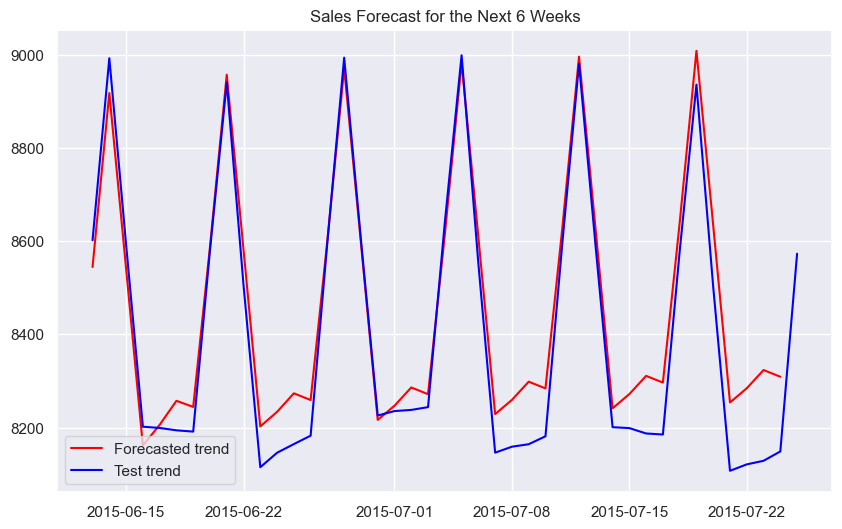

In [104]:
trendx = SARIMA(y_train_trend, y_test_trend, p = 1, d = 2, q = 1, P = 1, D = 1, Q = 1, s = 7)

c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


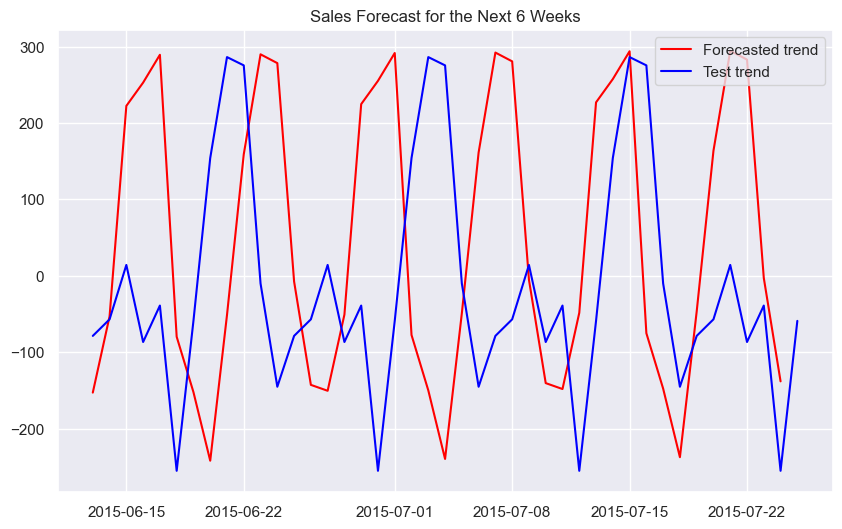

In [105]:
seasonalx = SARIMA(y_train_seasonal, y_test_seasonal,  p = 1, d = 1, q = 2, P = 1, D = 1, Q = 1, s = 7)

c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


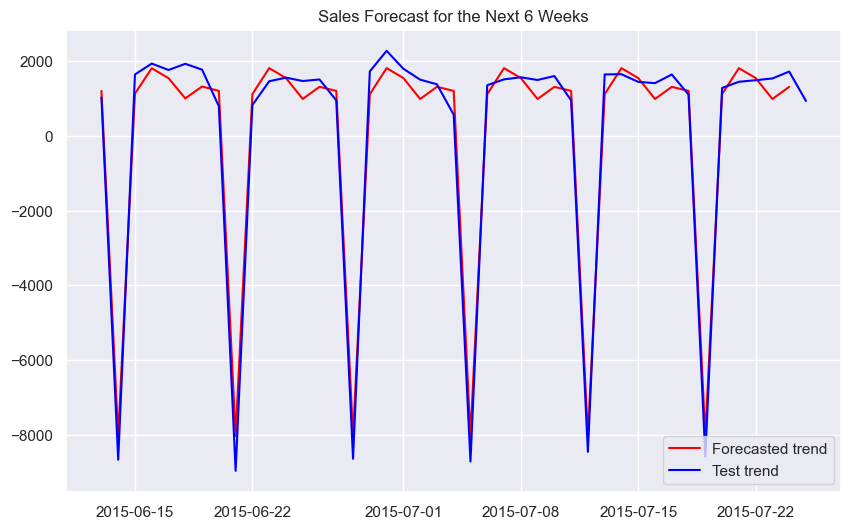

In [106]:
residx = SARIMA(y_train_resid, y_test_resid,  p = 1, d = 1, q = 1, P = 1, D = 1, Q = 1, s = 7)

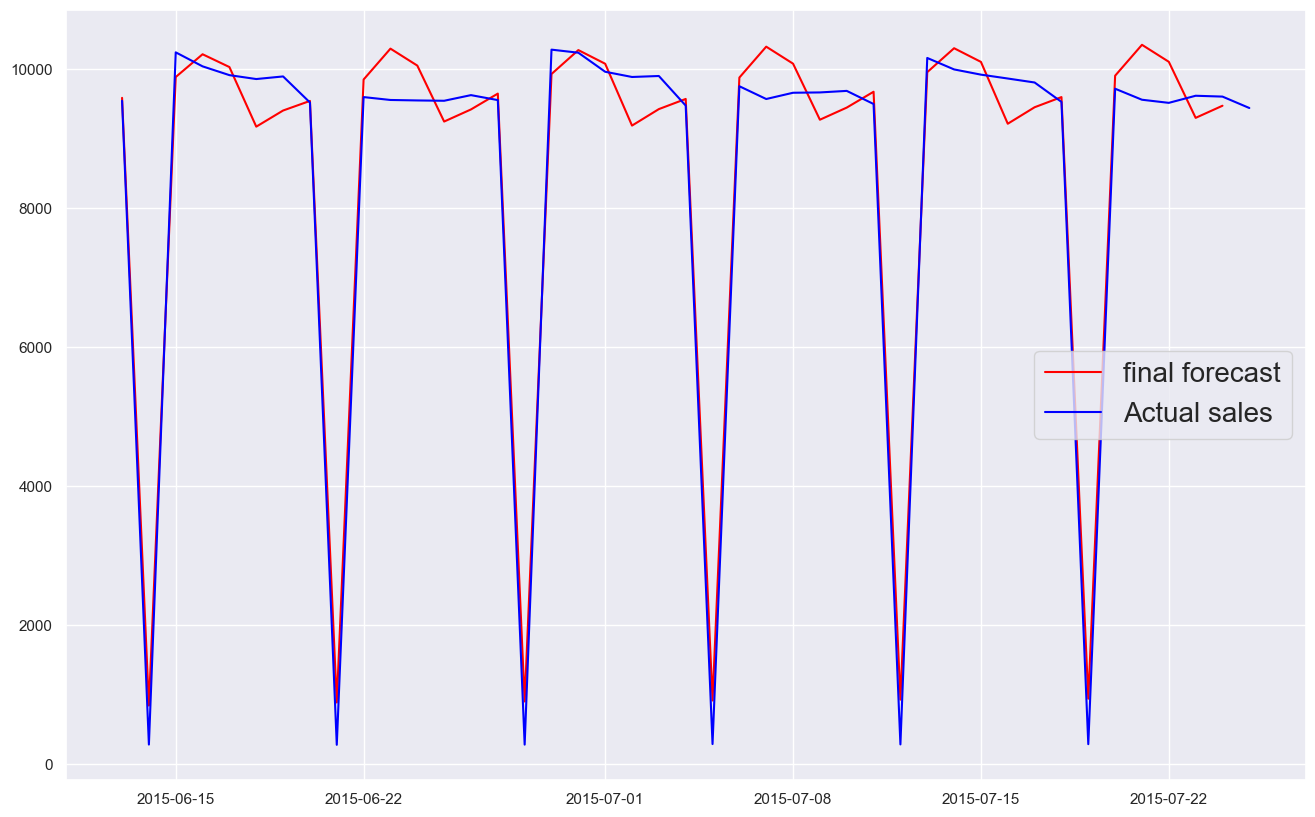

In [115]:
summ = trendx + seasonalx + residx
test_summ = df_sarima[df_sarima.index >= edge_date]['sales']
plt.figure(figsize = (16, 10))
plt.plot(summ, label = 'final forecast', color = 'red')
plt.plot(test_summ, label = 'Actual sales', color = 'blue')
plt.legend(['final forecast', 'Actual sales', 'Undecomposed Original sales'], fontsize=20)
plt.show()

In [109]:
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat) / y)*100)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
  
    return pd.DataFrame({"MAE": mae,
                         "MAPE": mape,
                         "RMSE": rmse}, index=[model_name])

In [116]:
# np.np.expm1 is inverse log with base 10
sarima_err = ml_error('SARIMA', summ, test_summ[:-1])
sarima_err

MAE       MAPE       RMSE
SARIMA  365.871221  12.661554  434.03083

## 2.)**FORECAST USING ML TECHNIQUES**

#### Select features, divide data into train and test

In [118]:
selected_features = ['store', 'date', 'date.1', 'month', 'year', 'dayofweek', 'sales', 'customers', 'promo', 'state_hd', 'school_hd',
       'store_type', 'assortment', 'comp_dist', 'comp_syr', 'promo2',
       'promo_active', 'comp_time_months_real', 'promo2_time_months_real']
df_ml = df[selected_features]
df_ml.sort_values(by = 'date', inplace = True)
df_ml.to_csv(r'E:\skill based learning\DATA SCIENCE\Learn_Projects\Rosemann Store Retail Sales Pred\ml_ready2.csv', index = False)

C:\Users\Varshil\AppData\Local\Temp\ipykernel_17024\2085064405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.sort_values(by = 'date', inplace = True)


### ML is done on second notebook. I will use the above save csv file to use ML algorhythm.
### Here is the link for the colab notebook 

""